# Bayesian Neural Networks to Predict Hard Landing with DASHlink Data
Authors: Dr. Yingxiao Kong, Vanderbilt University

Email: yingxiao.kong@vanderbit.edu

## Overview of Research
In this work, we use an open-source dataset - [NASA's DASHlink data](https://c3.ndc.nasa.gov/dashlink/) - to isolate data for landing aircraft that both have hard landing and normal landing occurrences. The objective is to use [this sample data](https://c3.ndc.nasa.gov/dashlink/projects/85/resources/?type=ds) to train a Bayesian Neural Network model to predict touchdown vertical speed for a landing aircraft with the intent to use as a screening for identifying hard landing events before they occur.

This series of Jupyter notebook demonstrations into 3 modules. The presented module is in **bold**:
- Module 1 - Download DASHlink Data
- Module 2 - DASHlink Data Pre-Processing and Feature Selection with Maximum Relevance and Minimum Reduandancy (MRMR)
- **Module 3 - Bayesian Neural Network Model Training**

## Module 3: Bayesian Neural Network Model Training

## Step 3a: Get Processed Data and Ordered Features from Module 2

In [1]:
import pandas as pd
df_landing = pd.read_csv('processed_data_landing_at_msp.csv')
df_features = pd.read_csv('ordered_features.csv')

In [2]:
df_landing

,LATP,LONP,MSQT_1,BAL1,TAS,GS,TH,FLAP,GLS,LOC,...,WS,WD,ALTR,TD_ALTR,TD_LAT,TD_LON,TD_ALT,heights,DIST,filepath
0,44.891682,-93.241822,1.0,1006.643045,117.933373,115.007588,125.581422,3645.000000,0.014040,-0.003136,...,10.948235,-159.834434,-536.630359,-104.780302,44.886191,-93.228955,806.643045,200,1185.595409,../../../dashlink-data/Tail_687_8/687200312300...
1,44.888764,-93.234960,1.0,906.643045,115.530863,111.638458,125.322379,3645.000000,0.183690,0.003136,...,9.932823,-165.738392,-709.834437,-104.780302,44.886191,-93.228955,806.643045,100,553.902372,../../../dashlink-data/Tail_687_8/687200312300...
2,44.887734,-93.232386,1.0,856.643045,113.021779,110.749442,123.876531,3645.000000,0.133380,0.003332,...,6.212059,-163.252476,-823.996865,-104.780302,44.886191,-93.228955,806.643045,50,320.767080,../../../dashlink-data/Tail_687_8/687200312300...
3,44.887502,-93.231929,1.0,846.643045,112.537305,110.196048,124.172654,3645.000000,0.136028,0.002001,...,6.975467,-166.607074,-688.934215,-104.780302,44.886191,-93.228955,806.643045,40,276.478561,../../../dashlink-data/Tail_687_8/687200312300...
4,44.887351,-93.231586,1.0,836.643045,111.188473,109.765476,124.137817,3645.000000,0.133199,0.002040,...,6.994513,-160.733711,-773.697501,-104.780302,44.886191,-93.228955,806.643045,30,244.578379,../../../dashlink-data/Tail_687_8/687200312300...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12559,44.887365,-93.231276,1.0,801.660295,119.045969,122.383108,121.647424,3644.920019,0.080462,0.000180,...,3.032836,-91.452123,-512.653856,-273.900805,44.886876,-93.229997,793.660295,8,114.775389,../../../dashlink-data/Tail_687_9/687200404201...
12560,44.887048,-93.230487,1.0,799.660295,118.861990,121.907043,121.667286,3644.000000,0.225420,0.004508,...,2.988509,-93.546465,-519.707422,-273.900805,44.886876,-93.229997,793.660295,6,43.200668,../../../dashlink-data/Tail_687_9/687200404201...
12561,44.887048,-93.230487,1.0,797.660295,118.695668,121.564014,121.704144,3644.000000,0.225420,0.004508,...,2.964133,-96.950775,-478.709966,-273.900805,44.886876,-93.229997,793.660295,4,43.200668,../../../dashlink-data/Tail_687_9/687200404201...
12562,44.887048,-93.230487,1.0,795.660295,118.034660,121.214700,121.752453,3644.000000,0.225420,0.004508,...,2.938901,-100.353347,-444.224532,-273.900805,44.886876,-93.229997,793.660295,2,43.200668,../../../dashlink-data/Tail_687_9/687200404201...


In [3]:
df_features

,0.0,0.25,0.5,0.75,1.0
0,ALTR,ALTR,ALTR,ALTR,ALTR
1,CCPC,CCPC,CCPC,CCPC,CCPC
2,ELEV_1,ELEV_1,BLAC,BLAC,BLAC
3,PTCH,PTCH,ELEV_1,ELEV_1,GLS
4,N1_1,N1_1,PTCH,PTCH,ELEV_1
5,GS,GS,N1_1,N1_1,PTCH
6,TAS,TAS,GS,GS,N1_1
7,WS,WS,TAS,TAS,GS
8,LONP,LONP,WS,WS,TAS
9,TH,TH,LONP,LONP,WS


### Step 3b: Create ```numpy``` array with temporal dimension
The result is a ```flight_array``` matrix of dimension N<sub>flights</sub> x N<sub>heights</sub> x N<sub>features</sub>.

In [4]:
from tqdm import tqdm
import numpy as np

height_values = [200, 100, 50, 40, 30, 20, 10, 8, 6, 4, 2]
unique_flights = df_landing['filepath'].unique()
column_order = list(df_landing.columns)
flight_vals = []
failed = []
# loop through all flights
for fpath in tqdm(unique_flights):
    tmp = df_landing[df_landing['filepath']==fpath] # filter down by filepath
    vals = []
    # get values at each specified height value 
    for h in height_values:
        hvals = tmp[tmp['heights']==h]
        if hvals.shape[0] != 1:
            failed.append(fpath) # height was not found, exclude from dataset
            break
        else:
            vals.append(hvals.values[0])
    # check if all heights were available
    if len(vals) == len(height_values):
        flight_vals.append(vals)

print('Loaded {}/{} flights'.format(len(flight_vals), len(unique_flights)))
flight_array = np.array(flight_vals)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 1047/1047 [00:06<00:00, 154.82it/s]

Loaded 1047/1047 flights


In [5]:
flight_array.shape

(1047, 11, 32)

### Step 3c: Define RNN Model

In [6]:
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Dropout,LSTM,Activation
from keras.optimizers import Adam
from keras.regularizers import l1,l2
from keras.models import Sequential

def build_RNN_model(in_shape, idrop=0.25, odrop=0.25, rdrop=0.25, weight_decay=1e-4, lr=1e-3,num_unit=100,regularizer='l2'):
    if regularizer == 'l1':
        reg = l1
    elif regularizer == 'l2':
        reg = l2
    else:
        print('Regularizer not found {}, defaulting to l2'.format(regularizer))

    input_sequence = Input(shape=in_shape)
    x = LSTM(num_unit,kernel_regularizer=reg(weight_decay),recurrent_regularizer=reg(weight_decay),bias_regularizer=reg(weight_decay),dropout=idrop,recurrent_dropout=rdrop,input_shape=(None,in_shape),\
                  kernel_initializer='random_uniform',return_sequences=True)(input_sequence, training=True)
    x = Activation('relu')(x)
    
    x = LSTM(num_unit,dropout=idrop,recurrent_dropout=rdrop,return_sequences=False,kernel_regularizer=reg(weight_decay),recurrent_regularizer=reg(weight_decay),bias_regularizer=reg(weight_decay),\
                kernel_initializer='random_uniform')(x, training=True)
    x = Activation('relu')(x)
    
    if odrop:
        x = Dropout(odrop)(x, training=True)
        
    output = Dense(1,activation='linear',kernel_regularizer=reg(weight_decay),bias_regularizer=reg(weight_decay))(x)
    model = Model(input_sequence, output)
    optimizer=Adam(lr)
    model.compile(loss='mse',metrics=['mse'],optimizer=optimizer)
    
    return model

2022-12-12 12:03:57.258018: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-12 12:03:57.483909: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-12 12:03:57.483934: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-12 12:03:57.522808: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-12 12:03:58.326791: W tensorflow/stream_executor/platform/de

### Step 3c: Train RNNs for Given MRMR Result

In [7]:
MIN_REDUNDANCY_WEIGHT = 0.5
OUTPUT = 'TD_ALTR'
input_order=df_features.iloc[:,df_features.columns=='{}'.format(MIN_REDUNDANCY_WEIGHT)]
print(input_order)

       0.5
0     ALTR
1     CCPC
2     BLAC
3   ELEV_1
4     PTCH
5     N1_1
6       GS
7      TAS
8       WS
9     LONP
10      TH
11    LATP
12    DIST
13    BAL1
14    FPAC
15      WD
16    ROLL
17    RUDD
18     GLS
19   AIL_1
20     TRK
21    FLAP
22     LOC
23    CTAC


### Step 3d: Create functions to filter inputs and labels and normalize values

In [8]:
def filter_dataset(dataset, ninputs, label_col, height):
    col_names = input_order.values[:ninputs,0]
    input_col_idxs = [column_order.index(c) for c in col_names]
    label_col_idx = column_order.index(label_col)
    height_idx = height_values.index(height) + 1
    return dataset[:, :height_idx, input_col_idxs].copy().astype(np.float32), \
        dataset[:, :1, label_col_idx].copy().astype(np.float32)

def scale_data(inputs, labels):
    mins = inputs.min(axis=0).mean(axis=0)[None,None]
    ptps = inputs.ptp(axis=0).mean(axis=0)[None,None]
    inputs = (inputs - mins) / ptps
    labels = labels * 0.3048/60
    return inputs, labels

In [9]:
class KerasDPprediction(object):
    def __init__(self,model):
        self.model = model
        # print(model.layers[0])
        # self.f= K.function([model.layers[0].input,K.learning_phase()],[model.layers[-1].output])
        
    def predict(self,x,n_iter=1000):
        result=[]
        for _ in range(n_iter):
            result.append(np.squeeze(self.model.predict(x, verbose=False)))
        result = np.array(result)
        
        return result

### Step 3e: Train and evaluate models over a range of inputs

In [14]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os

# create directory saving model and rsults
run_name = 'training_3'
if not os.path.exists(run_name):
    os.mkdir(run_name)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

BATCH_SIZE = 32 # batch size to use during training
NEPOCHS = 200 #200 # number of epochs to train
NITER = 2 # number of dropout iterations per prediction 
NINPUTS = np.arange(4,28,4)

mae_results = np.zeros((len(height_values), NINPUTS.shape[0]))

for i, height in enumerate(height_values):
    for j,n in enumerate(NINPUTS):
        inputs, labels = filter_dataset(flight_array, n, OUTPUT, height)
        inputs, labels = scale_data(inputs, labels)
        train_inputs,test_inputs,train_labels,test_labels=train_test_split(inputs, labels, test_size=0.2, random_state=40)
        # setup saving weights
        RNN_model = build_RNN_model(train_inputs.shape[1:])
        checkpoint_path = os.path.join(run_name, 'height{}_ninputs{}'.format(height, n), 'cp.ckpt')
        cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True,\
                                                         monitor = "loss",save_best_only = True,verbose=1)
        # train model
        history = RNN_model.fit(train_inputs,train_labels,batch_size=BATCH_SIZE,verbose=True,epochs=NEPOCHS,callbacks=[cp_callback])
        # test model 
        kdp_model = KerasDPprediction(RNN_model)
        y_test_pred=kdp_model.predict(test_inputs,NITER)
        mean_y_test_pred = np.mean(y_test_pred,axis=0)
        rmse =np.sqrt(np.mean((mean_y_test_pred-test_labels)**2)) 
        mae = np.mean(np.abs(mean_y_test_pred-test_labels))
        mae_results[i, j] = mae 


Num GPUs Available:  0
Epoch 1/200
25/27 [==========================>...] - ETA: 0s - loss: 1.4058 - mse: 1.3685
Epoch 1: loss improved from inf to 1.39477, saving model to training_3/height100_ninputs4/cp.ckpt
27/27 [==============================] - 5s 15ms/step - loss: 1.3948 - mse: 1.3576
Epoch 2/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1194 - mse: 1.0893
Epoch 2: loss improved from 1.39477 to 1.13437, saving model to training_3/height100_ninputs4/cp.ckpt
27/27 [==============================] - 0s 14ms/step - loss: 1.1344 - mse: 1.1044
Epoch 3/200
27/27 [==============================] - ETA: 0s - loss: 1.1203 - mse: 1.0944
Epoch 3: loss improved from 1.13437 to 1.12032, saving model to training_3/height100_ninputs4/cp.ckpt
27/27 [==============================] - 0s 14ms/step - loss: 1.1203 - mse: 1.0944
Epoch 4/200
26/27 [===========================>..] - ETA: 0s - loss: 1.1141 - mse: 1.0903
Epoch 4: loss improved from 1.12032 to 1.11869, saving model to tr

27/27 [==============================] - ETA: 0s - loss: 1.0954 - mse: 1.0887
Epoch 36: loss did not improve from 1.09269
27/27 [==============================] - 0s 13ms/step - loss: 1.0954 - mse: 1.0887
Epoch 37/200
27/27 [==============================] - ETA: 0s - loss: 1.1092 - mse: 1.1027
Epoch 37: loss did not improve from 1.09269
27/27 [==============================] - 0s 14ms/step - loss: 1.1092 - mse: 1.1027
Epoch 38/200
27/27 [==============================] - ETA: 0s - loss: 1.0987 - mse: 1.0923
Epoch 38: loss did not improve from 1.09269
27/27 [==============================] - 0s 13ms/step - loss: 1.0987 - mse: 1.0923
Epoch 39/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0793 - mse: 1.0731
Epoch 39: loss improved from 1.09269 to 1.09034, saving model to training_3/height100_ninputs4/cp.ckpt
27/27 [==============================] - 0s 14ms/step - loss: 1.0903 - mse: 1.0842
Epoch 40/200
23/27 [========================>.....] - ETA: 0s - loss: 1.0866 - mse

25/27 [==========================>...] - ETA: 0s - loss: 1.0940 - mse: 1.0910
Epoch 73: loss did not improve from 1.08916
27/27 [==============================] - 0s 14ms/step - loss: 1.0909 - mse: 1.0879
Epoch 74/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1087 - mse: 1.1057
Epoch 74: loss did not improve from 1.08916
27/27 [==============================] - 0s 13ms/step - loss: 1.0942 - mse: 1.0913
Epoch 75/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0926 - mse: 1.0898
Epoch 75: loss did not improve from 1.08916
27/27 [==============================] - 0s 12ms/step - loss: 1.0916 - mse: 1.0887
Epoch 76/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0702 - mse: 1.0674
Epoch 76: loss did not improve from 1.08916
27/27 [==============================] - 0s 12ms/step - loss: 1.0963 - mse: 1.0935
Epoch 77/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0847 - mse: 1.0819
Epoch 77: loss did not improve from 1.08916
27/27 

27/27 [==============================] - 0s 14ms/step - loss: 1.0868 - mse: 1.0849
Epoch 110/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0787 - mse: 1.0767
Epoch 110: loss did not improve from 1.08329
27/27 [==============================] - 0s 12ms/step - loss: 1.0897 - mse: 1.0877
Epoch 111/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0944 - mse: 1.0925
Epoch 111: loss did not improve from 1.08329
27/27 [==============================] - 0s 12ms/step - loss: 1.0924 - mse: 1.0905
Epoch 112/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0899 - mse: 1.0880
Epoch 112: loss did not improve from 1.08329
27/27 [==============================] - 0s 12ms/step - loss: 1.0881 - mse: 1.0862
Epoch 113/200
23/27 [========================>.....] - ETA: 0s - loss: 1.0793 - mse: 1.0773
Epoch 113: loss did not improve from 1.08329
27/27 [==============================] - 0s 12ms/step - loss: 1.0914 - mse: 1.0894
Epoch 114/200
26/27 [================

27/27 [==============================] - 0s 13ms/step - loss: 1.0912 - mse: 1.0897
Epoch 147/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1011 - mse: 1.0996
Epoch 147: loss did not improve from 1.08172
27/27 [==============================] - 0s 12ms/step - loss: 1.0961 - mse: 1.0947
Epoch 148/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0832 - mse: 1.0818
Epoch 148: loss did not improve from 1.08172
27/27 [==============================] - 0s 12ms/step - loss: 1.0848 - mse: 1.0834
Epoch 149/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0782 - mse: 1.0767
Epoch 149: loss improved from 1.08172 to 1.08096, saving model to training_3/height100_ninputs4/cp.ckpt
27/27 [==============================] - 0s 13ms/step - loss: 1.0810 - mse: 1.0795
Epoch 150/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0849 - mse: 1.0835
Epoch 150: loss did not improve from 1.08096
27/27 [==============================] - 0s 12ms/step - loss:

27/27 [==============================] - 0s 14ms/step - loss: 1.0805 - mse: 1.0792
Epoch 184/200
27/27 [==============================] - ETA: 0s - loss: 1.0896 - mse: 1.0884
Epoch 184: loss did not improve from 1.08053
27/27 [==============================] - 0s 13ms/step - loss: 1.0896 - mse: 1.0884
Epoch 185/200
27/27 [==============================] - ETA: 0s - loss: 1.0974 - mse: 1.0961
Epoch 185: loss did not improve from 1.08053
27/27 [==============================] - 0s 13ms/step - loss: 1.0974 - mse: 1.0961
Epoch 186/200
24/27 [=========================>....] - ETA: 0s - loss: 1.1100 - mse: 1.1088
Epoch 186: loss did not improve from 1.08053
27/27 [==============================] - 0s 12ms/step - loss: 1.0925 - mse: 1.0913
Epoch 187/200
24/27 [=========================>....] - ETA: 0s - loss: 1.1178 - mse: 1.1166
Epoch 187: loss did not improve from 1.08053
27/27 [==============================] - 0s 12ms/step - loss: 1.0911 - mse: 1.0899
Epoch 188/200
24/27 [================

Epoch 16/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0668 - mse: 1.0532
Epoch 16: loss did not improve from 1.10167
27/27 [==============================] - 0s 12ms/step - loss: 1.1083 - mse: 1.0947
Epoch 17/200
23/27 [========================>.....] - ETA: 0s - loss: 1.0932 - mse: 1.0802
Epoch 17: loss did not improve from 1.10167
27/27 [==============================] - 0s 13ms/step - loss: 1.1137 - mse: 1.1007
Epoch 18/200
24/27 [=========================>....] - ETA: 0s - loss: 1.1405 - mse: 1.1278
Epoch 18: loss did not improve from 1.10167
27/27 [==============================] - 0s 12ms/step - loss: 1.1164 - mse: 1.1038
Epoch 19/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0945 - mse: 1.0823
Epoch 19: loss did not improve from 1.10167
27/27 [==============================] - 0s 12ms/step - loss: 1.1114 - mse: 1.0992
Epoch 20/200
26/27 [===========================>..] - ETA: 0s - loss: 1.1044 - mse: 1.0928
Epoch 20: loss did not improve from 1

Epoch 52/200
23/27 [========================>.....] - ETA: 0s - loss: 1.1090 - mse: 1.1041
Epoch 52: loss did not improve from 1.08225
27/27 [==============================] - 0s 13ms/step - loss: 1.0950 - mse: 1.0902
Epoch 53/200
26/27 [===========================>..] - ETA: 0s - loss: 1.1064 - mse: 1.1016
Epoch 53: loss did not improve from 1.08225
27/27 [==============================] - 0s 12ms/step - loss: 1.1084 - mse: 1.1036
Epoch 54/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0905 - mse: 1.0858
Epoch 54: loss did not improve from 1.08225
27/27 [==============================] - 0s 12ms/step - loss: 1.0871 - mse: 1.0824
Epoch 55/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0907 - mse: 1.0861
Epoch 55: loss did not improve from 1.08225
27/27 [==============================] - 0s 13ms/step - loss: 1.0942 - mse: 1.0896
Epoch 56/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0624 - mse: 1.0578
Epoch 56: loss did not improve from 1

24/27 [=========================>....] - ETA: 0s - loss: 1.0727 - mse: 1.0693
Epoch 88: loss did not improve from 1.07111
27/27 [==============================] - 0s 12ms/step - loss: 1.0897 - mse: 1.0863
Epoch 89/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0888 - mse: 1.0854
Epoch 89: loss did not improve from 1.07111
27/27 [==============================] - 0s 12ms/step - loss: 1.0920 - mse: 1.0886
Epoch 90/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0903 - mse: 1.0869
Epoch 90: loss did not improve from 1.07111
27/27 [==============================] - 0s 12ms/step - loss: 1.0914 - mse: 1.0880
Epoch 91/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0863 - mse: 1.0829
Epoch 91: loss did not improve from 1.07111
27/27 [==============================] - 0s 12ms/step - loss: 1.0899 - mse: 1.0866
Epoch 92/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0764 - mse: 1.0731
Epoch 92: loss did not improve from 1.07111
27/27 

27/27 [==============================] - ETA: 0s - loss: 1.0833 - mse: 1.0805
Epoch 125: loss did not improve from 1.07111
27/27 [==============================] - 0s 13ms/step - loss: 1.0833 - mse: 1.0805
Epoch 126/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0988 - mse: 1.0961
Epoch 126: loss did not improve from 1.07111
27/27 [==============================] - 0s 12ms/step - loss: 1.0993 - mse: 1.0965
Epoch 127/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0683 - mse: 1.0655
Epoch 127: loss did not improve from 1.07111
27/27 [==============================] - 0s 12ms/step - loss: 1.0751 - mse: 1.0724
Epoch 128/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0792 - mse: 1.0764
Epoch 128: loss did not improve from 1.07111
27/27 [==============================] - 0s 12ms/step - loss: 1.0931 - mse: 1.0904
Epoch 129/200
27/27 [==============================] - ETA: 0s - loss: 1.0828 - mse: 1.0801
Epoch 129: loss did not improve from 1.071

25/27 [==========================>...] - ETA: 0s - loss: 1.0762 - mse: 1.0733
Epoch 162: loss did not improve from 1.07111
27/27 [==============================] - 0s 12ms/step - loss: 1.0784 - mse: 1.0755
Epoch 163/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0603 - mse: 1.0574
Epoch 163: loss did not improve from 1.07111
27/27 [==============================] - 0s 12ms/step - loss: 1.0853 - mse: 1.0825
Epoch 164/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0758 - mse: 1.0729
Epoch 164: loss did not improve from 1.07111
27/27 [==============================] - 0s 13ms/step - loss: 1.0860 - mse: 1.0831
Epoch 165/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0842 - mse: 1.0813
Epoch 165: loss did not improve from 1.07111
27/27 [==============================] - 0s 12ms/step - loss: 1.0923 - mse: 1.0894
Epoch 166/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0820 - mse: 1.0792
Epoch 166: loss did not improve from 1.071

26/27 [===========================>..] - ETA: 0s - loss: 1.0798 - mse: 1.0767
Epoch 199: loss did not improve from 1.07111
27/27 [==============================] - 0s 12ms/step - loss: 1.0815 - mse: 1.0784
Epoch 200/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0843 - mse: 1.0812
Epoch 200: loss did not improve from 1.07111
27/27 [==============================] - 0s 12ms/step - loss: 1.0822 - mse: 1.0791
Epoch 1/200
25/27 [==========================>...] - ETA: 0s - loss: 1.4012 - mse: 1.3634
Epoch 1: loss improved from inf to 1.38852, saving model to training_3/height100_ninputs12/cp.ckpt
27/27 [==============================] - 6s 15ms/step - loss: 1.3885 - mse: 1.3509
Epoch 2/200
27/27 [==============================] - ETA: 0s - loss: 1.1219 - mse: 1.0917
Epoch 2: loss improved from 1.38852 to 1.12193, saving model to training_3/height100_ninputs12/cp.ckpt
27/27 [==============================] - 0s 16ms/step - loss: 1.1219 - mse: 1.0917
Epoch 3/200
25/27 [=======

27/27 [==============================] - 0s 12ms/step - loss: 1.0831 - mse: 1.0750
Epoch 34/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0885 - mse: 1.0806
Epoch 34: loss did not improve from 1.06446
27/27 [==============================] - 0s 12ms/step - loss: 1.0835 - mse: 1.0757
Epoch 35/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1053 - mse: 1.0976
Epoch 35: loss did not improve from 1.06446
27/27 [==============================] - 0s 12ms/step - loss: 1.0818 - mse: 1.0741
Epoch 36/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0439 - mse: 1.0364
Epoch 36: loss did not improve from 1.06446
27/27 [==============================] - 0s 12ms/step - loss: 1.0676 - mse: 1.0602
Epoch 37/200
23/27 [========================>.....] - ETA: 0s - loss: 1.0740 - mse: 1.0667
Epoch 37: loss improved from 1.06446 to 1.06410, saving model to training_3/height100_ninputs12/cp.ckpt
27/27 [==============================] - 0s 13ms/step - loss: 1.0641

24/27 [=========================>....] - ETA: 0s - loss: 1.0683 - mse: 1.0636
Epoch 70: loss did not improve from 1.05740
27/27 [==============================] - 0s 12ms/step - loss: 1.0632 - mse: 1.0585
Epoch 71/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0640 - mse: 1.0593
Epoch 71: loss did not improve from 1.05740
27/27 [==============================] - 0s 13ms/step - loss: 1.0738 - mse: 1.0690
Epoch 72/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0732 - mse: 1.0685
Epoch 72: loss did not improve from 1.05740
27/27 [==============================] - 0s 15ms/step - loss: 1.0779 - mse: 1.0732
Epoch 73/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0592 - mse: 1.0546
Epoch 73: loss did not improve from 1.05740
27/27 [==============================] - 0s 14ms/step - loss: 1.0646 - mse: 1.0600
Epoch 74/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0930 - mse: 1.0884
Epoch 74: loss did not improve from 1.05740
27/27 

25/27 [==========================>...] - ETA: 0s - loss: 1.0751 - mse: 1.0708
Epoch 107: loss did not improve from 1.05428
27/27 [==============================] - 0s 12ms/step - loss: 1.0590 - mse: 1.0547
Epoch 108/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0621 - mse: 1.0579
Epoch 108: loss improved from 1.05428 to 1.05176, saving model to training_3/height100_ninputs12/cp.ckpt
27/27 [==============================] - 0s 13ms/step - loss: 1.0518 - mse: 1.0475
Epoch 109/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0448 - mse: 1.0405
Epoch 109: loss did not improve from 1.05176
27/27 [==============================] - 0s 13ms/step - loss: 1.0564 - mse: 1.0521
Epoch 110/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0422 - mse: 1.0380
Epoch 110: loss improved from 1.05176 to 1.04462, saving model to training_3/height100_ninputs12/cp.ckpt
27/27 [==============================] - 0s 14ms/step - loss: 1.0446 - mse: 1.0404
Epoch 111/200


Epoch 144/200
27/27 [==============================] - ETA: 0s - loss: 1.0692 - mse: 1.0648
Epoch 144: loss did not improve from 1.04462
27/27 [==============================] - 0s 13ms/step - loss: 1.0692 - mse: 1.0648
Epoch 145/200
27/27 [==============================] - ETA: 0s - loss: 1.0616 - mse: 1.0573
Epoch 145: loss did not improve from 1.04462
27/27 [==============================] - 0s 13ms/step - loss: 1.0616 - mse: 1.0573
Epoch 146/200
27/27 [==============================] - ETA: 0s - loss: 1.0525 - mse: 1.0481
Epoch 146: loss did not improve from 1.04462
27/27 [==============================] - 0s 13ms/step - loss: 1.0525 - mse: 1.0481
Epoch 147/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0142 - mse: 1.0098
Epoch 147: loss did not improve from 1.04462
27/27 [==============================] - 0s 12ms/step - loss: 1.0572 - mse: 1.0528
Epoch 148/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0295 - mse: 1.0251
Epoch 148: loss did not impr

24/27 [=========================>....] - ETA: 0s - loss: 1.0568 - mse: 1.0522
Epoch 181: loss did not improve from 1.04462
27/27 [==============================] - 0s 12ms/step - loss: 1.0745 - mse: 1.0699
Epoch 182/200
23/27 [========================>.....] - ETA: 0s - loss: 1.1076 - mse: 1.1030
Epoch 182: loss did not improve from 1.04462
27/27 [==============================] - 0s 12ms/step - loss: 1.0688 - mse: 1.0641
Epoch 183/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0531 - mse: 1.0484
Epoch 183: loss did not improve from 1.04462
27/27 [==============================] - 0s 13ms/step - loss: 1.0513 - mse: 1.0467
Epoch 184/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0509 - mse: 1.0462
Epoch 184: loss did not improve from 1.04462
27/27 [==============================] - 0s 12ms/step - loss: 1.0527 - mse: 1.0481
Epoch 185/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0517 - mse: 1.0471
Epoch 185: loss did not improve from 1.044

27/27 [==============================] - 0s 12ms/step - loss: 1.0622 - mse: 1.0459
Epoch 16/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0580 - mse: 1.0421
Epoch 16: loss improved from 1.04671 to 1.03984, saving model to training_3/height100_ninputs16/cp.ckpt
27/27 [==============================] - 0s 13ms/step - loss: 1.0398 - mse: 1.0239
Epoch 17/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0357 - mse: 1.0200
Epoch 17: loss did not improve from 1.03984
27/27 [==============================] - 0s 12ms/step - loss: 1.0436 - mse: 1.0279
Epoch 18/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0740 - mse: 1.0586
Epoch 18: loss did not improve from 1.03984
27/27 [==============================] - 0s 13ms/step - loss: 1.0859 - mse: 1.0705
Epoch 19/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0328 - mse: 1.0177
Epoch 19: loss improved from 1.03984 to 1.02965, saving model to training_3/height100_ninputs16/cp.ckpt
27/27 [=

Epoch 51/200
25/27 [==========================>...] - ETA: 0s - loss: 0.9028 - mse: 0.8826
Epoch 51: loss improved from 0.92530 to 0.90267, saving model to training_3/height100_ninputs16/cp.ckpt
27/27 [==============================] - 0s 13ms/step - loss: 0.9027 - mse: 0.8824
Epoch 52/200
26/27 [===========================>..] - ETA: 0s - loss: 0.9492 - mse: 0.9288
Epoch 52: loss did not improve from 0.90267
27/27 [==============================] - 0s 12ms/step - loss: 0.9457 - mse: 0.9253
Epoch 53/200
23/27 [========================>.....] - ETA: 0s - loss: 0.9466 - mse: 0.9259
Epoch 53: loss did not improve from 0.90267
27/27 [==============================] - 0s 12ms/step - loss: 0.9564 - mse: 0.9358
Epoch 54/200
27/27 [==============================] - ETA: 0s - loss: 0.9257 - mse: 0.9047
Epoch 54: loss did not improve from 0.90267
27/27 [==============================] - 0s 13ms/step - loss: 0.9257 - mse: 0.9047
Epoch 55/200
26/27 [===========================>..] - ETA: 0s - loss

25/27 [==========================>...] - ETA: 0s - loss: 0.9206 - mse: 0.8978
Epoch 88: loss did not improve from 0.88359
27/27 [==============================] - 0s 12ms/step - loss: 0.9188 - mse: 0.8960
Epoch 89/200
26/27 [===========================>..] - ETA: 0s - loss: 0.9163 - mse: 0.8934
Epoch 89: loss did not improve from 0.88359
27/27 [==============================] - 0s 12ms/step - loss: 0.9121 - mse: 0.8892
Epoch 90/200
24/27 [=========================>....] - ETA: 0s - loss: 0.8988 - mse: 0.8758
Epoch 90: loss improved from 0.88359 to 0.88281, saving model to training_3/height100_ninputs16/cp.ckpt
27/27 [==============================] - 0s 13ms/step - loss: 0.8828 - mse: 0.8598
Epoch 91/200
25/27 [==========================>...] - ETA: 0s - loss: 0.9304 - mse: 0.9074
Epoch 91: loss did not improve from 0.88281
27/27 [==============================] - 0s 12ms/step - loss: 0.9307 - mse: 0.9077
Epoch 92/200
25/27 [==========================>...] - ETA: 0s - loss: 0.8766 - ms

27/27 [==============================] - 0s 13ms/step - loss: 0.8885 - mse: 0.8634
Epoch 125/200
25/27 [==========================>...] - ETA: 0s - loss: 0.8984 - mse: 0.8732
Epoch 125: loss did not improve from 0.88062
27/27 [==============================] - 0s 12ms/step - loss: 0.8931 - mse: 0.8679
Epoch 126/200
25/27 [==========================>...] - ETA: 0s - loss: 0.9472 - mse: 0.9219
Epoch 126: loss did not improve from 0.88062
27/27 [==============================] - 0s 12ms/step - loss: 0.9342 - mse: 0.9089
Epoch 127/200
25/27 [==========================>...] - ETA: 0s - loss: 0.8866 - mse: 0.8613
Epoch 127: loss did not improve from 0.88062
27/27 [==============================] - 0s 12ms/step - loss: 0.8940 - mse: 0.8687
Epoch 128/200
24/27 [=========================>....] - ETA: 0s - loss: 0.9404 - mse: 0.9150
Epoch 128: loss did not improve from 0.88062
27/27 [==============================] - 0s 12ms/step - loss: 0.9280 - mse: 0.9026
Epoch 129/200
25/27 [================

27/27 [==============================] - 0s 12ms/step - loss: 0.8812 - mse: 0.8547
Epoch 161/200
24/27 [=========================>....] - ETA: 0s - loss: 0.8577 - mse: 0.8312
Epoch 161: loss did not improve from 0.85567
27/27 [==============================] - 0s 13ms/step - loss: 0.8824 - mse: 0.8559
Epoch 162/200
23/27 [========================>.....] - ETA: 0s - loss: 0.8936 - mse: 0.8670
Epoch 162: loss did not improve from 0.85567
27/27 [==============================] - 0s 13ms/step - loss: 0.9004 - mse: 0.8738
Epoch 163/200
24/27 [=========================>....] - ETA: 0s - loss: 0.9043 - mse: 0.8777
Epoch 163: loss did not improve from 0.85567
27/27 [==============================] - 0s 13ms/step - loss: 0.8916 - mse: 0.8650
Epoch 164/200
24/27 [=========================>....] - ETA: 0s - loss: 0.9398 - mse: 0.9132
Epoch 164: loss did not improve from 0.85567
27/27 [==============================] - 0s 12ms/step - loss: 0.9301 - mse: 0.9035
Epoch 165/200
25/27 [================

Epoch 198/200
26/27 [===========================>..] - ETA: 0s - loss: 0.8809 - mse: 0.8545
Epoch 198: loss did not improve from 0.85567
27/27 [==============================] - 0s 12ms/step - loss: 0.8837 - mse: 0.8573
Epoch 199/200
25/27 [==========================>...] - ETA: 0s - loss: 0.8915 - mse: 0.8650
Epoch 199: loss did not improve from 0.85567
27/27 [==============================] - 0s 12ms/step - loss: 0.8845 - mse: 0.8580
Epoch 200/200
26/27 [===========================>..] - ETA: 0s - loss: 0.8489 - mse: 0.8225
Epoch 200: loss improved from 0.85567 to 0.85115, saving model to training_3/height100_ninputs16/cp.ckpt
27/27 [==============================] - 0s 14ms/step - loss: 0.8511 - mse: 0.8247
Epoch 1/200
25/27 [==========================>...] - ETA: 0s - loss: 1.3203 - mse: 1.2822
Epoch 1: loss improved from inf to 1.34171, saving model to training_3/height100_ninputs20/cp.ckpt
27/27 [==============================] - 6s 15ms/step - loss: 1.3417 - mse: 1.3039
Epoch 2/

24/27 [=========================>....] - ETA: 0s - loss: 1.0270 - mse: 1.0119
Epoch 31: loss did not improve from 0.99116
27/27 [==============================] - 0s 13ms/step - loss: 1.0012 - mse: 0.9862
Epoch 32/200
26/27 [===========================>..] - ETA: 0s - loss: 0.9999 - mse: 0.9846
Epoch 32: loss did not improve from 0.99116
27/27 [==============================] - 0s 14ms/step - loss: 0.9980 - mse: 0.9827
Epoch 33/200
26/27 [===========================>..] - ETA: 0s - loss: 0.9979 - mse: 0.9824
Epoch 33: loss did not improve from 0.99116
27/27 [==============================] - 0s 12ms/step - loss: 0.9957 - mse: 0.9802
Epoch 34/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0265 - mse: 1.0107
Epoch 34: loss did not improve from 0.99116
27/27 [==============================] - 0s 12ms/step - loss: 1.0092 - mse: 0.9934
Epoch 35/200
24/27 [=========================>....] - ETA: 0s - loss: 0.9451 - mse: 0.9290
Epoch 35: loss improved from 0.99116 to 0.98205, s

Epoch 66/200
24/27 [=========================>....] - ETA: 0s - loss: 0.9203 - mse: 0.8980
Epoch 66: loss did not improve from 0.89603
27/27 [==============================] - 0s 13ms/step - loss: 0.9241 - mse: 0.9018
Epoch 67/200
23/27 [========================>.....] - ETA: 0s - loss: 0.9103 - mse: 0.8881
Epoch 67: loss did not improve from 0.89603
27/27 [==============================] - 0s 13ms/step - loss: 0.9365 - mse: 0.9143
Epoch 68/200
25/27 [==========================>...] - ETA: 0s - loss: 0.8960 - mse: 0.8736
Epoch 68: loss did not improve from 0.89603
27/27 [==============================] - 0s 12ms/step - loss: 0.9067 - mse: 0.8843
Epoch 69/200
25/27 [==========================>...] - ETA: 0s - loss: 0.9165 - mse: 0.8939
Epoch 69: loss did not improve from 0.89603
27/27 [==============================] - 0s 12ms/step - loss: 0.9059 - mse: 0.8834
Epoch 70/200
27/27 [==============================] - ETA: 0s - loss: 0.8860 - mse: 0.8632
Epoch 70: loss improved from 0.89603 

27/27 [==============================] - 0s 12ms/step - loss: 0.9022 - mse: 0.8785
Epoch 103/200
26/27 [===========================>..] - ETA: 0s - loss: 0.8825 - mse: 0.8586
Epoch 103: loss did not improve from 0.86358
27/27 [==============================] - 0s 12ms/step - loss: 0.8809 - mse: 0.8570
Epoch 104/200
25/27 [==========================>...] - ETA: 0s - loss: 0.8682 - mse: 0.8442
Epoch 104: loss improved from 0.86358 to 0.85911, saving model to training_3/height100_ninputs20/cp.ckpt
27/27 [==============================] - 0s 14ms/step - loss: 0.8591 - mse: 0.8351
Epoch 105/200
27/27 [==============================] - ETA: 0s - loss: 0.9205 - mse: 0.8962
Epoch 105: loss did not improve from 0.85911
27/27 [==============================] - 0s 13ms/step - loss: 0.9205 - mse: 0.8962
Epoch 106/200
26/27 [===========================>..] - ETA: 0s - loss: 0.9120 - mse: 0.8876
Epoch 106: loss did not improve from 0.85911
27/27 [==============================] - 0s 13ms/step - loss

27/27 [==============================] - 0s 13ms/step - loss: 0.9130 - mse: 0.8870
Epoch 140/200
24/27 [=========================>....] - ETA: 0s - loss: 0.8493 - mse: 0.8233
Epoch 140: loss did not improve from 0.85911
27/27 [==============================] - 0s 12ms/step - loss: 0.8595 - mse: 0.8335
Epoch 141/200
24/27 [=========================>....] - ETA: 0s - loss: 0.8953 - mse: 0.8691
Epoch 141: loss did not improve from 0.85911
27/27 [==============================] - 0s 12ms/step - loss: 0.8836 - mse: 0.8574
Epoch 142/200
27/27 [==============================] - ETA: 0s - loss: 0.9015 - mse: 0.8751
Epoch 142: loss did not improve from 0.85911
27/27 [==============================] - 0s 13ms/step - loss: 0.9015 - mse: 0.8751
Epoch 143/200
26/27 [===========================>..] - ETA: 0s - loss: 0.9218 - mse: 0.8953
Epoch 143: loss did not improve from 0.85911
27/27 [==============================] - 0s 14ms/step - loss: 0.9197 - mse: 0.8932
Epoch 144/200
26/27 [================

27/27 [==============================] - 0s 15ms/step - loss: 0.8859 - mse: 0.8581
Epoch 177/200
24/27 [=========================>....] - ETA: 0s - loss: 0.9207 - mse: 0.8927
Epoch 177: loss did not improve from 0.85657
27/27 [==============================] - 0s 12ms/step - loss: 0.8962 - mse: 0.8682
Epoch 178/200
24/27 [=========================>....] - ETA: 0s - loss: 0.8889 - mse: 0.8608
Epoch 178: loss did not improve from 0.85657
27/27 [==============================] - 0s 13ms/step - loss: 0.8938 - mse: 0.8658
Epoch 179/200
26/27 [===========================>..] - ETA: 0s - loss: 0.8697 - mse: 0.8416
Epoch 179: loss did not improve from 0.85657
27/27 [==============================] - 0s 14ms/step - loss: 0.8693 - mse: 0.8412
Epoch 180/200
26/27 [===========================>..] - ETA: 0s - loss: 0.8651 - mse: 0.8369
Epoch 180: loss did not improve from 0.85657
27/27 [==============================] - 0s 14ms/step - loss: 0.8625 - mse: 0.8344
Epoch 181/200
24/27 [================

26/27 [===========================>..] - ETA: 0s - loss: 1.1173 - mse: 1.0994
Epoch 12: loss did not improve from 1.10096
27/27 [==============================] - 0s 17ms/step - loss: 1.1171 - mse: 1.0992
Epoch 13/200
24/27 [=========================>....] - ETA: 0s - loss: 1.1236 - mse: 1.1062
Epoch 13: loss did not improve from 1.10096
27/27 [==============================] - 0s 16ms/step - loss: 1.1084 - mse: 1.0910
Epoch 14/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1129 - mse: 1.0962
Epoch 14: loss did not improve from 1.10096
27/27 [==============================] - 0s 15ms/step - loss: 1.1115 - mse: 1.0948
Epoch 15/200
24/27 [=========================>....] - ETA: 0s - loss: 1.1152 - mse: 1.0991
Epoch 15: loss did not improve from 1.10096
27/27 [==============================] - 0s 16ms/step - loss: 1.1049 - mse: 1.0888
Epoch 16/200
27/27 [==============================] - ETA: 0s - loss: 1.1097 - mse: 1.0941
Epoch 16: loss did not improve from 1.10096
27/27 

27/27 [==============================] - ETA: 0s - loss: 1.0912 - mse: 1.0845
Epoch 49: loss improved from 1.09686 to 1.09115, saving model to training_3/height50_ninputs4/cp.ckpt
27/27 [==============================] - 0s 17ms/step - loss: 1.0912 - mse: 1.0845
Epoch 50/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0793 - mse: 1.0728
Epoch 50: loss did not improve from 1.09115
27/27 [==============================] - 0s 15ms/step - loss: 1.1080 - mse: 1.1015
Epoch 51/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1095 - mse: 1.1031
Epoch 51: loss did not improve from 1.09115
27/27 [==============================] - 0s 15ms/step - loss: 1.1090 - mse: 1.1026
Epoch 52/200
27/27 [==============================] - ETA: 0s - loss: 1.1009 - mse: 1.0946
Epoch 52: loss did not improve from 1.09115
27/27 [==============================] - 0s 16ms/step - loss: 1.1009 - mse: 1.0946
Epoch 53/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0895 - mse:

26/27 [===========================>..] - ETA: 0s - loss: 1.1005 - mse: 1.0963
Epoch 85: loss did not improve from 1.08939
27/27 [==============================] - 0s 18ms/step - loss: 1.1020 - mse: 1.0978
Epoch 86/200
27/27 [==============================] - ETA: 0s - loss: 1.0956 - mse: 1.0915
Epoch 86: loss did not improve from 1.08939
27/27 [==============================] - 0s 16ms/step - loss: 1.0956 - mse: 1.0915
Epoch 87/200
27/27 [==============================] - ETA: 0s - loss: 1.0871 - mse: 1.0831
Epoch 87: loss improved from 1.08939 to 1.08713, saving model to training_3/height50_ninputs4/cp.ckpt
27/27 [==============================] - 0s 17ms/step - loss: 1.0871 - mse: 1.0831
Epoch 88/200
27/27 [==============================] - ETA: 0s - loss: 1.1032 - mse: 1.0992
Epoch 88: loss did not improve from 1.08713
27/27 [==============================] - 0s 16ms/step - loss: 1.1032 - mse: 1.0992
Epoch 89/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0716 - mse:

Epoch 122/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0854 - mse: 1.0825
Epoch 122: loss did not improve from 1.08592
27/27 [==============================] - 0s 15ms/step - loss: 1.0893 - mse: 1.0864
Epoch 123/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1196 - mse: 1.1167
Epoch 123: loss did not improve from 1.08592
27/27 [==============================] - 0s 16ms/step - loss: 1.0974 - mse: 1.0946
Epoch 124/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0956 - mse: 1.0927
Epoch 124: loss did not improve from 1.08592
27/27 [==============================] - 0s 16ms/step - loss: 1.0922 - mse: 1.0893
Epoch 125/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0982 - mse: 1.0954
Epoch 125: loss did not improve from 1.08592
27/27 [==============================] - 0s 17ms/step - loss: 1.0960 - mse: 1.0932
Epoch 126/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1136 - mse: 1.1109
Epoch 126: loss did not impr

25/27 [==========================>...] - ETA: 0s - loss: 1.1000 - mse: 1.0978
Epoch 159: loss did not improve from 1.08592
27/27 [==============================] - 0s 15ms/step - loss: 1.0928 - mse: 1.0905
Epoch 160/200
27/27 [==============================] - ETA: 0s - loss: 1.0960 - mse: 1.0937
Epoch 160: loss did not improve from 1.08592
27/27 [==============================] - 1s 18ms/step - loss: 1.0960 - mse: 1.0937
Epoch 161/200
27/27 [==============================] - ETA: 0s - loss: 1.0974 - mse: 1.0951
Epoch 161: loss did not improve from 1.08592
27/27 [==============================] - 0s 16ms/step - loss: 1.0974 - mse: 1.0951
Epoch 162/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0969 - mse: 1.0947
Epoch 162: loss did not improve from 1.08592
27/27 [==============================] - 0s 15ms/step - loss: 1.0957 - mse: 1.0935
Epoch 163/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0901 - mse: 1.0879
Epoch 163: loss did not improve from 1.085

27/27 [==============================] - ETA: 0s - loss: 1.0903 - mse: 1.0884
Epoch 196: loss did not improve from 1.08474
27/27 [==============================] - 0s 16ms/step - loss: 1.0903 - mse: 1.0884
Epoch 197/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1116 - mse: 1.1097
Epoch 197: loss did not improve from 1.08474
27/27 [==============================] - 0s 15ms/step - loss: 1.0901 - mse: 1.0882
Epoch 198/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0825 - mse: 1.0807
Epoch 198: loss did not improve from 1.08474
27/27 [==============================] - 0s 15ms/step - loss: 1.0907 - mse: 1.0888
Epoch 199/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1072 - mse: 1.1053
Epoch 199: loss did not improve from 1.08474
27/27 [==============================] - 0s 15ms/step - loss: 1.0987 - mse: 1.0969
Epoch 200/200
24/27 [=========================>....] - ETA: 0s - loss: 1.1137 - mse: 1.1119
Epoch 200: loss did not improve from 1.084

27/27 [==============================] - 0s 17ms/step - loss: 1.0841 - mse: 1.0731
Epoch 31/200
26/27 [===========================>..] - ETA: 0s - loss: 1.1032 - mse: 1.0925
Epoch 31: loss did not improve from 1.08405
27/27 [==============================] - 0s 16ms/step - loss: 1.1002 - mse: 1.0895
Epoch 32/200
27/27 [==============================] - ETA: 0s - loss: 1.1004 - mse: 1.0900
Epoch 32: loss did not improve from 1.08405
27/27 [==============================] - 0s 16ms/step - loss: 1.1004 - mse: 1.0900
Epoch 33/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0965 - mse: 1.0863
Epoch 33: loss did not improve from 1.08405
27/27 [==============================] - 0s 15ms/step - loss: 1.0924 - mse: 1.0822
Epoch 34/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1088 - mse: 1.0989
Epoch 34: loss did not improve from 1.08405
27/27 [==============================] - 0s 17ms/step - loss: 1.0993 - mse: 1.0894
Epoch 35/200
24/27 [=========================

27/27 [==============================] - ETA: 0s - loss: 1.0668 - mse: 1.0604
Epoch 67: loss improved from 1.07502 to 1.06685, saving model to training_3/height50_ninputs8/cp.ckpt
27/27 [==============================] - 0s 18ms/step - loss: 1.0668 - mse: 1.0604
Epoch 68/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0638 - mse: 1.0573
Epoch 68: loss did not improve from 1.06685
27/27 [==============================] - 0s 15ms/step - loss: 1.0791 - mse: 1.0726
Epoch 69/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0372 - mse: 1.0306
Epoch 69: loss did not improve from 1.06685
27/27 [==============================] - 0s 15ms/step - loss: 1.0873 - mse: 1.0808
Epoch 70/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0614 - mse: 1.0549
Epoch 70: loss did not improve from 1.06685
27/27 [==============================] - 0s 16ms/step - loss: 1.0922 - mse: 1.0857
Epoch 71/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0938 - mse:

Epoch 104/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0860 - mse: 1.0798
Epoch 104: loss did not improve from 1.05385
27/27 [==============================] - 0s 15ms/step - loss: 1.0626 - mse: 1.0564
Epoch 105/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0971 - mse: 1.0909
Epoch 105: loss did not improve from 1.05385
27/27 [==============================] - 0s 15ms/step - loss: 1.0826 - mse: 1.0764
Epoch 106/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1141 - mse: 1.1079
Epoch 106: loss did not improve from 1.05385
27/27 [==============================] - 0s 16ms/step - loss: 1.1006 - mse: 1.0944
Epoch 107/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0956 - mse: 1.0894
Epoch 107: loss did not improve from 1.05385
27/27 [==============================] - 0s 15ms/step - loss: 1.0811 - mse: 1.0749
Epoch 108/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0547 - mse: 1.0486
Epoch 108: loss did not impr

25/27 [==========================>...] - ETA: 0s - loss: 1.0771 - mse: 1.0708
Epoch 141: loss did not improve from 1.05385
27/27 [==============================] - 0s 15ms/step - loss: 1.0754 - mse: 1.0690
Epoch 142/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0697 - mse: 1.0633
Epoch 142: loss did not improve from 1.05385
27/27 [==============================] - 0s 15ms/step - loss: 1.0621 - mse: 1.0556
Epoch 143/200
24/27 [=========================>....] - ETA: 0s - loss: 1.1013 - mse: 1.0949
Epoch 143: loss did not improve from 1.05385
27/27 [==============================] - 0s 16ms/step - loss: 1.0707 - mse: 1.0642
Epoch 144/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0561 - mse: 1.0496
Epoch 144: loss did not improve from 1.05385
27/27 [==============================] - 0s 16ms/step - loss: 1.0625 - mse: 1.0560
Epoch 145/200
27/27 [==============================] - ETA: 0s - loss: 1.0712 - mse: 1.0647
Epoch 145: loss did not improve from 1.053

25/27 [==========================>...] - ETA: 0s - loss: 1.0451 - mse: 1.0382
Epoch 178: loss did not improve from 1.05050
27/27 [==============================] - 0s 16ms/step - loss: 1.0630 - mse: 1.0561
Epoch 179/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0620 - mse: 1.0549
Epoch 179: loss did not improve from 1.05050
27/27 [==============================] - 0s 15ms/step - loss: 1.0531 - mse: 1.0461
Epoch 180/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0753 - mse: 1.0682
Epoch 180: loss did not improve from 1.05050
27/27 [==============================] - 0s 15ms/step - loss: 1.0566 - mse: 1.0495
Epoch 181/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0636 - mse: 1.0564
Epoch 181: loss did not improve from 1.05050
27/27 [==============================] - 0s 16ms/step - loss: 1.0533 - mse: 1.0462
Epoch 182/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0761 - mse: 1.0689
Epoch 182: loss did not improve from 1.050

25/27 [==========================>...] - ETA: 0s - loss: 1.0906 - mse: 1.0724
Epoch 13: loss did not improve from 1.07959
27/27 [==============================] - 0s 16ms/step - loss: 1.0883 - mse: 1.0702
Epoch 14/200
27/27 [==============================] - ETA: 0s - loss: 1.0977 - mse: 1.0801
Epoch 14: loss did not improve from 1.07959
27/27 [==============================] - 0s 16ms/step - loss: 1.0977 - mse: 1.0801
Epoch 15/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0602 - mse: 1.0433
Epoch 15: loss did not improve from 1.07959
27/27 [==============================] - 0s 16ms/step - loss: 1.0906 - mse: 1.0737
Epoch 16/200
27/27 [==============================] - ETA: 0s - loss: 1.0951 - mse: 1.0786
Epoch 16: loss did not improve from 1.07959
27/27 [==============================] - 0s 16ms/step - loss: 1.0951 - mse: 1.0786
Epoch 17/200
24/27 [=========================>....] - ETA: 0s - loss: 1.1069 - mse: 1.0910
Epoch 17: loss did not improve from 1.07959
27/27 

27/27 [==============================] - ETA: 0s - loss: 1.0670 - mse: 1.0588
Epoch 50: loss did not improve from 1.04050
27/27 [==============================] - 0s 16ms/step - loss: 1.0670 - mse: 1.0588
Epoch 51/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0464 - mse: 1.0382
Epoch 51: loss did not improve from 1.04050
27/27 [==============================] - 0s 16ms/step - loss: 1.0651 - mse: 1.0569
Epoch 52/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0537 - mse: 1.0456
Epoch 52: loss did not improve from 1.04050
27/27 [==============================] - 0s 18ms/step - loss: 1.0722 - mse: 1.0641
Epoch 53/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0628 - mse: 1.0548
Epoch 53: loss did not improve from 1.04050
27/27 [==============================] - 0s 15ms/step - loss: 1.0693 - mse: 1.0613
Epoch 54/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0565 - mse: 1.0486
Epoch 54: loss did not improve from 1.04050
27/27 

24/27 [=========================>....] - ETA: 0s - loss: 1.0665 - mse: 1.0596
Epoch 87: loss did not improve from 1.02408
27/27 [==============================] - 0s 16ms/step - loss: 1.0619 - mse: 1.0551
Epoch 88/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0808 - mse: 1.0740
Epoch 88: loss did not improve from 1.02408
27/27 [==============================] - 0s 16ms/step - loss: 1.0903 - mse: 1.0834
Epoch 89/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0784 - mse: 1.0716
Epoch 89: loss did not improve from 1.02408
27/27 [==============================] - 0s 16ms/step - loss: 1.0693 - mse: 1.0625
Epoch 90/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0476 - mse: 1.0408
Epoch 90: loss did not improve from 1.02408
27/27 [==============================] - 0s 16ms/step - loss: 1.0563 - mse: 1.0495
Epoch 91/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0505 - mse: 1.0437
Epoch 91: loss did not improve from 1.02408
27/27 

27/27 [==============================] - 0s 16ms/step - loss: 1.0448 - mse: 1.0381
Epoch 125/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0405 - mse: 1.0339
Epoch 125: loss did not improve from 1.02408
27/27 [==============================] - 0s 16ms/step - loss: 1.0461 - mse: 1.0395
Epoch 126/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0676 - mse: 1.0610
Epoch 126: loss did not improve from 1.02408
27/27 [==============================] - 0s 16ms/step - loss: 1.0537 - mse: 1.0471
Epoch 127/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0605 - mse: 1.0539
Epoch 127: loss did not improve from 1.02408
27/27 [==============================] - 0s 17ms/step - loss: 1.0466 - mse: 1.0400
Epoch 128/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0597 - mse: 1.0531
Epoch 128: loss did not improve from 1.02408
27/27 [==============================] - 0s 18ms/step - loss: 1.0561 - mse: 1.0494
Epoch 129/200
27/27 [================

Epoch 162/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0301 - mse: 1.0230
Epoch 162: loss did not improve from 1.02408
27/27 [==============================] - 0s 16ms/step - loss: 1.0401 - mse: 1.0330
Epoch 163/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0554 - mse: 1.0482
Epoch 163: loss did not improve from 1.02408
27/27 [==============================] - 0s 16ms/step - loss: 1.0431 - mse: 1.0359
Epoch 164/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0704 - mse: 1.0632
Epoch 164: loss did not improve from 1.02408
27/27 [==============================] - 0s 16ms/step - loss: 1.0555 - mse: 1.0483
Epoch 165/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0286 - mse: 1.0214
Epoch 165: loss did not improve from 1.02408
27/27 [==============================] - 0s 15ms/step - loss: 1.0385 - mse: 1.0313
Epoch 166/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0543 - mse: 1.0469
Epoch 166: loss did not impr

25/27 [==========================>...] - ETA: 0s - loss: 1.0414 - mse: 1.0329
Epoch 199: loss did not improve from 1.02408
27/27 [==============================] - 0s 17ms/step - loss: 1.0441 - mse: 1.0356
Epoch 200/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0267 - mse: 1.0181
Epoch 200: loss did not improve from 1.02408
27/27 [==============================] - 0s 15ms/step - loss: 1.0373 - mse: 1.0288
Epoch 1/200
25/27 [==========================>...] - ETA: 0s - loss: 1.2991 - mse: 1.2604
Epoch 1: loss improved from inf to 1.29852, saving model to training_3/height50_ninputs16/cp.ckpt
27/27 [==============================] - 6s 18ms/step - loss: 1.2985 - mse: 1.2599
Epoch 2/200
27/27 [==============================] - ETA: 0s - loss: 1.1365 - mse: 1.1043
Epoch 2: loss improved from 1.29852 to 1.13655, saving model to training_3/height50_ninputs16/cp.ckpt
27/27 [==============================] - 0s 17ms/step - loss: 1.1365 - mse: 1.1043
Epoch 3/200
26/27 [=========

Epoch 33/200
24/27 [=========================>....] - ETA: 0s - loss: 0.9453 - mse: 0.9218
Epoch 33: loss did not improve from 0.90535
27/27 [==============================] - 0s 16ms/step - loss: 0.9291 - mse: 0.9056
Epoch 34/200
25/27 [==========================>...] - ETA: 0s - loss: 0.8798 - mse: 0.8559
Epoch 34: loss improved from 0.90535 to 0.88925, saving model to training_3/height50_ninputs16/cp.ckpt
27/27 [==============================] - 0s 16ms/step - loss: 0.8893 - mse: 0.8654
Epoch 35/200
26/27 [===========================>..] - ETA: 0s - loss: 0.9633 - mse: 0.9393
Epoch 35: loss did not improve from 0.88925
27/27 [==============================] - 0s 17ms/step - loss: 0.9619 - mse: 0.9379
Epoch 36/200
25/27 [==========================>...] - ETA: 0s - loss: 0.9203 - mse: 0.8963
Epoch 36: loss did not improve from 0.88925
27/27 [==============================] - 0s 16ms/step - loss: 0.9318 - mse: 0.9078
Epoch 37/200
25/27 [==========================>...] - ETA: 0s - loss:

Epoch 68/200
25/27 [==========================>...] - ETA: 0s - loss: 0.8199 - mse: 0.7934
Epoch 68: loss did not improve from 0.80846
27/27 [==============================] - 0s 16ms/step - loss: 0.8262 - mse: 0.7996
Epoch 69/200
27/27 [==============================] - ETA: 0s - loss: 0.8218 - mse: 0.7954
Epoch 69: loss did not improve from 0.80846
27/27 [==============================] - 0s 16ms/step - loss: 0.8218 - mse: 0.7954
Epoch 70/200
24/27 [=========================>....] - ETA: 0s - loss: 0.8448 - mse: 0.8184
Epoch 70: loss did not improve from 0.80846
27/27 [==============================] - 0s 16ms/step - loss: 0.8299 - mse: 0.8034
Epoch 71/200
24/27 [=========================>....] - ETA: 0s - loss: 0.8421 - mse: 0.8155
Epoch 71: loss did not improve from 0.80846
27/27 [==============================] - 0s 16ms/step - loss: 0.8344 - mse: 0.8078
Epoch 72/200
25/27 [==========================>...] - ETA: 0s - loss: 0.8348 - mse: 0.8083
Epoch 72: loss did not improve from 0

Epoch 105/200
25/27 [==========================>...] - ETA: 0s - loss: 0.8096 - mse: 0.7833
Epoch 105: loss did not improve from 0.78386
27/27 [==============================] - 0s 15ms/step - loss: 0.8069 - mse: 0.7806
Epoch 106/200
24/27 [=========================>....] - ETA: 0s - loss: 0.7749 - mse: 0.7486
Epoch 106: loss did not improve from 0.78386
27/27 [==============================] - 0s 16ms/step - loss: 0.7939 - mse: 0.7676
Epoch 107/200
25/27 [==========================>...] - ETA: 0s - loss: 0.8329 - mse: 0.8065
Epoch 107: loss did not improve from 0.78386
27/27 [==============================] - 0s 16ms/step - loss: 0.8212 - mse: 0.7948
Epoch 108/200
27/27 [==============================] - ETA: 0s - loss: 0.8106 - mse: 0.7843
Epoch 108: loss did not improve from 0.78386
27/27 [==============================] - 0s 16ms/step - loss: 0.8106 - mse: 0.7843
Epoch 109/200
25/27 [==========================>...] - ETA: 0s - loss: 0.8207 - mse: 0.7944
Epoch 109: loss did not impr

25/27 [==========================>...] - ETA: 0s - loss: 0.8398 - mse: 0.8131
Epoch 142: loss did not improve from 0.78386
27/27 [==============================] - 0s 16ms/step - loss: 0.8353 - mse: 0.8086
Epoch 143/200
24/27 [=========================>....] - ETA: 0s - loss: 0.8110 - mse: 0.7844
Epoch 143: loss did not improve from 0.78386
27/27 [==============================] - 0s 16ms/step - loss: 0.8180 - mse: 0.7914
Epoch 144/200
27/27 [==============================] - ETA: 0s - loss: 0.7987 - mse: 0.7720
Epoch 144: loss did not improve from 0.78386
27/27 [==============================] - 0s 16ms/step - loss: 0.7987 - mse: 0.7720
Epoch 145/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7871 - mse: 0.7603
Epoch 145: loss improved from 0.78386 to 0.77861, saving model to training_3/height50_ninputs16/cp.ckpt
27/27 [==============================] - 0s 16ms/step - loss: 0.7786 - mse: 0.7518
Epoch 146/200
25/27 [==========================>...] - ETA: 0s - loss: 0.80

27/27 [==============================] - 0s 17ms/step - loss: 0.7736 - mse: 0.7464
Epoch 179/200
26/27 [===========================>..] - ETA: 0s - loss: 0.7783 - mse: 0.7510
Epoch 179: loss did not improve from 0.75972
27/27 [==============================] - 0s 16ms/step - loss: 0.7793 - mse: 0.7520
Epoch 180/200
26/27 [===========================>..] - ETA: 0s - loss: 0.8179 - mse: 0.7906
Epoch 180: loss did not improve from 0.75972
27/27 [==============================] - 0s 17ms/step - loss: 0.8156 - mse: 0.7883
Epoch 181/200
24/27 [=========================>....] - ETA: 0s - loss: 0.7905 - mse: 0.7632
Epoch 181: loss did not improve from 0.75972
27/27 [==============================] - 0s 16ms/step - loss: 0.7943 - mse: 0.7670
Epoch 182/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7776 - mse: 0.7503
Epoch 182: loss did not improve from 0.75972
27/27 [==============================] - 0s 15ms/step - loss: 0.7817 - mse: 0.7543
Epoch 183/200
27/27 [================

27/27 [==============================] - ETA: 0s - loss: 1.0172 - mse: 0.9972
Epoch 13: loss improved from 1.03347 to 1.01721, saving model to training_3/height50_ninputs20/cp.ckpt
27/27 [==============================] - 1s 19ms/step - loss: 1.0172 - mse: 0.9972
Epoch 14/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0199 - mse: 1.0001
Epoch 14: loss did not improve from 1.01721
27/27 [==============================] - 0s 16ms/step - loss: 1.0184 - mse: 0.9986
Epoch 15/200
24/27 [=========================>....] - ETA: 0s - loss: 1.0447 - mse: 1.0252
Epoch 15: loss did not improve from 1.01721
27/27 [==============================] - 0s 15ms/step - loss: 1.0546 - mse: 1.0351
Epoch 16/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0565 - mse: 1.0372
Epoch 16: loss did not improve from 1.01721
27/27 [==============================] - 0s 15ms/step - loss: 1.0389 - mse: 1.0196
Epoch 17/200
24/27 [=========================>....] - ETA: 0s - loss: 0.9885 - mse

Epoch 48/200
24/27 [=========================>....] - ETA: 0s - loss: 0.8527 - mse: 0.8272
Epoch 48: loss did not improve from 0.83997
27/27 [==============================] - 0s 17ms/step - loss: 0.8533 - mse: 0.8278
Epoch 49/200
25/27 [==========================>...] - ETA: 0s - loss: 0.8842 - mse: 0.8587
Epoch 49: loss did not improve from 0.83997
27/27 [==============================] - 0s 17ms/step - loss: 0.8806 - mse: 0.8550
Epoch 50/200
27/27 [==============================] - ETA: 0s - loss: 0.8584 - mse: 0.8329
Epoch 50: loss did not improve from 0.83997
27/27 [==============================] - 0s 16ms/step - loss: 0.8584 - mse: 0.8329
Epoch 51/200
26/27 [===========================>..] - ETA: 0s - loss: 0.8659 - mse: 0.8404
Epoch 51: loss did not improve from 0.83997
27/27 [==============================] - 0s 16ms/step - loss: 0.8622 - mse: 0.8368
Epoch 52/200
25/27 [==========================>...] - ETA: 0s - loss: 0.8832 - mse: 0.8577
Epoch 52: loss did not improve from 0

27/27 [==============================] - 0s 17ms/step - loss: 0.8429 - mse: 0.8156
Epoch 85/200
27/27 [==============================] - ETA: 0s - loss: 0.7781 - mse: 0.7510
Epoch 85: loss did not improve from 0.77064
27/27 [==============================] - 0s 16ms/step - loss: 0.7781 - mse: 0.7510
Epoch 86/200
24/27 [=========================>....] - ETA: 0s - loss: 0.8335 - mse: 0.8063
Epoch 86: loss did not improve from 0.77064
27/27 [==============================] - 0s 17ms/step - loss: 0.8218 - mse: 0.7946
Epoch 87/200
24/27 [=========================>....] - ETA: 0s - loss: 0.8283 - mse: 0.8010
Epoch 87: loss did not improve from 0.77064
27/27 [==============================] - 0s 16ms/step - loss: 0.8320 - mse: 0.8047
Epoch 88/200
26/27 [===========================>..] - ETA: 0s - loss: 0.8039 - mse: 0.7766
Epoch 88: loss did not improve from 0.77064
27/27 [==============================] - 0s 16ms/step - loss: 0.8016 - mse: 0.7743
Epoch 89/200
24/27 [=========================

Epoch 122/200
25/27 [==========================>...] - ETA: 0s - loss: 0.8074 - mse: 0.7801
Epoch 122: loss did not improve from 0.76918
27/27 [==============================] - 0s 16ms/step - loss: 0.8071 - mse: 0.7797
Epoch 123/200
27/27 [==============================] - ETA: 0s - loss: 0.8019 - mse: 0.7747
Epoch 123: loss did not improve from 0.76918
27/27 [==============================] - 0s 16ms/step - loss: 0.8019 - mse: 0.7747
Epoch 124/200
26/27 [===========================>..] - ETA: 0s - loss: 0.8376 - mse: 0.8102
Epoch 124: loss did not improve from 0.76918
27/27 [==============================] - 0s 17ms/step - loss: 0.8345 - mse: 0.8071
Epoch 125/200
27/27 [==============================] - ETA: 0s - loss: 0.8320 - mse: 0.8046
Epoch 125: loss did not improve from 0.76918
27/27 [==============================] - 0s 17ms/step - loss: 0.8320 - mse: 0.8046
Epoch 126/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7815 - mse: 0.7541
Epoch 126: loss did not impr

27/27 [==============================] - ETA: 0s - loss: 0.8149 - mse: 0.7875
Epoch 159: loss did not improve from 0.76918
27/27 [==============================] - 0s 17ms/step - loss: 0.8149 - mse: 0.7875
Epoch 160/200
26/27 [===========================>..] - ETA: 0s - loss: 0.8242 - mse: 0.7966
Epoch 160: loss did not improve from 0.76918
27/27 [==============================] - 0s 17ms/step - loss: 0.8208 - mse: 0.7933
Epoch 161/200
26/27 [===========================>..] - ETA: 0s - loss: 0.7956 - mse: 0.7681
Epoch 161: loss did not improve from 0.76918
27/27 [==============================] - 0s 18ms/step - loss: 0.7947 - mse: 0.7672
Epoch 162/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7875 - mse: 0.7601
Epoch 162: loss did not improve from 0.76918
27/27 [==============================] - 0s 15ms/step - loss: 0.7989 - mse: 0.7714
Epoch 163/200
26/27 [===========================>..] - ETA: 0s - loss: 0.7934 - mse: 0.7659
Epoch 163: loss did not improve from 0.769

26/27 [===========================>..] - ETA: 0s - loss: 0.8192 - mse: 0.7908
Epoch 196: loss did not improve from 0.76918
27/27 [==============================] - 0s 17ms/step - loss: 0.8151 - mse: 0.7867
Epoch 197/200
24/27 [=========================>....] - ETA: 0s - loss: 0.7904 - mse: 0.7620
Epoch 197: loss did not improve from 0.76918
27/27 [==============================] - 0s 16ms/step - loss: 0.8222 - mse: 0.7938
Epoch 198/200
27/27 [==============================] - ETA: 0s - loss: 0.7942 - mse: 0.7657
Epoch 198: loss did not improve from 0.76918
27/27 [==============================] - 0s 17ms/step - loss: 0.7942 - mse: 0.7657
Epoch 199/200
26/27 [===========================>..] - ETA: 0s - loss: 0.8178 - mse: 0.7893
Epoch 199: loss did not improve from 0.76918
27/27 [==============================] - 0s 17ms/step - loss: 0.8145 - mse: 0.7861
Epoch 200/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7481 - mse: 0.7197
Epoch 200: loss improved from 0.76918 to 0

Epoch 32/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0591 - mse: 1.0482
Epoch 32: loss did not improve from 1.09294
27/27 [==============================] - 1s 19ms/step - loss: 1.0938 - mse: 1.0829
Epoch 33/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1281 - mse: 1.1175
Epoch 33: loss did not improve from 1.09294
27/27 [==============================] - 1s 20ms/step - loss: 1.1161 - mse: 1.1055
Epoch 34/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1139 - mse: 1.1035
Epoch 34: loss did not improve from 1.09294
27/27 [==============================] - 1s 19ms/step - loss: 1.1063 - mse: 1.0959
Epoch 35/200
27/27 [==============================] - ETA: 0s - loss: 1.1057 - mse: 1.0956
Epoch 35: loss did not improve from 1.09294
27/27 [==============================] - 1s 21ms/step - loss: 1.1057 - mse: 1.0956
Epoch 36/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1040 - mse: 1.0942
Epoch 36: loss did not improve from 1

Epoch 69/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0980 - mse: 1.0920
Epoch 69: loss did not improve from 1.08850
27/27 [==============================] - 1s 19ms/step - loss: 1.1021 - mse: 1.0961
Epoch 70/200
27/27 [==============================] - ETA: 0s - loss: 1.0998 - mse: 1.0939
Epoch 70: loss did not improve from 1.08850
27/27 [==============================] - 1s 19ms/step - loss: 1.0998 - mse: 1.0939
Epoch 71/200
27/27 [==============================] - ETA: 0s - loss: 1.0799 - mse: 1.0741
Epoch 71: loss improved from 1.08850 to 1.07992, saving model to training_3/height40_ninputs4/cp.ckpt
27/27 [==============================] - 1s 22ms/step - loss: 1.0799 - mse: 1.0741
Epoch 72/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0747 - mse: 1.0690
Epoch 72: loss did not improve from 1.07992
27/27 [==============================] - 1s 20ms/step - loss: 1.0972 - mse: 1.0915
Epoch 73/200
25/27 [==========================>...] - ETA: 0s - loss: 

25/27 [==========================>...] - ETA: 0s - loss: 1.0984 - mse: 1.0942
Epoch 106: loss did not improve from 1.07992
27/27 [==============================] - 1s 19ms/step - loss: 1.0934 - mse: 1.0892
Epoch 107/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0894 - mse: 1.0852
Epoch 107: loss did not improve from 1.07992
27/27 [==============================] - 1s 19ms/step - loss: 1.0955 - mse: 1.0913
Epoch 108/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0851 - mse: 1.0809
Epoch 108: loss did not improve from 1.07992
27/27 [==============================] - 1s 21ms/step - loss: 1.0911 - mse: 1.0869
Epoch 109/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1105 - mse: 1.1063
Epoch 109: loss did not improve from 1.07992
27/27 [==============================] - 1s 20ms/step - loss: 1.0997 - mse: 1.0955
Epoch 110/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1056 - mse: 1.1014
Epoch 110: loss did not improve from 1.079

25/27 [==========================>...] - ETA: 0s - loss: 1.1017 - mse: 1.0982
Epoch 143: loss did not improve from 1.07992
27/27 [==============================] - 1s 20ms/step - loss: 1.0937 - mse: 1.0902
Epoch 144/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0844 - mse: 1.0809
Epoch 144: loss did not improve from 1.07992
27/27 [==============================] - 1s 19ms/step - loss: 1.0948 - mse: 1.0913
Epoch 145/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0596 - mse: 1.0561
Epoch 145: loss did not improve from 1.07992
27/27 [==============================] - 1s 19ms/step - loss: 1.0901 - mse: 1.0866
Epoch 146/200
27/27 [==============================] - ETA: 0s - loss: 1.0902 - mse: 1.0868
Epoch 146: loss did not improve from 1.07992
27/27 [==============================] - 1s 20ms/step - loss: 1.0902 - mse: 1.0868
Epoch 147/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0967 - mse: 1.0933
Epoch 147: loss did not improve from 1.079

25/27 [==========================>...] - ETA: 0s - loss: 1.0875 - mse: 1.0844
Epoch 180: loss did not improve from 1.07992
27/27 [==============================] - 1s 20ms/step - loss: 1.0981 - mse: 1.0950
Epoch 181/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0859 - mse: 1.0828
Epoch 181: loss did not improve from 1.07992
27/27 [==============================] - 1s 20ms/step - loss: 1.0898 - mse: 1.0867
Epoch 182/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1120 - mse: 1.1089
Epoch 182: loss did not improve from 1.07992
27/27 [==============================] - 1s 20ms/step - loss: 1.0926 - mse: 1.0895
Epoch 183/200
27/27 [==============================] - ETA: 0s - loss: 1.0887 - mse: 1.0856
Epoch 183: loss did not improve from 1.07992
27/27 [==============================] - 1s 22ms/step - loss: 1.0887 - mse: 1.0856
Epoch 184/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0931 - mse: 1.0901
Epoch 184: loss did not improve from 1.079

Epoch 16/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1317 - mse: 1.1141
Epoch 16: loss did not improve from 1.09359
27/27 [==============================] - 1s 19ms/step - loss: 1.1121 - mse: 1.0945
Epoch 17/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0883 - mse: 1.0713
Epoch 17: loss did not improve from 1.09359
27/27 [==============================] - 1s 21ms/step - loss: 1.1028 - mse: 1.0858
Epoch 18/200
27/27 [==============================] - ETA: 0s - loss: 1.0978 - mse: 1.0812
Epoch 18: loss did not improve from 1.09359
27/27 [==============================] - 1s 21ms/step - loss: 1.0978 - mse: 1.0812
Epoch 19/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0783 - mse: 1.0621
Epoch 19: loss did not improve from 1.09359
27/27 [==============================] - 1s 20ms/step - loss: 1.1021 - mse: 1.0860
Epoch 20/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0987 - mse: 1.0830
Epoch 20: loss improved from 1.09359 

25/27 [==========================>...] - ETA: 0s - loss: 1.0907 - mse: 1.0819
Epoch 52: loss did not improve from 1.07101
27/27 [==============================] - 1s 19ms/step - loss: 1.0916 - mse: 1.0828
Epoch 53/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0812 - mse: 1.0725
Epoch 53: loss did not improve from 1.07101
27/27 [==============================] - 1s 20ms/step - loss: 1.0849 - mse: 1.0762
Epoch 54/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0765 - mse: 1.0679
Epoch 54: loss did not improve from 1.07101
27/27 [==============================] - 1s 19ms/step - loss: 1.0769 - mse: 1.0683
Epoch 55/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0737 - mse: 1.0652
Epoch 55: loss improved from 1.07101 to 1.06562, saving model to training_3/height40_ninputs8/cp.ckpt
27/27 [==============================] - 1s 20ms/step - loss: 1.0656 - mse: 1.0571
Epoch 56/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0947 - mse:

27/27 [==============================] - 1s 19ms/step - loss: 1.0615 - mse: 1.0542
Epoch 89/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0934 - mse: 1.0861
Epoch 89: loss did not improve from 1.06149
27/27 [==============================] - 1s 19ms/step - loss: 1.0811 - mse: 1.0738
Epoch 90/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0711 - mse: 1.0638
Epoch 90: loss did not improve from 1.06149
27/27 [==============================] - 1s 19ms/step - loss: 1.0860 - mse: 1.0786
Epoch 91/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0627 - mse: 1.0554
Epoch 91: loss did not improve from 1.06149
27/27 [==============================] - 1s 19ms/step - loss: 1.0698 - mse: 1.0625
Epoch 92/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0598 - mse: 1.0525
Epoch 92: loss did not improve from 1.06149
27/27 [==============================] - 1s 20ms/step - loss: 1.0627 - mse: 1.0554
Epoch 93/200
25/27 [=========================

27/27 [==============================] - 1s 19ms/step - loss: 1.0667 - mse: 1.0585
Epoch 126/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0677 - mse: 1.0595
Epoch 126: loss did not improve from 1.05377
27/27 [==============================] - 1s 20ms/step - loss: 1.0612 - mse: 1.0529
Epoch 127/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0665 - mse: 1.0583
Epoch 127: loss did not improve from 1.05377
27/27 [==============================] - 1s 19ms/step - loss: 1.0545 - mse: 1.0463
Epoch 128/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0679 - mse: 1.0597
Epoch 128: loss did not improve from 1.05377
27/27 [==============================] - 1s 19ms/step - loss: 1.0721 - mse: 1.0639
Epoch 129/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0651 - mse: 1.0568
Epoch 129: loss did not improve from 1.05377
27/27 [==============================] - 1s 20ms/step - loss: 1.0561 - mse: 1.0478
Epoch 130/200
27/27 [================

25/27 [==========================>...] - ETA: 0s - loss: 1.0800 - mse: 1.0709
Epoch 162: loss did not improve from 1.04793
27/27 [==============================] - 1s 19ms/step - loss: 1.0667 - mse: 1.0575
Epoch 163/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0789 - mse: 1.0697
Epoch 163: loss did not improve from 1.04793
27/27 [==============================] - 1s 19ms/step - loss: 1.0589 - mse: 1.0497
Epoch 164/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0473 - mse: 1.0381
Epoch 164: loss improved from 1.04793 to 1.03909, saving model to training_3/height40_ninputs8/cp.ckpt
27/27 [==============================] - 1s 19ms/step - loss: 1.0391 - mse: 1.0299
Epoch 165/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0728 - mse: 1.0635
Epoch 165: loss did not improve from 1.03909
27/27 [==============================] - 1s 20ms/step - loss: 1.0760 - mse: 1.0667
Epoch 166/200
25/27 [==========================>...] - ETA: 0s - loss: 1.033

27/27 [==============================] - 1s 19ms/step - loss: 1.0623 - mse: 1.0532
Epoch 199/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0918 - mse: 1.0826
Epoch 199: loss did not improve from 1.03248
27/27 [==============================] - 1s 21ms/step - loss: 1.0649 - mse: 1.0557
Epoch 200/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0821 - mse: 1.0730
Epoch 200: loss did not improve from 1.03248
27/27 [==============================] - 1s 19ms/step - loss: 1.0617 - mse: 1.0526
Epoch 1/200
25/27 [==========================>...] - ETA: 0s - loss: 1.3370 - mse: 1.2981
Epoch 1: loss improved from inf to 1.30466, saving model to training_3/height40_ninputs12/cp.ckpt
27/27 [==============================] - 5s 21ms/step - loss: 1.3047 - mse: 1.2660
Epoch 2/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0920 - mse: 1.0594
Epoch 2: loss improved from 1.30466 to 1.11488, saving model to training_3/height40_ninputs12/cp.ckpt
27/27 [=======

25/27 [==========================>...] - ETA: 0s - loss: 1.0898 - mse: 1.0779
Epoch 33: loss did not improve from 1.05810
27/27 [==============================] - 1s 19ms/step - loss: 1.0806 - mse: 1.0688
Epoch 34/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0839 - mse: 1.0723
Epoch 34: loss did not improve from 1.05810
27/27 [==============================] - 0s 17ms/step - loss: 1.0794 - mse: 1.0677
Epoch 35/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0647 - mse: 1.0532
Epoch 35: loss did not improve from 1.05810
27/27 [==============================] - 0s 18ms/step - loss: 1.0666 - mse: 1.0552
Epoch 36/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0978 - mse: 1.0866
Epoch 36: loss did not improve from 1.05810
27/27 [==============================] - 1s 19ms/step - loss: 1.0795 - mse: 1.0683
Epoch 37/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0644 - mse: 1.0533
Epoch 37: loss improved from 1.05810 to 1.05541, s

27/27 [==============================] - 1s 19ms/step - loss: 1.0676 - mse: 1.0586
Epoch 70/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0445 - mse: 1.0355
Epoch 70: loss did not improve from 1.04636
27/27 [==============================] - 0s 18ms/step - loss: 1.0672 - mse: 1.0582
Epoch 71/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0542 - mse: 1.0453
Epoch 71: loss did not improve from 1.04636
27/27 [==============================] - 1s 19ms/step - loss: 1.0640 - mse: 1.0550
Epoch 72/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0275 - mse: 1.0184
Epoch 72: loss improved from 1.04636 to 1.04038, saving model to training_3/height40_ninputs12/cp.ckpt
27/27 [==============================] - 1s 20ms/step - loss: 1.0404 - mse: 1.0313
Epoch 73/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0433 - mse: 1.0341
Epoch 73: loss did not improve from 1.04038
27/27 [==============================] - 1s 19ms/step - loss: 1.0413 

26/27 [===========================>..] - ETA: 0s - loss: 1.0442 - mse: 1.0355
Epoch 106: loss did not improve from 1.02942
27/27 [==============================] - 0s 18ms/step - loss: 1.0468 - mse: 1.0381
Epoch 107/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0384 - mse: 1.0297
Epoch 107: loss did not improve from 1.02942
27/27 [==============================] - 1s 20ms/step - loss: 1.0430 - mse: 1.0343
Epoch 108/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0304 - mse: 1.0216
Epoch 108: loss did not improve from 1.02942
27/27 [==============================] - 1s 20ms/step - loss: 1.0520 - mse: 1.0433
Epoch 109/200
27/27 [==============================] - ETA: 0s - loss: 1.0441 - mse: 1.0354
Epoch 109: loss did not improve from 1.02942
27/27 [==============================] - 1s 18ms/step - loss: 1.0441 - mse: 1.0354
Epoch 110/200
27/27 [==============================] - ETA: 0s - loss: 1.0338 - mse: 1.0251
Epoch 110: loss did not improve from 1.029

25/27 [==========================>...] - ETA: 0s - loss: 1.0667 - mse: 1.0577
Epoch 143: loss did not improve from 1.01993
27/27 [==============================] - 0s 18ms/step - loss: 1.0500 - mse: 1.0411
Epoch 144/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0350 - mse: 1.0261
Epoch 144: loss did not improve from 1.01993
27/27 [==============================] - 0s 18ms/step - loss: 1.0406 - mse: 1.0317
Epoch 145/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0224 - mse: 1.0134
Epoch 145: loss did not improve from 1.01993
27/27 [==============================] - 0s 18ms/step - loss: 1.0310 - mse: 1.0220
Epoch 146/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0566 - mse: 1.0476
Epoch 146: loss did not improve from 1.01993
27/27 [==============================] - 0s 18ms/step - loss: 1.0587 - mse: 1.0497
Epoch 147/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0238 - mse: 1.0148
Epoch 147: loss did not improve from 1.019

25/27 [==========================>...] - ETA: 0s - loss: 1.0310 - mse: 1.0216
Epoch 180: loss did not improve from 1.01993
27/27 [==============================] - 1s 19ms/step - loss: 1.0279 - mse: 1.0186
Epoch 181/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0301 - mse: 1.0206
Epoch 181: loss did not improve from 1.01993
27/27 [==============================] - 0s 18ms/step - loss: 1.0436 - mse: 1.0342
Epoch 182/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0907 - mse: 1.0812
Epoch 182: loss did not improve from 1.01993
27/27 [==============================] - 1s 19ms/step - loss: 1.0647 - mse: 1.0552
Epoch 183/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0296 - mse: 1.0201
Epoch 183: loss did not improve from 1.01993
27/27 [==============================] - 1s 19ms/step - loss: 1.0337 - mse: 1.0242
Epoch 184/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0326 - mse: 1.0231
Epoch 184: loss did not improve from 1.019

25/27 [==========================>...] - ETA: 0s - loss: 0.9839 - mse: 0.9605
Epoch 14: loss did not improve from 0.96873
27/27 [==============================] - 1s 20ms/step - loss: 0.9863 - mse: 0.9630
Epoch 15/200
26/27 [===========================>..] - ETA: 0s - loss: 0.9465 - mse: 0.9231
Epoch 15: loss improved from 0.96873 to 0.94547, saving model to training_3/height40_ninputs16/cp.ckpt
27/27 [==============================] - 0s 18ms/step - loss: 0.9455 - mse: 0.9221
Epoch 16/200
25/27 [==========================>...] - ETA: 0s - loss: 0.9451 - mse: 0.9216
Epoch 16: loss did not improve from 0.94547
27/27 [==============================] - 1s 20ms/step - loss: 0.9736 - mse: 0.9502
Epoch 17/200
25/27 [==========================>...] - ETA: 0s - loss: 0.9583 - mse: 0.9349
Epoch 17: loss did not improve from 0.94547
27/27 [==============================] - 1s 19ms/step - loss: 0.9746 - mse: 0.9512
Epoch 18/200
25/27 [==========================>...] - ETA: 0s - loss: 0.9262 - mse

27/27 [==============================] - 1s 20ms/step - loss: 0.8079 - mse: 0.7809
Epoch 48/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7999 - mse: 0.7729
Epoch 48: loss did not improve from 0.77229
27/27 [==============================] - 0s 18ms/step - loss: 0.8046 - mse: 0.7776
Epoch 49/200
25/27 [==========================>...] - ETA: 0s - loss: 0.8212 - mse: 0.7943
Epoch 49: loss did not improve from 0.77229
27/27 [==============================] - 0s 18ms/step - loss: 0.8062 - mse: 0.7794
Epoch 50/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7929 - mse: 0.7661
Epoch 50: loss did not improve from 0.77229
27/27 [==============================] - 1s 19ms/step - loss: 0.7885 - mse: 0.7616
Epoch 51/200
25/27 [==========================>...] - ETA: 0s - loss: 0.8108 - mse: 0.7839
Epoch 51: loss did not improve from 0.77229
27/27 [==============================] - 1s 19ms/step - loss: 0.8044 - mse: 0.7775
Epoch 52/200
25/27 [=========================

Epoch 84/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7650 - mse: 0.7377
Epoch 84: loss did not improve from 0.74921
27/27 [==============================] - 0s 18ms/step - loss: 0.7613 - mse: 0.7340
Epoch 85/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7707 - mse: 0.7434
Epoch 85: loss did not improve from 0.74921
27/27 [==============================] - 1s 19ms/step - loss: 0.7707 - mse: 0.7433
Epoch 86/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7711 - mse: 0.7439
Epoch 86: loss did not improve from 0.74921
27/27 [==============================] - 1s 19ms/step - loss: 0.7620 - mse: 0.7348
Epoch 87/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7866 - mse: 0.7594
Epoch 87: loss did not improve from 0.74921
27/27 [==============================] - 1s 19ms/step - loss: 0.7728 - mse: 0.7457
Epoch 88/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7939 - mse: 0.7668
Epoch 88: loss did not improve from 0

Epoch 121/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7726 - mse: 0.7462
Epoch 121: loss did not improve from 0.74350
27/27 [==============================] - 1s 21ms/step - loss: 0.7732 - mse: 0.7469
Epoch 122/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7561 - mse: 0.7297
Epoch 122: loss did not improve from 0.74350
27/27 [==============================] - 1s 18ms/step - loss: 0.7497 - mse: 0.7232
Epoch 123/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7466 - mse: 0.7203
Epoch 123: loss did not improve from 0.74350
27/27 [==============================] - 0s 18ms/step - loss: 0.7534 - mse: 0.7271
Epoch 124/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7457 - mse: 0.7193
Epoch 124: loss did not improve from 0.74350
27/27 [==============================] - 1s 19ms/step - loss: 0.7449 - mse: 0.7186
Epoch 125/200
25/27 [==========================>...] - ETA: 0s - loss: 0.8063 - mse: 0.7800
Epoch 125: loss did not impr

Epoch 158/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7656 - mse: 0.7400
Epoch 158: loss did not improve from 0.73454
27/27 [==============================] - 1s 19ms/step - loss: 0.7678 - mse: 0.7422
Epoch 159/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7659 - mse: 0.7402
Epoch 159: loss did not improve from 0.73454
27/27 [==============================] - 1s 19ms/step - loss: 0.7492 - mse: 0.7235
Epoch 160/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7763 - mse: 0.7506
Epoch 160: loss did not improve from 0.73454
27/27 [==============================] - 0s 17ms/step - loss: 0.7742 - mse: 0.7484
Epoch 161/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7482 - mse: 0.7225
Epoch 161: loss did not improve from 0.73454
27/27 [==============================] - 0s 18ms/step - loss: 0.7465 - mse: 0.7207
Epoch 162/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7637 - mse: 0.7381
Epoch 162: loss did not impr

Epoch 195/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7702 - mse: 0.7441
Epoch 195: loss did not improve from 0.72727
27/27 [==============================] - 1s 20ms/step - loss: 0.7626 - mse: 0.7365
Epoch 196/200
26/27 [===========================>..] - ETA: 0s - loss: 0.7527 - mse: 0.7267
Epoch 196: loss did not improve from 0.72727
27/27 [==============================] - 0s 17ms/step - loss: 0.7501 - mse: 0.7241
Epoch 197/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7728 - mse: 0.7468
Epoch 197: loss did not improve from 0.72727
27/27 [==============================] - 0s 18ms/step - loss: 0.7755 - mse: 0.7496
Epoch 198/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7602 - mse: 0.7342
Epoch 198: loss did not improve from 0.72727
27/27 [==============================] - 1s 18ms/step - loss: 0.7671 - mse: 0.7411
Epoch 199/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7554 - mse: 0.7293
Epoch 199: loss did not impr

27/27 [==============================] - 1s 22ms/step - loss: 0.8315 - mse: 0.8052
Epoch 29/200
26/27 [===========================>..] - ETA: 0s - loss: 0.8658 - mse: 0.8396
Epoch 29: loss did not improve from 0.83147
27/27 [==============================] - 1s 20ms/step - loss: 0.8622 - mse: 0.8360
Epoch 30/200
25/27 [==========================>...] - ETA: 0s - loss: 0.8353 - mse: 0.8091
Epoch 30: loss did not improve from 0.83147
27/27 [==============================] - 1s 19ms/step - loss: 0.8353 - mse: 0.8090
Epoch 31/200
25/27 [==========================>...] - ETA: 0s - loss: 0.8434 - mse: 0.8169
Epoch 31: loss did not improve from 0.83147
27/27 [==============================] - 1s 19ms/step - loss: 0.8415 - mse: 0.8150
Epoch 32/200
25/27 [==========================>...] - ETA: 0s - loss: 0.8551 - mse: 0.8287
Epoch 32: loss did not improve from 0.83147
27/27 [==============================] - 1s 19ms/step - loss: 0.8897 - mse: 0.8633
Epoch 33/200
25/27 [=========================

25/27 [==========================>...] - ETA: 0s - loss: 0.7872 - mse: 0.7605
Epoch 64: loss did not improve from 0.77060
27/27 [==============================] - 1s 19ms/step - loss: 0.7827 - mse: 0.7560
Epoch 65/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7845 - mse: 0.7578
Epoch 65: loss did not improve from 0.77060
27/27 [==============================] - 1s 19ms/step - loss: 0.7763 - mse: 0.7496
Epoch 66/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7744 - mse: 0.7476
Epoch 66: loss improved from 0.77060 to 0.76475, saving model to training_3/height40_ninputs20/cp.ckpt
27/27 [==============================] - 1s 20ms/step - loss: 0.7648 - mse: 0.7380
Epoch 67/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7755 - mse: 0.7487
Epoch 67: loss did not improve from 0.76475
27/27 [==============================] - 1s 19ms/step - loss: 0.7810 - mse: 0.7542
Epoch 68/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7993 - mse

Epoch 101/200
26/27 [===========================>..] - ETA: 0s - loss: 0.7769 - mse: 0.7517
Epoch 101: loss did not improve from 0.74652
27/27 [==============================] - 0s 17ms/step - loss: 0.7754 - mse: 0.7501
Epoch 102/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7600 - mse: 0.7348
Epoch 102: loss did not improve from 0.74652
27/27 [==============================] - 0s 18ms/step - loss: 0.7615 - mse: 0.7363
Epoch 103/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7487 - mse: 0.7236
Epoch 103: loss did not improve from 0.74652
27/27 [==============================] - 0s 18ms/step - loss: 0.7534 - mse: 0.7284
Epoch 104/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7639 - mse: 0.7390
Epoch 104: loss did not improve from 0.74652
27/27 [==============================] - 1s 20ms/step - loss: 0.7616 - mse: 0.7367
Epoch 105/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7504 - mse: 0.7255
Epoch 105: loss improved fro

27/27 [==============================] - 1s 20ms/step - loss: 0.7578 - mse: 0.7330
Epoch 138/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7515 - mse: 0.7265
Epoch 138: loss did not improve from 0.73182
27/27 [==============================] - 0s 18ms/step - loss: 0.7474 - mse: 0.7224
Epoch 139/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7241 - mse: 0.6992
Epoch 139: loss did not improve from 0.73182
27/27 [==============================] - 0s 18ms/step - loss: 0.7388 - mse: 0.7139
Epoch 140/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7690 - mse: 0.7440
Epoch 140: loss did not improve from 0.73182
27/27 [==============================] - 1s 19ms/step - loss: 0.7734 - mse: 0.7484
Epoch 141/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7636 - mse: 0.7389
Epoch 141: loss did not improve from 0.73182
27/27 [==============================] - 1s 19ms/step - loss: 0.7589 - mse: 0.7342
Epoch 142/200
25/27 [================

27/27 [==============================] - 1s 19ms/step - loss: 0.7584 - mse: 0.7332
Epoch 175/200
27/27 [==============================] - ETA: 0s - loss: 0.7644 - mse: 0.7394
Epoch 175: loss did not improve from 0.72626
27/27 [==============================] - 1s 21ms/step - loss: 0.7644 - mse: 0.7394
Epoch 176/200
26/27 [===========================>..] - ETA: 0s - loss: 0.7434 - mse: 0.7186
Epoch 176: loss did not improve from 0.72626
27/27 [==============================] - 1s 20ms/step - loss: 0.7419 - mse: 0.7170
Epoch 177/200
26/27 [===========================>..] - ETA: 0s - loss: 0.7760 - mse: 0.7510
Epoch 177: loss did not improve from 0.72626
27/27 [==============================] - 1s 22ms/step - loss: 0.7763 - mse: 0.7514
Epoch 178/200
27/27 [==============================] - ETA: 0s - loss: 0.7828 - mse: 0.7579
Epoch 178: loss did not improve from 0.72626
27/27 [==============================] - 1s 20ms/step - loss: 0.7828 - mse: 0.7579
Epoch 179/200
25/27 [================

Epoch 11/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1156 - mse: 1.0950
Epoch 11: loss did not improve from 1.11415
27/27 [==============================] - 1s 21ms/step - loss: 1.1188 - mse: 1.0982
Epoch 12/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0866 - mse: 1.0665
Epoch 12: loss did not improve from 1.11415
27/27 [==============================] - 1s 21ms/step - loss: 1.1173 - mse: 1.0973
Epoch 13/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1286 - mse: 1.1092
Epoch 13: loss improved from 1.11415 to 1.11365, saving model to training_3/height30_ninputs4/cp.ckpt
27/27 [==============================] - 1s 23ms/step - loss: 1.1136 - mse: 1.0943
Epoch 14/200
26/27 [===========================>..] - ETA: 0s - loss: 1.1266 - mse: 1.1078
Epoch 14: loss did not improve from 1.11365
27/27 [==============================] - 1s 22ms/step - loss: 1.1224 - mse: 1.1036
Epoch 15/200
25/27 [==========================>...] - ETA: 0s - loss: 

25/27 [==========================>...] - ETA: 0s - loss: 1.1129 - mse: 1.1040
Epoch 47: loss did not improve from 1.09291
27/27 [==============================] - 1s 22ms/step - loss: 1.1045 - mse: 1.0955
Epoch 48/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0856 - mse: 1.0768
Epoch 48: loss improved from 1.09291 to 1.08333, saving model to training_3/height30_ninputs4/cp.ckpt
27/27 [==============================] - 1s 22ms/step - loss: 1.0833 - mse: 1.0746
Epoch 49/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0995 - mse: 1.0909
Epoch 49: loss did not improve from 1.08333
27/27 [==============================] - 1s 24ms/step - loss: 1.0962 - mse: 1.0877
Epoch 50/200
27/27 [==============================] - ETA: 0s - loss: 1.1034 - mse: 1.0949
Epoch 50: loss did not improve from 1.08333
27/27 [==============================] - 1s 20ms/step - loss: 1.1034 - mse: 1.0949
Epoch 51/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1028 - mse:

27/27 [==============================] - ETA: 0s - loss: 1.0979 - mse: 1.0921
Epoch 84: loss did not improve from 1.08333
27/27 [==============================] - 1s 23ms/step - loss: 1.0979 - mse: 1.0921
Epoch 85/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0947 - mse: 1.0890
Epoch 85: loss did not improve from 1.08333
27/27 [==============================] - 1s 23ms/step - loss: 1.1036 - mse: 1.0978
Epoch 86/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0951 - mse: 1.0894
Epoch 86: loss did not improve from 1.08333
27/27 [==============================] - 1s 24ms/step - loss: 1.0957 - mse: 1.0900
Epoch 87/200
26/27 [===========================>..] - ETA: 0s - loss: 1.1024 - mse: 1.0968
Epoch 87: loss did not improve from 1.08333
27/27 [==============================] - 1s 22ms/step - loss: 1.1002 - mse: 1.0946
Epoch 88/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0869 - mse: 1.0813
Epoch 88: loss did not improve from 1.08333
27/27 

27/27 [==============================] - 1s 21ms/step - loss: 1.0943 - mse: 1.0899
Epoch 122/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0931 - mse: 1.0887
Epoch 122: loss did not improve from 1.08333
27/27 [==============================] - 1s 21ms/step - loss: 1.0992 - mse: 1.0948
Epoch 123/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1095 - mse: 1.1051
Epoch 123: loss did not improve from 1.08333
27/27 [==============================] - 1s 21ms/step - loss: 1.0915 - mse: 1.0871
Epoch 124/200
27/27 [==============================] - ETA: 0s - loss: 1.1032 - mse: 1.0988
Epoch 124: loss did not improve from 1.08333
27/27 [==============================] - 1s 22ms/step - loss: 1.1032 - mse: 1.0988
Epoch 125/200
27/27 [==============================] - ETA: 0s - loss: 1.0909 - mse: 1.0865
Epoch 125: loss did not improve from 1.08333
27/27 [==============================] - 1s 24ms/step - loss: 1.0909 - mse: 1.0865
Epoch 126/200
27/27 [================

Epoch 159/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0913 - mse: 1.0872
Epoch 159: loss did not improve from 1.08333
27/27 [==============================] - 1s 22ms/step - loss: 1.0955 - mse: 1.0913
Epoch 160/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1237 - mse: 1.1197
Epoch 160: loss did not improve from 1.08333
27/27 [==============================] - 1s 22ms/step - loss: 1.1035 - mse: 1.0994
Epoch 161/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0611 - mse: 1.0571
Epoch 161: loss did not improve from 1.08333
27/27 [==============================] - 1s 22ms/step - loss: 1.0920 - mse: 1.0880
Epoch 162/200
27/27 [==============================] - ETA: 0s - loss: 1.0975 - mse: 1.0935
Epoch 162: loss did not improve from 1.08333
27/27 [==============================] - 1s 23ms/step - loss: 1.0975 - mse: 1.0935
Epoch 163/200
27/27 [==============================] - ETA: 0s - loss: 1.0929 - mse: 1.0889
Epoch 163: loss did not impr

Epoch 196/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1192 - mse: 1.1154
Epoch 196: loss did not improve from 1.07980
27/27 [==============================] - 1s 21ms/step - loss: 1.0943 - mse: 1.0905
Epoch 197/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1019 - mse: 1.0982
Epoch 197: loss did not improve from 1.07980
27/27 [==============================] - 1s 21ms/step - loss: 1.0929 - mse: 1.0892
Epoch 198/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1099 - mse: 1.1062
Epoch 198: loss did not improve from 1.07980
27/27 [==============================] - 1s 21ms/step - loss: 1.0902 - mse: 1.0865
Epoch 199/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0987 - mse: 1.0950
Epoch 199: loss did not improve from 1.07980
27/27 [==============================] - 1s 21ms/step - loss: 1.1027 - mse: 1.0991
Epoch 200/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0800 - mse: 1.0763
Epoch 200: loss did not impr

Epoch 31/200
27/27 [==============================] - ETA: 0s - loss: 1.0954 - mse: 1.0810
Epoch 31: loss did not improve from 1.07670
27/27 [==============================] - 1s 24ms/step - loss: 1.0954 - mse: 1.0810
Epoch 32/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0987 - mse: 1.0845
Epoch 32: loss did not improve from 1.07670
27/27 [==============================] - 1s 21ms/step - loss: 1.0828 - mse: 1.0687
Epoch 33/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0843 - mse: 1.0704
Epoch 33: loss did not improve from 1.07670
27/27 [==============================] - 1s 22ms/step - loss: 1.0792 - mse: 1.0653
Epoch 34/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1053 - mse: 1.0916
Epoch 34: loss did not improve from 1.07670
27/27 [==============================] - 1s 21ms/step - loss: 1.1010 - mse: 1.0873
Epoch 35/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0734 - mse: 1.0599
Epoch 35: loss improved from 1.07670 

25/27 [==========================>...] - ETA: 0s - loss: 1.0775 - mse: 1.0672
Epoch 67: loss did not improve from 1.05509
27/27 [==============================] - 1s 23ms/step - loss: 1.0794 - mse: 1.0690
Epoch 68/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0738 - mse: 1.0635
Epoch 68: loss did not improve from 1.05509
27/27 [==============================] - 1s 24ms/step - loss: 1.0735 - mse: 1.0632
Epoch 69/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0760 - mse: 1.0658
Epoch 69: loss did not improve from 1.05509
27/27 [==============================] - 1s 22ms/step - loss: 1.0568 - mse: 1.0466
Epoch 70/200
27/27 [==============================] - ETA: 0s - loss: 1.0649 - mse: 1.0547
Epoch 70: loss did not improve from 1.05509
27/27 [==============================] - 1s 22ms/step - loss: 1.0649 - mse: 1.0547
Epoch 71/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0804 - mse: 1.0701
Epoch 71: loss did not improve from 1.05509
27/27 

25/27 [==========================>...] - ETA: 0s - loss: 1.0560 - mse: 1.0462
Epoch 104: loss did not improve from 1.04159
27/27 [==============================] - 1s 23ms/step - loss: 1.0675 - mse: 1.0577
Epoch 105/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0939 - mse: 1.0841
Epoch 105: loss did not improve from 1.04159
27/27 [==============================] - 1s 22ms/step - loss: 1.0832 - mse: 1.0734
Epoch 106/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0864 - mse: 1.0766
Epoch 106: loss did not improve from 1.04159
27/27 [==============================] - 1s 21ms/step - loss: 1.0596 - mse: 1.0499
Epoch 107/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0810 - mse: 1.0713
Epoch 107: loss did not improve from 1.04159
27/27 [==============================] - 1s 22ms/step - loss: 1.0636 - mse: 1.0539
Epoch 108/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0555 - mse: 1.0457
Epoch 108: loss did not improve from 1.041

Epoch 141/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0592 - mse: 1.0493
Epoch 141: loss did not improve from 1.02923
27/27 [==============================] - 1s 22ms/step - loss: 1.0548 - mse: 1.0449
Epoch 142/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0436 - mse: 1.0335
Epoch 142: loss did not improve from 1.02923
27/27 [==============================] - 1s 21ms/step - loss: 1.0436 - mse: 1.0335
Epoch 143/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0287 - mse: 1.0184
Epoch 143: loss did not improve from 1.02923
27/27 [==============================] - 1s 23ms/step - loss: 1.0537 - mse: 1.0434
Epoch 144/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0712 - mse: 1.0608
Epoch 144: loss did not improve from 1.02923
27/27 [==============================] - 1s 23ms/step - loss: 1.0573 - mse: 1.0469
Epoch 145/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0766 - mse: 1.0661
Epoch 145: loss did not impr

Epoch 178/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0143 - mse: 1.0037
Epoch 178: loss did not improve from 1.02612
27/27 [==============================] - 1s 25ms/step - loss: 1.0363 - mse: 1.0257
Epoch 179/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0509 - mse: 1.0403
Epoch 179: loss did not improve from 1.02612
27/27 [==============================] - 1s 22ms/step - loss: 1.0506 - mse: 1.0400
Epoch 180/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0593 - mse: 1.0487
Epoch 180: loss did not improve from 1.02612
27/27 [==============================] - 1s 23ms/step - loss: 1.0428 - mse: 1.0322
Epoch 181/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0339 - mse: 1.0233
Epoch 181: loss did not improve from 1.02612
27/27 [==============================] - 1s 23ms/step - loss: 1.0297 - mse: 1.0192
Epoch 182/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0703 - mse: 1.0597
Epoch 182: loss did not impr

27/27 [==============================] - 1s 23ms/step - loss: 1.0774 - mse: 1.0563
Epoch 14/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0635 - mse: 1.0430
Epoch 14: loss did not improve from 1.07739
27/27 [==============================] - 1s 21ms/step - loss: 1.1088 - mse: 1.0884
Epoch 15/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0927 - mse: 1.0728
Epoch 15: loss improved from 1.07739 to 1.07394, saving model to training_3/height30_ninputs12/cp.ckpt
27/27 [==============================] - 1s 22ms/step - loss: 1.0739 - mse: 1.0541
Epoch 16/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0727 - mse: 1.0533
Epoch 16: loss improved from 1.07394 to 1.07227, saving model to training_3/height30_ninputs12/cp.ckpt
27/27 [==============================] - 1s 24ms/step - loss: 1.0723 - mse: 1.0529
Epoch 17/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0879 - mse: 1.0690
Epoch 17: loss improved from 1.07227 to 1.06712, savin

Epoch 49/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0651 - mse: 1.0540
Epoch 49: loss did not improve from 1.04098
27/27 [==============================] - 1s 23ms/step - loss: 1.0632 - mse: 1.0521
Epoch 50/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0465 - mse: 1.0355
Epoch 50: loss improved from 1.04098 to 1.03689, saving model to training_3/height30_ninputs12/cp.ckpt
27/27 [==============================] - 1s 25ms/step - loss: 1.0369 - mse: 1.0259
Epoch 51/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0679 - mse: 1.0569
Epoch 51: loss did not improve from 1.03689
27/27 [==============================] - 1s 22ms/step - loss: 1.0584 - mse: 1.0474
Epoch 52/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0569 - mse: 1.0460
Epoch 52: loss did not improve from 1.03689
27/27 [==============================] - 1s 20ms/step - loss: 1.0437 - mse: 1.0328
Epoch 53/200
25/27 [==========================>...] - ETA: 0s - loss:

26/27 [===========================>..] - ETA: 0s - loss: 1.0201 - mse: 1.0102
Epoch 85: loss improved from 1.01974 to 1.01674, saving model to training_3/height30_ninputs12/cp.ckpt
27/27 [==============================] - 1s 24ms/step - loss: 1.0167 - mse: 1.0069
Epoch 86/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0408 - mse: 1.0309
Epoch 86: loss did not improve from 1.01674
27/27 [==============================] - 1s 21ms/step - loss: 1.0351 - mse: 1.0253
Epoch 87/200
27/27 [==============================] - ETA: 0s - loss: 1.0534 - mse: 1.0436
Epoch 87: loss did not improve from 1.01674
27/27 [==============================] - 1s 22ms/step - loss: 1.0534 - mse: 1.0436
Epoch 88/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0555 - mse: 1.0456
Epoch 88: loss did not improve from 1.01674
27/27 [==============================] - 1s 24ms/step - loss: 1.0514 - mse: 1.0415
Epoch 89/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0081 - mse

26/27 [===========================>..] - ETA: 0s - loss: 1.0262 - mse: 1.0162
Epoch 121: loss did not improve from 1.00418
27/27 [==============================] - 1s 24ms/step - loss: 1.0426 - mse: 1.0326
Epoch 122/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0460 - mse: 1.0359
Epoch 122: loss did not improve from 1.00418
27/27 [==============================] - 1s 23ms/step - loss: 1.0432 - mse: 1.0332
Epoch 123/200
25/27 [==========================>...] - ETA: 0s - loss: 0.9896 - mse: 0.9795
Epoch 123: loss did not improve from 1.00418
27/27 [==============================] - 1s 28ms/step - loss: 1.0173 - mse: 1.0073
Epoch 124/200
27/27 [==============================] - ETA: 0s - loss: 1.0441 - mse: 1.0341
Epoch 124: loss did not improve from 1.00418
27/27 [==============================] - 1s 21ms/step - loss: 1.0441 - mse: 1.0341
Epoch 125/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0422 - mse: 1.0323
Epoch 125: loss did not improve from 1.004

Epoch 158/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0226 - mse: 1.0117
Epoch 158: loss did not improve from 0.99588
27/27 [==============================] - 1s 20ms/step - loss: 1.0137 - mse: 1.0028
Epoch 159/200
27/27 [==============================] - ETA: 0s - loss: 0.9969 - mse: 0.9860
Epoch 159: loss did not improve from 0.99588
27/27 [==============================] - 1s 22ms/step - loss: 0.9969 - mse: 0.9860
Epoch 160/200
27/27 [==============================] - ETA: 0s - loss: 1.0246 - mse: 1.0135
Epoch 160: loss did not improve from 0.99588
27/27 [==============================] - 1s 22ms/step - loss: 1.0246 - mse: 1.0135
Epoch 161/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0007 - mse: 0.9897
Epoch 161: loss did not improve from 0.99588
27/27 [==============================] - 1s 22ms/step - loss: 1.0054 - mse: 0.9943
Epoch 162/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0099 - mse: 0.9987
Epoch 162: loss did not impr

Epoch 195/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0186 - mse: 1.0067
Epoch 195: loss did not improve from 0.99307
27/27 [==============================] - 1s 22ms/step - loss: 1.0156 - mse: 1.0038
Epoch 196/200
26/27 [===========================>..] - ETA: 0s - loss: 0.9892 - mse: 0.9775
Epoch 196: loss improved from 0.99307 to 0.98932, saving model to training_3/height30_ninputs12/cp.ckpt
27/27 [==============================] - 1s 25ms/step - loss: 0.9893 - mse: 0.9776
Epoch 197/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0149 - mse: 1.0032
Epoch 197: loss did not improve from 0.98932
27/27 [==============================] - 1s 22ms/step - loss: 1.0111 - mse: 0.9994
Epoch 198/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0068 - mse: 0.9951
Epoch 198: loss did not improve from 0.98932
27/27 [==============================] - 1s 22ms/step - loss: 0.9939 - mse: 0.9822
Epoch 199/200
25/27 [==========================>...] - ETA: 0

25/27 [==========================>...] - ETA: 0s - loss: 0.7808 - mse: 0.7519
Epoch 28: loss did not improve from 0.78656
27/27 [==============================] - 1s 21ms/step - loss: 0.7873 - mse: 0.7584
Epoch 29/200
25/27 [==========================>...] - ETA: 0s - loss: 0.8156 - mse: 0.7864
Epoch 29: loss did not improve from 0.78656
27/27 [==============================] - 1s 22ms/step - loss: 0.8112 - mse: 0.7820
Epoch 30/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7583 - mse: 0.7293
Epoch 30: loss improved from 0.78656 to 0.76794, saving model to training_3/height30_ninputs16/cp.ckpt
27/27 [==============================] - 1s 22ms/step - loss: 0.7679 - mse: 0.7389
Epoch 31/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7887 - mse: 0.7597
Epoch 31: loss did not improve from 0.76794
27/27 [==============================] - 1s 23ms/step - loss: 0.8011 - mse: 0.7721
Epoch 32/200
27/27 [==============================] - ETA: 0s - loss: 0.7818 - mse

27/27 [==============================] - ETA: 0s - loss: 0.7666 - mse: 0.7398
Epoch 64: loss did not improve from 0.72694
27/27 [==============================] - 1s 23ms/step - loss: 0.7666 - mse: 0.7398
Epoch 65/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7503 - mse: 0.7235
Epoch 65: loss did not improve from 0.72694
27/27 [==============================] - 1s 21ms/step - loss: 0.7558 - mse: 0.7290
Epoch 66/200
27/27 [==============================] - ETA: 0s - loss: 0.7683 - mse: 0.7419
Epoch 66: loss did not improve from 0.72694
27/27 [==============================] - 1s 22ms/step - loss: 0.7683 - mse: 0.7419
Epoch 67/200
27/27 [==============================] - ETA: 0s - loss: 0.7295 - mse: 0.7032
Epoch 67: loss did not improve from 0.72694
27/27 [==============================] - 1s 23ms/step - loss: 0.7295 - mse: 0.7032
Epoch 68/200
27/27 [==============================] - ETA: 0s - loss: 0.7567 - mse: 0.7303
Epoch 68: loss did not improve from 0.72694
27/27 

27/27 [==============================] - ETA: 0s - loss: 0.7393 - mse: 0.7140
Epoch 101: loss did not improve from 0.71097
27/27 [==============================] - 1s 22ms/step - loss: 0.7393 - mse: 0.7140
Epoch 102/200
27/27 [==============================] - ETA: 0s - loss: 0.7578 - mse: 0.7328
Epoch 102: loss did not improve from 0.71097
27/27 [==============================] - 1s 21ms/step - loss: 0.7578 - mse: 0.7328
Epoch 103/200
27/27 [==============================] - ETA: 0s - loss: 0.7470 - mse: 0.7223
Epoch 103: loss did not improve from 0.71097
27/27 [==============================] - 1s 23ms/step - loss: 0.7470 - mse: 0.7223
Epoch 104/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7573 - mse: 0.7327
Epoch 104: loss did not improve from 0.71097
27/27 [==============================] - 1s 21ms/step - loss: 0.7651 - mse: 0.7405
Epoch 105/200
26/27 [===========================>..] - ETA: 0s - loss: 0.7131 - mse: 0.6883
Epoch 105: loss did not improve from 0.710

Epoch 138/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7597 - mse: 0.7361
Epoch 138: loss did not improve from 0.68759
27/27 [==============================] - 1s 21ms/step - loss: 0.7547 - mse: 0.7311
Epoch 139/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7132 - mse: 0.6896
Epoch 139: loss did not improve from 0.68759
27/27 [==============================] - 1s 22ms/step - loss: 0.7019 - mse: 0.6783
Epoch 140/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7425 - mse: 0.7190
Epoch 140: loss did not improve from 0.68759
27/27 [==============================] - 1s 22ms/step - loss: 0.7261 - mse: 0.7027
Epoch 141/200
27/27 [==============================] - ETA: 0s - loss: 0.7245 - mse: 0.7010
Epoch 141: loss did not improve from 0.68759
27/27 [==============================] - 1s 21ms/step - loss: 0.7245 - mse: 0.7010
Epoch 142/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7267 - mse: 0.7031
Epoch 142: loss did not impr

Epoch 175/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7358 - mse: 0.7124
Epoch 175: loss did not improve from 0.68437
27/27 [==============================] - 1s 21ms/step - loss: 0.7248 - mse: 0.7014
Epoch 176/200
27/27 [==============================] - ETA: 0s - loss: 0.7054 - mse: 0.6820
Epoch 176: loss did not improve from 0.68437
27/27 [==============================] - 1s 22ms/step - loss: 0.7054 - mse: 0.6820
Epoch 177/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7705 - mse: 0.7472
Epoch 177: loss did not improve from 0.68437
27/27 [==============================] - 1s 22ms/step - loss: 0.7605 - mse: 0.7372
Epoch 178/200
26/27 [===========================>..] - ETA: 0s - loss: 0.7309 - mse: 0.7076
Epoch 178: loss did not improve from 0.68437
27/27 [==============================] - 1s 23ms/step - loss: 0.7372 - mse: 0.7139
Epoch 179/200
26/27 [===========================>..] - ETA: 0s - loss: 0.7323 - mse: 0.7089
Epoch 179: loss did not impr

27/27 [==============================] - ETA: 0s - loss: 0.9956 - mse: 0.9701
Epoch 10: loss improved from 1.00100 to 0.99556, saving model to training_3/height30_ninputs20/cp.ckpt
27/27 [==============================] - 1s 22ms/step - loss: 0.9956 - mse: 0.9701
Epoch 11/200
25/27 [==========================>...] - ETA: 0s - loss: 0.9569 - mse: 0.9319
Epoch 11: loss improved from 0.99556 to 0.97753, saving model to training_3/height30_ninputs20/cp.ckpt
27/27 [==============================] - 1s 23ms/step - loss: 0.9775 - mse: 0.9525
Epoch 12/200
25/27 [==========================>...] - ETA: 0s - loss: 0.9032 - mse: 0.8782
Epoch 12: loss improved from 0.97753 to 0.91754, saving model to training_3/height30_ninputs20/cp.ckpt
27/27 [==============================] - 1s 25ms/step - loss: 0.9175 - mse: 0.8925
Epoch 13/200
25/27 [==========================>...] - ETA: 0s - loss: 0.9899 - mse: 0.9648
Epoch 13: loss did not improve from 0.91754
27/27 [==============================] - 1s 22m

27/27 [==============================] - 1s 23ms/step - loss: 0.7866 - mse: 0.7603
Epoch 44/200
26/27 [===========================>..] - ETA: 0s - loss: 0.7621 - mse: 0.7360
Epoch 44: loss did not improve from 0.74081
27/27 [==============================] - 1s 23ms/step - loss: 0.7593 - mse: 0.7332
Epoch 45/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7235 - mse: 0.6975
Epoch 45: loss improved from 0.74081 to 0.73783, saving model to training_3/height30_ninputs20/cp.ckpt
27/27 [==============================] - 1s 22ms/step - loss: 0.7378 - mse: 0.7118
Epoch 46/200
27/27 [==============================] - ETA: 0s - loss: 0.7612 - mse: 0.7353
Epoch 46: loss did not improve from 0.73783
27/27 [==============================] - 1s 22ms/step - loss: 0.7612 - mse: 0.7353
Epoch 47/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7328 - mse: 0.7068
Epoch 47: loss improved from 0.73783 to 0.72465, saving model to training_3/height30_ninputs20/cp.ckpt
27/27 [===

27/27 [==============================] - ETA: 0s - loss: 0.7455 - mse: 0.7216
Epoch 80: loss did not improve from 0.71607
27/27 [==============================] - 1s 23ms/step - loss: 0.7455 - mse: 0.7216
Epoch 81/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7282 - mse: 0.7043
Epoch 81: loss improved from 0.71607 to 0.71136, saving model to training_3/height30_ninputs20/cp.ckpt
27/27 [==============================] - 1s 22ms/step - loss: 0.7114 - mse: 0.6875
Epoch 82/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7453 - mse: 0.7214
Epoch 82: loss did not improve from 0.71136
27/27 [==============================] - 1s 23ms/step - loss: 0.7298 - mse: 0.7059
Epoch 83/200
26/27 [===========================>..] - ETA: 0s - loss: 0.7419 - mse: 0.7184
Epoch 83: loss did not improve from 0.71136
27/27 [==============================] - 1s 22ms/step - loss: 0.7419 - mse: 0.7183
Epoch 84/200
27/27 [==============================] - ETA: 0s - loss: 0.7546 - mse

Epoch 117/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7028 - mse: 0.6800
Epoch 117: loss did not improve from 0.70374
27/27 [==============================] - 1s 21ms/step - loss: 0.7060 - mse: 0.6832
Epoch 118/200
27/27 [==============================] - ETA: 0s - loss: 0.7370 - mse: 0.7142
Epoch 118: loss did not improve from 0.70374
27/27 [==============================] - 1s 23ms/step - loss: 0.7370 - mse: 0.7142
Epoch 119/200
26/27 [===========================>..] - ETA: 0s - loss: 0.7048 - mse: 0.6821
Epoch 119: loss improved from 0.70374 to 0.70182, saving model to training_3/height30_ninputs20/cp.ckpt
27/27 [==============================] - 1s 24ms/step - loss: 0.7018 - mse: 0.6791
Epoch 120/200
27/27 [==============================] - ETA: 0s - loss: 0.7325 - mse: 0.7098
Epoch 120: loss did not improve from 0.70182
27/27 [==============================] - 1s 22ms/step - loss: 0.7325 - mse: 0.7098
Epoch 121/200
27/27 [==============================] - ETA: 0

Epoch 154/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7243 - mse: 0.7017
Epoch 154: loss did not improve from 0.68848
27/27 [==============================] - 1s 22ms/step - loss: 0.7262 - mse: 0.7035
Epoch 155/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7423 - mse: 0.7196
Epoch 155: loss did not improve from 0.68848
27/27 [==============================] - 1s 21ms/step - loss: 0.7299 - mse: 0.7073
Epoch 156/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7278 - mse: 0.7049
Epoch 156: loss did not improve from 0.68848
27/27 [==============================] - 1s 22ms/step - loss: 0.7158 - mse: 0.6930
Epoch 157/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7323 - mse: 0.7098
Epoch 157: loss did not improve from 0.68848
27/27 [==============================] - 1s 22ms/step - loss: 0.7299 - mse: 0.7074
Epoch 158/200
27/27 [==============================] - ETA: 0s - loss: 0.7404 - mse: 0.7177
Epoch 158: loss did not impr

25/27 [==========================>...] - ETA: 0s - loss: 0.7349 - mse: 0.7120
Epoch 191: loss did not improve from 0.68848
27/27 [==============================] - 1s 23ms/step - loss: 0.7212 - mse: 0.6983
Epoch 192/200
25/27 [==========================>...] - ETA: 0s - loss: 0.6812 - mse: 0.6581
Epoch 192: loss improved from 0.68848 to 0.68735, saving model to training_3/height30_ninputs20/cp.ckpt
27/27 [==============================] - 1s 23ms/step - loss: 0.6873 - mse: 0.6643
Epoch 193/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7159 - mse: 0.6930
Epoch 193: loss did not improve from 0.68735
27/27 [==============================] - 1s 23ms/step - loss: 0.7161 - mse: 0.6932
Epoch 194/200
25/27 [==========================>...] - ETA: 0s - loss: 0.6937 - mse: 0.6706
Epoch 194: loss improved from 0.68735 to 0.68624, saving model to training_3/height30_ninputs20/cp.ckpt
27/27 [==============================] - 1s 24ms/step - loss: 0.6862 - mse: 0.6631
Epoch 195/200
25

27/27 [==============================] - 1s 24ms/step - loss: 1.1067 - mse: 1.0909
Epoch 26/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1004 - mse: 1.0849
Epoch 26: loss did not improve from 1.10332
27/27 [==============================] - 1s 24ms/step - loss: 1.1094 - mse: 1.0939
Epoch 27/200
26/27 [===========================>..] - ETA: 0s - loss: 1.1198 - mse: 1.1047
Epoch 27: loss did not improve from 1.10332
27/27 [==============================] - 1s 24ms/step - loss: 1.1149 - mse: 1.0997
Epoch 28/200
26/27 [===========================>..] - ETA: 0s - loss: 1.1160 - mse: 1.1012
Epoch 28: loss did not improve from 1.10332
27/27 [==============================] - 1s 25ms/step - loss: 1.1128 - mse: 1.0980
Epoch 29/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0973 - mse: 1.0828
Epoch 29: loss improved from 1.10332 to 1.10317, saving model to training_3/height20_ninputs4/cp.ckpt
27/27 [==============================] - 1s 24ms/step - loss: 1.1032 -

Epoch 62/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1206 - mse: 1.1117
Epoch 62: loss did not improve from 1.09244
27/27 [==============================] - 1s 24ms/step - loss: 1.1092 - mse: 1.1003
Epoch 63/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0943 - mse: 1.0855
Epoch 63: loss did not improve from 1.09244
27/27 [==============================] - 1s 28ms/step - loss: 1.0971 - mse: 1.0883
Epoch 64/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1075 - mse: 1.0988
Epoch 64: loss did not improve from 1.09244
27/27 [==============================] - 1s 23ms/step - loss: 1.0958 - mse: 1.0871
Epoch 65/200
26/27 [===========================>..] - ETA: 0s - loss: 1.1036 - mse: 1.0949
Epoch 65: loss did not improve from 1.09244
27/27 [==============================] - 1s 25ms/step - loss: 1.1009 - mse: 1.0922
Epoch 66/200
25/27 [==========================>...] - ETA: 0s - loss: 1.1182 - mse: 1.1096
Epoch 66: loss did not improve from 1

Epoch 99/200
27/27 [==============================] - ETA: 0s - loss: 1.0965 - mse: 1.0895
Epoch 99: loss did not improve from 1.08519
27/27 [==============================] - 1s 25ms/step - loss: 1.0965 - mse: 1.0895
Epoch 100/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0962 - mse: 1.0893
Epoch 100: loss did not improve from 1.08519
27/27 [==============================] - 1s 25ms/step - loss: 1.0949 - mse: 1.0880
Epoch 101/200
27/27 [==============================] - ETA: 0s - loss: 1.1087 - mse: 1.1019
Epoch 101: loss did not improve from 1.08519
27/27 [==============================] - 1s 25ms/step - loss: 1.1087 - mse: 1.1019
Epoch 102/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0715 - mse: 1.0647
Epoch 102: loss did not improve from 1.08519
27/27 [==============================] - 1s 25ms/step - loss: 1.0871 - mse: 1.0803
Epoch 103/200
27/27 [==============================] - ETA: 0s - loss: 1.0912 - mse: 1.0845
Epoch 103: loss did not improv

Epoch 136/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0920 - mse: 1.0864
Epoch 136: loss did not improve from 1.08301
27/27 [==============================] - 1s 26ms/step - loss: 1.0889 - mse: 1.0833
Epoch 137/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0924 - mse: 1.0868
Epoch 137: loss did not improve from 1.08301
27/27 [==============================] - 1s 24ms/step - loss: 1.0903 - mse: 1.0847
Epoch 138/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0963 - mse: 1.0907
Epoch 138: loss did not improve from 1.08301
27/27 [==============================] - 1s 25ms/step - loss: 1.0973 - mse: 1.0917
Epoch 139/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0936 - mse: 1.0881
Epoch 139: loss did not improve from 1.08301
27/27 [==============================] - 1s 26ms/step - loss: 1.0896 - mse: 1.0840
Epoch 140/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0879 - mse: 1.0824
Epoch 140: loss did not impr

Epoch 173/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0990 - mse: 1.0942
Epoch 173: loss did not improve from 1.07710
27/27 [==============================] - 1s 25ms/step - loss: 1.0936 - mse: 1.0888
Epoch 174/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0871 - mse: 1.0824
Epoch 174: loss did not improve from 1.07710
27/27 [==============================] - 1s 24ms/step - loss: 1.0855 - mse: 1.0807
Epoch 175/200
27/27 [==============================] - ETA: 0s - loss: 1.0866 - mse: 1.0819
Epoch 175: loss did not improve from 1.07710
27/27 [==============================] - 1s 25ms/step - loss: 1.0866 - mse: 1.0819
Epoch 176/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0829 - mse: 1.0782
Epoch 176: loss did not improve from 1.07710
27/27 [==============================] - 1s 26ms/step - loss: 1.0908 - mse: 1.0861
Epoch 177/200
27/27 [==============================] - ETA: 0s - loss: 1.0762 - mse: 1.0715
Epoch 177: loss improved fro

27/27 [==============================] - 1s 27ms/step - loss: 1.1144 - mse: 1.0884
Epoch 9/200
26/27 [===========================>..] - ETA: 0s - loss: 1.1226 - mse: 1.0975
Epoch 9: loss did not improve from 1.11443
27/27 [==============================] - 1s 26ms/step - loss: 1.1302 - mse: 1.1051
Epoch 10/200
26/27 [===========================>..] - ETA: 0s - loss: 1.1208 - mse: 1.0963
Epoch 10: loss did not improve from 1.11443
27/27 [==============================] - 1s 25ms/step - loss: 1.1158 - mse: 1.0913
Epoch 11/200
26/27 [===========================>..] - ETA: 0s - loss: 1.1331 - mse: 1.1094
Epoch 11: loss did not improve from 1.11443
27/27 [==============================] - 1s 25ms/step - loss: 1.1332 - mse: 1.1094
Epoch 12/200
27/27 [==============================] - ETA: 0s - loss: 1.1023 - mse: 1.0792
Epoch 12: loss improved from 1.11443 to 1.10235, saving model to training_3/height20_ninputs8/cp.ckpt
27/27 [==============================] - 1s 27ms/step - loss: 1.1023 - m

27/27 [==============================] - 1s 24ms/step - loss: 1.0836 - mse: 1.0704
Epoch 44/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0721 - mse: 1.0590
Epoch 44: loss did not improve from 1.06484
27/27 [==============================] - 1s 25ms/step - loss: 1.0687 - mse: 1.0556
Epoch 45/200
27/27 [==============================] - ETA: 0s - loss: 1.0852 - mse: 1.0722
Epoch 45: loss did not improve from 1.06484
27/27 [==============================] - 1s 24ms/step - loss: 1.0852 - mse: 1.0722
Epoch 46/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0653 - mse: 1.0524
Epoch 46: loss improved from 1.06484 to 1.06340, saving model to training_3/height20_ninputs8/cp.ckpt
27/27 [==============================] - 1s 26ms/step - loss: 1.0634 - mse: 1.0505
Epoch 47/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0656 - mse: 1.0529
Epoch 47: loss improved from 1.06340 to 1.06292, saving model to training_3/height20_ninputs8/cp.ckpt
27/27 [=====

27/27 [==============================] - 1s 28ms/step - loss: 1.0395 - mse: 1.0289
Epoch 80/200
27/27 [==============================] - ETA: 0s - loss: 1.0590 - mse: 1.0484
Epoch 80: loss did not improve from 1.03955
27/27 [==============================] - 1s 26ms/step - loss: 1.0590 - mse: 1.0484
Epoch 81/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0299 - mse: 1.0192
Epoch 81: loss improved from 1.03955 to 1.03031, saving model to training_3/height20_ninputs8/cp.ckpt
27/27 [==============================] - 1s 27ms/step - loss: 1.0303 - mse: 1.0197
Epoch 82/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0812 - mse: 1.0706
Epoch 82: loss did not improve from 1.03031
27/27 [==============================] - 1s 26ms/step - loss: 1.0788 - mse: 1.0682
Epoch 83/200
27/27 [==============================] - ETA: 0s - loss: 1.0598 - mse: 1.0493
Epoch 83: loss did not improve from 1.03031
27/27 [==============================] - 1s 27ms/step - loss: 1.0598 -

Epoch 117/200
27/27 [==============================] - ETA: 0s - loss: 1.0460 - mse: 1.0346
Epoch 117: loss did not improve from 1.03031
27/27 [==============================] - 1s 25ms/step - loss: 1.0460 - mse: 1.0346
Epoch 118/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0419 - mse: 1.0307
Epoch 118: loss did not improve from 1.03031
27/27 [==============================] - 1s 24ms/step - loss: 1.0378 - mse: 1.0266
Epoch 119/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0573 - mse: 1.0461
Epoch 119: loss did not improve from 1.03031
27/27 [==============================] - 1s 23ms/step - loss: 1.0420 - mse: 1.0308
Epoch 120/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0581 - mse: 1.0468
Epoch 120: loss did not improve from 1.03031
27/27 [==============================] - 1s 25ms/step - loss: 1.0553 - mse: 1.0440
Epoch 121/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0311 - mse: 1.0198
Epoch 121: loss did not impr

Epoch 154/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0439 - mse: 1.0322
Epoch 154: loss did not improve from 1.02148
27/27 [==============================] - 1s 25ms/step - loss: 1.0367 - mse: 1.0250
Epoch 155/200
25/27 [==========================>...] - ETA: 0s - loss: 0.9892 - mse: 0.9775
Epoch 155: loss improved from 1.02148 to 1.01963, saving model to training_3/height20_ninputs8/cp.ckpt
27/27 [==============================] - 1s 25ms/step - loss: 1.0196 - mse: 1.0079
Epoch 156/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0350 - mse: 1.0231
Epoch 156: loss did not improve from 1.01963
27/27 [==============================] - 1s 25ms/step - loss: 1.0367 - mse: 1.0248
Epoch 157/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0449 - mse: 1.0331
Epoch 157: loss did not improve from 1.01963
27/27 [==============================] - 1s 24ms/step - loss: 1.0395 - mse: 1.0277
Epoch 158/200
25/27 [==========================>...] - ETA: 0s

Epoch 191/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0215 - mse: 1.0096
Epoch 191: loss did not improve from 1.01724
27/27 [==============================] - 1s 26ms/step - loss: 1.0305 - mse: 1.0185
Epoch 192/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0368 - mse: 1.0249
Epoch 192: loss did not improve from 1.01724
27/27 [==============================] - 1s 25ms/step - loss: 1.0295 - mse: 1.0175
Epoch 193/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0382 - mse: 1.0261
Epoch 193: loss did not improve from 1.01724
27/27 [==============================] - 1s 28ms/step - loss: 1.0373 - mse: 1.0252
Epoch 194/200
27/27 [==============================] - ETA: 0s - loss: 1.0322 - mse: 1.0202
Epoch 194: loss did not improve from 1.01724
27/27 [==============================] - 1s 23ms/step - loss: 1.0322 - mse: 1.0202
Epoch 195/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0017 - mse: 0.9898
Epoch 195: loss improved fro

27/27 [==============================] - 1s 32ms/step - loss: 1.0609 - mse: 1.0432
Epoch 26/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0703 - mse: 1.0530
Epoch 26: loss did not improve from 1.06088
27/27 [==============================] - 1s 26ms/step - loss: 1.0723 - mse: 1.0550
Epoch 27/200
27/27 [==============================] - ETA: 0s - loss: 1.0669 - mse: 1.0499
Epoch 27: loss did not improve from 1.06088
27/27 [==============================] - 1s 27ms/step - loss: 1.0669 - mse: 1.0499
Epoch 28/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0729 - mse: 1.0561
Epoch 28: loss improved from 1.06088 to 1.05789, saving model to training_3/height20_ninputs12/cp.ckpt
27/27 [==============================] - 1s 25ms/step - loss: 1.0579 - mse: 1.0411
Epoch 29/200
27/27 [==============================] - ETA: 0s - loss: 1.0663 - mse: 1.0499
Epoch 29: loss did not improve from 1.05789
27/27 [==============================] - 1s 26ms/step - loss: 1.0663 

25/27 [==========================>...] - ETA: 0s - loss: 1.0158 - mse: 1.0033
Epoch 61: loss improved from 1.02739 to 1.02699, saving model to training_3/height20_ninputs12/cp.ckpt
27/27 [==============================] - 1s 27ms/step - loss: 1.0270 - mse: 1.0145
Epoch 62/200
27/27 [==============================] - ETA: 0s - loss: 1.0566 - mse: 1.0441
Epoch 62: loss did not improve from 1.02699
27/27 [==============================] - 1s 27ms/step - loss: 1.0566 - mse: 1.0441
Epoch 63/200
27/27 [==============================] - ETA: 0s - loss: 1.0483 - mse: 1.0359
Epoch 63: loss did not improve from 1.02699
27/27 [==============================] - 1s 24ms/step - loss: 1.0483 - mse: 1.0359
Epoch 64/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0124 - mse: 1.0000
Epoch 64: loss improved from 1.02699 to 1.00801, saving model to training_3/height20_ninputs12/cp.ckpt
27/27 [==============================] - 1s 25ms/step - loss: 1.0080 - mse: 0.9956
Epoch 65/200
26/27 [===

26/27 [===========================>..] - ETA: 0s - loss: 1.0233 - mse: 1.0118
Epoch 98: loss did not improve from 1.00801
27/27 [==============================] - 1s 27ms/step - loss: 1.0214 - mse: 1.0099
Epoch 99/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0243 - mse: 1.0127
Epoch 99: loss did not improve from 1.00801
27/27 [==============================] - 1s 26ms/step - loss: 1.0235 - mse: 1.0119
Epoch 100/200
27/27 [==============================] - ETA: 0s - loss: 1.0263 - mse: 1.0147
Epoch 100: loss did not improve from 1.00801
27/27 [==============================] - 1s 28ms/step - loss: 1.0263 - mse: 1.0147
Epoch 101/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0278 - mse: 1.0161
Epoch 101: loss did not improve from 1.00801
27/27 [==============================] - 1s 26ms/step - loss: 1.0351 - mse: 1.0235
Epoch 102/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0437 - mse: 1.0320
Epoch 102: loss did not improve from 1.00801


Epoch 135/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0210 - mse: 1.0088
Epoch 135: loss did not improve from 0.98911
27/27 [==============================] - 1s 23ms/step - loss: 1.0237 - mse: 1.0115
Epoch 136/200
26/27 [===========================>..] - ETA: 0s - loss: 0.9968 - mse: 0.9846
Epoch 136: loss did not improve from 0.98911
27/27 [==============================] - 1s 25ms/step - loss: 1.0082 - mse: 0.9961
Epoch 137/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0358 - mse: 1.0235
Epoch 137: loss did not improve from 0.98911
27/27 [==============================] - 1s 26ms/step - loss: 1.0217 - mse: 1.0094
Epoch 138/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0171 - mse: 1.0047
Epoch 138: loss did not improve from 0.98911
27/27 [==============================] - 1s 25ms/step - loss: 1.0157 - mse: 1.0033
Epoch 139/200
27/27 [==============================] - ETA: 0s - loss: 1.0096 - mse: 0.9973
Epoch 139: loss did not impr

Epoch 172/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0403 - mse: 1.0274
Epoch 172: loss did not improve from 0.98071
27/27 [==============================] - 1s 25ms/step - loss: 1.0351 - mse: 1.0221
Epoch 173/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0148 - mse: 1.0018
Epoch 173: loss did not improve from 0.98071
27/27 [==============================] - 1s 25ms/step - loss: 1.0167 - mse: 1.0038
Epoch 174/200
27/27 [==============================] - ETA: 0s - loss: 1.0206 - mse: 1.0077
Epoch 174: loss did not improve from 0.98071
27/27 [==============================] - 1s 26ms/step - loss: 1.0206 - mse: 1.0077
Epoch 175/200
25/27 [==========================>...] - ETA: 0s - loss: 0.9918 - mse: 0.9789
Epoch 175: loss improved from 0.98071 to 0.98059, saving model to training_3/height20_ninputs12/cp.ckpt
27/27 [==============================] - 1s 26ms/step - loss: 0.9806 - mse: 0.9676
Epoch 176/200
27/27 [==============================] - ETA: 0

27/27 [==============================] - 1s 27ms/step - loss: 0.9738 - mse: 0.9448
Epoch 8/200
27/27 [==============================] - ETA: 0s - loss: 1.0131 - mse: 0.9845
Epoch 8: loss did not improve from 0.97380
27/27 [==============================] - 1s 27ms/step - loss: 1.0131 - mse: 0.9845
Epoch 9/200
27/27 [==============================] - ETA: 0s - loss: 0.9641 - mse: 0.9359
Epoch 9: loss improved from 0.97380 to 0.96406, saving model to training_3/height20_ninputs16/cp.ckpt
27/27 [==============================] - 1s 29ms/step - loss: 0.9641 - mse: 0.9359
Epoch 10/200
27/27 [==============================] - ETA: 0s - loss: 0.9706 - mse: 0.9427
Epoch 10: loss did not improve from 0.96406
27/27 [==============================] - 1s 24ms/step - loss: 0.9706 - mse: 0.9427
Epoch 11/200
26/27 [===========================>..] - ETA: 0s - loss: 0.9107 - mse: 0.8826
Epoch 11: loss improved from 0.96406 to 0.90786, saving model to training_3/height20_ninputs16/cp.ckpt
27/27 [=======

26/27 [===========================>..] - ETA: 0s - loss: 0.7283 - mse: 0.7011
Epoch 42: loss improved from 0.73430 to 0.72576, saving model to training_3/height20_ninputs16/cp.ckpt
27/27 [==============================] - 1s 25ms/step - loss: 0.7258 - mse: 0.6985
Epoch 43/200
27/27 [==============================] - ETA: 0s - loss: 0.7219 - mse: 0.6948
Epoch 43: loss improved from 0.72576 to 0.72193, saving model to training_3/height20_ninputs16/cp.ckpt
27/27 [==============================] - 1s 28ms/step - loss: 0.7219 - mse: 0.6948
Epoch 44/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7464 - mse: 0.7194
Epoch 44: loss did not improve from 0.72193
27/27 [==============================] - 1s 26ms/step - loss: 0.7402 - mse: 0.7132
Epoch 45/200
27/27 [==============================] - ETA: 0s - loss: 0.6924 - mse: 0.6655
Epoch 45: loss improved from 0.72193 to 0.69236, saving model to training_3/height20_ninputs16/cp.ckpt
27/27 [==============================] - 1s 26m

27/27 [==============================] - ETA: 0s - loss: 0.7093 - mse: 0.6846
Epoch 78: loss did not improve from 0.68025
27/27 [==============================] - 1s 24ms/step - loss: 0.7093 - mse: 0.6846
Epoch 79/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7072 - mse: 0.6826
Epoch 79: loss did not improve from 0.68025
27/27 [==============================] - 1s 24ms/step - loss: 0.7027 - mse: 0.6782
Epoch 80/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7216 - mse: 0.6970
Epoch 80: loss did not improve from 0.68025
27/27 [==============================] - 1s 30ms/step - loss: 0.7217 - mse: 0.6971
Epoch 81/200
26/27 [===========================>..] - ETA: 0s - loss: 0.7197 - mse: 0.6953
Epoch 81: loss did not improve from 0.68025
27/27 [==============================] - 1s 24ms/step - loss: 0.7177 - mse: 0.6932
Epoch 82/200
27/27 [==============================] - ETA: 0s - loss: 0.6982 - mse: 0.6738
Epoch 82: loss did not improve from 0.68025
27/27 

27/27 [==============================] - ETA: 0s - loss: 0.7145 - mse: 0.6916
Epoch 115: loss did not improve from 0.65759
27/27 [==============================] - 1s 27ms/step - loss: 0.7145 - mse: 0.6916
Epoch 116/200
27/27 [==============================] - ETA: 0s - loss: 0.7189 - mse: 0.6960
Epoch 116: loss did not improve from 0.65759
27/27 [==============================] - 1s 24ms/step - loss: 0.7189 - mse: 0.6960
Epoch 117/200
25/27 [==========================>...] - ETA: 0s - loss: 0.6887 - mse: 0.6659
Epoch 117: loss did not improve from 0.65759
27/27 [==============================] - 1s 24ms/step - loss: 0.6897 - mse: 0.6669
Epoch 118/200
26/27 [===========================>..] - ETA: 0s - loss: 0.6925 - mse: 0.6698
Epoch 118: loss did not improve from 0.65759
27/27 [==============================] - 1s 25ms/step - loss: 0.6954 - mse: 0.6726
Epoch 119/200
27/27 [==============================] - ETA: 0s - loss: 0.7058 - mse: 0.6831
Epoch 119: loss did not improve from 0.657

27/27 [==============================] - ETA: 0s - loss: 0.7052 - mse: 0.6827
Epoch 152: loss did not improve from 0.65759
27/27 [==============================] - 1s 25ms/step - loss: 0.7052 - mse: 0.6827
Epoch 153/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7153 - mse: 0.6928
Epoch 153: loss did not improve from 0.65759
27/27 [==============================] - 1s 25ms/step - loss: 0.7089 - mse: 0.6864
Epoch 154/200
26/27 [===========================>..] - ETA: 0s - loss: 0.6789 - mse: 0.6563
Epoch 154: loss did not improve from 0.65759
27/27 [==============================] - 1s 28ms/step - loss: 0.6808 - mse: 0.6582
Epoch 155/200
26/27 [===========================>..] - ETA: 0s - loss: 0.7085 - mse: 0.6860
Epoch 155: loss did not improve from 0.65759
27/27 [==============================] - 1s 32ms/step - loss: 0.7077 - mse: 0.6851
Epoch 156/200
27/27 [==============================] - ETA: 0s - loss: 0.6641 - mse: 0.6414
Epoch 156: loss did not improve from 0.657

Epoch 189/200
26/27 [===========================>..] - ETA: 0s - loss: 0.6957 - mse: 0.6729
Epoch 189: loss did not improve from 0.65593
27/27 [==============================] - 1s 24ms/step - loss: 0.7006 - mse: 0.6777
Epoch 190/200
27/27 [==============================] - ETA: 0s - loss: 0.6988 - mse: 0.6760
Epoch 190: loss did not improve from 0.65593
27/27 [==============================] - 1s 26ms/step - loss: 0.6988 - mse: 0.6760
Epoch 191/200
26/27 [===========================>..] - ETA: 0s - loss: 0.6519 - mse: 0.6292
Epoch 191: loss improved from 0.65593 to 0.65036, saving model to training_3/height20_ninputs16/cp.ckpt
27/27 [==============================] - 1s 27ms/step - loss: 0.6504 - mse: 0.6276
Epoch 192/200
26/27 [===========================>..] - ETA: 0s - loss: 0.6881 - mse: 0.6653
Epoch 192: loss did not improve from 0.65036
27/27 [==============================] - 1s 25ms/step - loss: 0.6966 - mse: 0.6738
Epoch 193/200
25/27 [==========================>...] - ETA: 0

25/27 [==========================>...] - ETA: 0s - loss: 0.7675 - mse: 0.7386
Epoch 22: loss improved from 0.79716 to 0.75847, saving model to training_3/height20_ninputs20/cp.ckpt
27/27 [==============================] - 1s 27ms/step - loss: 0.7585 - mse: 0.7296
Epoch 23/200
27/27 [==============================] - ETA: 0s - loss: 0.8227 - mse: 0.7940
Epoch 23: loss did not improve from 0.75847
27/27 [==============================] - 1s 25ms/step - loss: 0.8227 - mse: 0.7940
Epoch 24/200
26/27 [===========================>..] - ETA: 0s - loss: 0.7931 - mse: 0.7645
Epoch 24: loss did not improve from 0.75847
27/27 [==============================] - 1s 25ms/step - loss: 0.7912 - mse: 0.7626
Epoch 25/200
26/27 [===========================>..] - ETA: 0s - loss: 0.7410 - mse: 0.7124
Epoch 25: loss improved from 0.75847 to 0.73800, saving model to training_3/height20_ninputs20/cp.ckpt
27/27 [==============================] - 1s 28ms/step - loss: 0.7380 - mse: 0.7094
Epoch 26/200
27/27 [===

27/27 [==============================] - ETA: 0s - loss: 0.6840 - mse: 0.6576
Epoch 57: loss improved from 0.70269 to 0.68405, saving model to training_3/height20_ninputs20/cp.ckpt
27/27 [==============================] - 1s 25ms/step - loss: 0.6840 - mse: 0.6576
Epoch 58/200
26/27 [===========================>..] - ETA: 0s - loss: 0.7228 - mse: 0.6966
Epoch 58: loss did not improve from 0.68405
27/27 [==============================] - 1s 25ms/step - loss: 0.7224 - mse: 0.6962
Epoch 59/200
27/27 [==============================] - ETA: 0s - loss: 0.7160 - mse: 0.6899
Epoch 59: loss did not improve from 0.68405
27/27 [==============================] - 1s 26ms/step - loss: 0.7160 - mse: 0.6899
Epoch 60/200
25/27 [==========================>...] - ETA: 0s - loss: 0.7136 - mse: 0.6875
Epoch 60: loss did not improve from 0.68405
27/27 [==============================] - 1s 24ms/step - loss: 0.7182 - mse: 0.6921
Epoch 61/200
27/27 [==============================] - ETA: 0s - loss: 0.7555 - mse

26/27 [===========================>..] - ETA: 0s - loss: 0.6801 - mse: 0.6556
Epoch 94: loss did not improve from 0.67638
27/27 [==============================] - 1s 23ms/step - loss: 0.7026 - mse: 0.6781
Epoch 95/200
27/27 [==============================] - ETA: 0s - loss: 0.7251 - mse: 0.7007
Epoch 95: loss did not improve from 0.67638
27/27 [==============================] - 1s 24ms/step - loss: 0.7251 - mse: 0.7007
Epoch 96/200
25/27 [==========================>...] - ETA: 0s - loss: 0.6871 - mse: 0.6625
Epoch 96: loss did not improve from 0.67638
27/27 [==============================] - 1s 23ms/step - loss: 0.6844 - mse: 0.6599
Epoch 97/200
27/27 [==============================] - ETA: 0s - loss: 0.6680 - mse: 0.6433
Epoch 97: loss improved from 0.67638 to 0.66795, saving model to training_3/height20_ninputs20/cp.ckpt
27/27 [==============================] - 1s 24ms/step - loss: 0.6680 - mse: 0.6433
Epoch 98/200
26/27 [===========================>..] - ETA: 0s - loss: 0.6883 - mse

27/27 [==============================] - 1s 26ms/step - loss: 0.6667 - mse: 0.6431
Epoch 131/200
26/27 [===========================>..] - ETA: 0s - loss: 0.6758 - mse: 0.6522
Epoch 131: loss did not improve from 0.66248
27/27 [==============================] - 1s 24ms/step - loss: 0.6735 - mse: 0.6499
Epoch 132/200
26/27 [===========================>..] - ETA: 0s - loss: 0.6814 - mse: 0.6577
Epoch 132: loss did not improve from 0.66248
27/27 [==============================] - 1s 24ms/step - loss: 0.6790 - mse: 0.6554
Epoch 133/200
26/27 [===========================>..] - ETA: 0s - loss: 0.6899 - mse: 0.6663
Epoch 133: loss did not improve from 0.66248
27/27 [==============================] - 1s 26ms/step - loss: 0.6938 - mse: 0.6702
Epoch 134/200
25/27 [==========================>...] - ETA: 0s - loss: 0.6988 - mse: 0.6753
Epoch 134: loss did not improve from 0.66248
27/27 [==============================] - 1s 32ms/step - loss: 0.6986 - mse: 0.6751
Epoch 135/200
25/27 [================

26/27 [===========================>..] - ETA: 0s - loss: 0.6708 - mse: 0.6466
Epoch 167: loss did not improve from 0.64702
27/27 [==============================] - 1s 25ms/step - loss: 0.6692 - mse: 0.6450
Epoch 168/200
25/27 [==========================>...] - ETA: 0s - loss: 0.6637 - mse: 0.6395
Epoch 168: loss did not improve from 0.64702
27/27 [==============================] - 1s 24ms/step - loss: 0.6807 - mse: 0.6565
Epoch 169/200
27/27 [==============================] - ETA: 0s - loss: 0.6713 - mse: 0.6472
Epoch 169: loss did not improve from 0.64702
27/27 [==============================] - 1s 24ms/step - loss: 0.6713 - mse: 0.6472
Epoch 170/200
25/27 [==========================>...] - ETA: 0s - loss: 0.6578 - mse: 0.6335
Epoch 170: loss did not improve from 0.64702
27/27 [==============================] - 1s 23ms/step - loss: 0.6538 - mse: 0.6296
Epoch 171/200
26/27 [===========================>..] - ETA: 0s - loss: 0.6772 - mse: 0.6531
Epoch 171: loss did not improve from 0.647

27/27 [==============================] - 1s 31ms/step - loss: 1.1310 - mse: 1.1000
Epoch 4/200
27/27 [==============================] - ETA: 0s - loss: 1.1362 - mse: 1.1070
Epoch 4: loss did not improve from 1.13100
27/27 [==============================] - 1s 30ms/step - loss: 1.1362 - mse: 1.1070
Epoch 5/200
27/27 [==============================] - ETA: 0s - loss: 1.1209 - mse: 1.0932
Epoch 5: loss improved from 1.13100 to 1.12091, saving model to training_3/height10_ninputs4/cp.ckpt
27/27 [==============================] - 1s 31ms/step - loss: 1.1209 - mse: 1.0932
Epoch 6/200
27/27 [==============================] - ETA: 0s - loss: 1.1195 - mse: 1.0929
Epoch 6: loss improved from 1.12091 to 1.11945, saving model to training_3/height10_ninputs4/cp.ckpt
27/27 [==============================] - 1s 28ms/step - loss: 1.1195 - mse: 1.0929
Epoch 7/200
27/27 [==============================] - ETA: 0s - loss: 1.1331 - mse: 1.1075
Epoch 7: loss did not improve from 1.11945
27/27 [=============

Epoch 40/200
27/27 [==============================] - ETA: 0s - loss: 1.1046 - mse: 1.0925
Epoch 40: loss did not improve from 1.08910
27/27 [==============================] - 1s 30ms/step - loss: 1.1046 - mse: 1.0925
Epoch 41/200
27/27 [==============================] - ETA: 0s - loss: 1.1110 - mse: 1.0990
Epoch 41: loss did not improve from 1.08910
27/27 [==============================] - 1s 29ms/step - loss: 1.1110 - mse: 1.0990
Epoch 42/200
27/27 [==============================] - ETA: 0s - loss: 1.1035 - mse: 1.0917
Epoch 42: loss did not improve from 1.08910
27/27 [==============================] - 1s 31ms/step - loss: 1.1035 - mse: 1.0917
Epoch 43/200
27/27 [==============================] - ETA: 0s - loss: 1.0980 - mse: 1.0864
Epoch 43: loss did not improve from 1.08910
27/27 [==============================] - 1s 31ms/step - loss: 1.0980 - mse: 1.0864
Epoch 44/200
27/27 [==============================] - ETA: 0s - loss: 1.0983 - mse: 1.0869
Epoch 44: loss did not improve from 1

Epoch 77/200
27/27 [==============================] - ETA: 0s - loss: 1.0968 - mse: 1.0885
Epoch 77: loss did not improve from 1.08259
27/27 [==============================] - 1s 30ms/step - loss: 1.0968 - mse: 1.0885
Epoch 78/200
27/27 [==============================] - ETA: 0s - loss: 1.0930 - mse: 1.0849
Epoch 78: loss did not improve from 1.08259
27/27 [==============================] - 1s 32ms/step - loss: 1.0930 - mse: 1.0849
Epoch 79/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0924 - mse: 1.0843
Epoch 79: loss did not improve from 1.08259
27/27 [==============================] - 1s 37ms/step - loss: 1.0913 - mse: 1.0833
Epoch 80/200
27/27 [==============================] - ETA: 0s - loss: 1.0888 - mse: 1.0808
Epoch 80: loss did not improve from 1.08259
27/27 [==============================] - 1s 29ms/step - loss: 1.0888 - mse: 1.0808
Epoch 81/200
27/27 [==============================] - ETA: 0s - loss: 1.0909 - mse: 1.0829
Epoch 81: loss did not improve from 1

Epoch 114/200
27/27 [==============================] - ETA: 0s - loss: 1.0844 - mse: 1.0777
Epoch 114: loss did not improve from 1.07800
27/27 [==============================] - 1s 30ms/step - loss: 1.0844 - mse: 1.0777
Epoch 115/200
27/27 [==============================] - ETA: 0s - loss: 1.0897 - mse: 1.0830
Epoch 115: loss did not improve from 1.07800
27/27 [==============================] - 1s 29ms/step - loss: 1.0897 - mse: 1.0830
Epoch 116/200
27/27 [==============================] - ETA: 0s - loss: 1.0922 - mse: 1.0856
Epoch 116: loss did not improve from 1.07800
27/27 [==============================] - 1s 30ms/step - loss: 1.0922 - mse: 1.0856
Epoch 117/200
27/27 [==============================] - ETA: 0s - loss: 1.0990 - mse: 1.0925
Epoch 117: loss did not improve from 1.07800
27/27 [==============================] - 1s 30ms/step - loss: 1.0990 - mse: 1.0925
Epoch 118/200
27/27 [==============================] - ETA: 0s - loss: 1.0934 - mse: 1.0868
Epoch 118: loss did not impr

Epoch 151/200
27/27 [==============================] - ETA: 0s - loss: 1.0907 - mse: 1.0848
Epoch 151: loss did not improve from 1.07136
27/27 [==============================] - 1s 29ms/step - loss: 1.0907 - mse: 1.0848
Epoch 152/200
27/27 [==============================] - ETA: 0s - loss: 1.0829 - mse: 1.0770
Epoch 152: loss did not improve from 1.07136
27/27 [==============================] - 1s 29ms/step - loss: 1.0829 - mse: 1.0770
Epoch 153/200
27/27 [==============================] - ETA: 0s - loss: 1.0903 - mse: 1.0844
Epoch 153: loss did not improve from 1.07136
27/27 [==============================] - 1s 30ms/step - loss: 1.0903 - mse: 1.0844
Epoch 154/200
27/27 [==============================] - ETA: 0s - loss: 1.0832 - mse: 1.0773
Epoch 154: loss did not improve from 1.07136
27/27 [==============================] - 1s 31ms/step - loss: 1.0832 - mse: 1.0773
Epoch 155/200
27/27 [==============================] - ETA: 0s - loss: 1.0849 - mse: 1.0791
Epoch 155: loss did not impr

27/27 [==============================] - ETA: 0s - loss: 1.0819 - mse: 1.0761
Epoch 188: loss did not improve from 1.07136
27/27 [==============================] - 1s 27ms/step - loss: 1.0819 - mse: 1.0761
Epoch 189/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0826 - mse: 1.0768
Epoch 189: loss did not improve from 1.07136
27/27 [==============================] - 1s 27ms/step - loss: 1.0941 - mse: 1.0883
Epoch 190/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0903 - mse: 1.0845
Epoch 190: loss did not improve from 1.07136
27/27 [==============================] - 1s 27ms/step - loss: 1.0874 - mse: 1.0817
Epoch 191/200
27/27 [==============================] - ETA: 0s - loss: 1.0861 - mse: 1.0803
Epoch 191: loss did not improve from 1.07136
27/27 [==============================] - 1s 27ms/step - loss: 1.0861 - mse: 1.0803
Epoch 192/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0946 - mse: 1.0889
Epoch 192: loss did not improve from 1.071

25/27 [==========================>...] - ETA: 0s - loss: 1.1035 - mse: 1.0855
Epoch 23: loss did not improve from 1.07521
27/27 [==============================] - 1s 25ms/step - loss: 1.0976 - mse: 1.0797
Epoch 24/200
27/27 [==============================] - ETA: 0s - loss: 1.0980 - mse: 1.0804
Epoch 24: loss did not improve from 1.07521
27/27 [==============================] - 1s 27ms/step - loss: 1.0980 - mse: 1.0804
Epoch 25/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0809 - mse: 1.0636
Epoch 25: loss did not improve from 1.07521
27/27 [==============================] - 1s 27ms/step - loss: 1.0815 - mse: 1.0642
Epoch 26/200
27/27 [==============================] - ETA: 0s - loss: 1.0825 - mse: 1.0655
Epoch 26: loss did not improve from 1.07521
27/27 [==============================] - 1s 31ms/step - loss: 1.0825 - mse: 1.0655
Epoch 27/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0876 - mse: 1.0709
Epoch 27: loss did not improve from 1.07521
27/27 

Epoch 60/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0609 - mse: 1.0491
Epoch 60: loss did not improve from 1.04405
27/27 [==============================] - 1s 28ms/step - loss: 1.0798 - mse: 1.0680
Epoch 61/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0899 - mse: 1.0781
Epoch 61: loss did not improve from 1.04405
27/27 [==============================] - 1s 27ms/step - loss: 1.0857 - mse: 1.0739
Epoch 62/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0742 - mse: 1.0624
Epoch 62: loss did not improve from 1.04405
27/27 [==============================] - 1s 27ms/step - loss: 1.0607 - mse: 1.0489
Epoch 63/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0686 - mse: 1.0570
Epoch 63: loss did not improve from 1.04405
27/27 [==============================] - 1s 27ms/step - loss: 1.0637 - mse: 1.0521
Epoch 64/200
27/27 [==============================] - ETA: 0s - loss: 1.0572 - mse: 1.0456
Epoch 64: loss did not improve from 1

Epoch 97/200
27/27 [==============================] - ETA: 0s - loss: 1.0763 - mse: 1.0656
Epoch 97: loss did not improve from 1.03037
27/27 [==============================] - 1s 28ms/step - loss: 1.0763 - mse: 1.0656
Epoch 98/200
27/27 [==============================] - ETA: 0s - loss: 1.0497 - mse: 1.0390
Epoch 98: loss did not improve from 1.03037
27/27 [==============================] - 1s 29ms/step - loss: 1.0497 - mse: 1.0390
Epoch 99/200
27/27 [==============================] - ETA: 0s - loss: 1.0554 - mse: 1.0447
Epoch 99: loss did not improve from 1.03037
27/27 [==============================] - 1s 28ms/step - loss: 1.0554 - mse: 1.0447
Epoch 100/200
27/27 [==============================] - ETA: 0s - loss: 1.0507 - mse: 1.0400
Epoch 100: loss did not improve from 1.03037
27/27 [==============================] - 1s 31ms/step - loss: 1.0507 - mse: 1.0400
Epoch 101/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0521 - mse: 1.0415
Epoch 101: loss did not improve fr

Epoch 134/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0339 - mse: 1.0229
Epoch 134: loss did not improve from 1.02106
27/27 [==============================] - 1s 27ms/step - loss: 1.0312 - mse: 1.0202
Epoch 135/200
27/27 [==============================] - ETA: 0s - loss: 1.0469 - mse: 1.0359
Epoch 135: loss did not improve from 1.02106
27/27 [==============================] - 1s 27ms/step - loss: 1.0469 - mse: 1.0359
Epoch 136/200
27/27 [==============================] - ETA: 0s - loss: 1.0456 - mse: 1.0345
Epoch 136: loss did not improve from 1.02106
27/27 [==============================] - 1s 26ms/step - loss: 1.0456 - mse: 1.0345
Epoch 137/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0477 - mse: 1.0366
Epoch 137: loss did not improve from 1.02106
27/27 [==============================] - 1s 27ms/step - loss: 1.0475 - mse: 1.0364
Epoch 138/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0469 - mse: 1.0358
Epoch 138: loss did not impr

Epoch 171/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0607 - mse: 1.0492
Epoch 171: loss did not improve from 1.01553
27/27 [==============================] - 1s 26ms/step - loss: 1.0614 - mse: 1.0499
Epoch 172/200
27/27 [==============================] - ETA: 0s - loss: 1.0397 - mse: 1.0282
Epoch 172: loss did not improve from 1.01553
27/27 [==============================] - 1s 29ms/step - loss: 1.0397 - mse: 1.0282
Epoch 173/200
27/27 [==============================] - ETA: 0s - loss: 1.0274 - mse: 1.0159
Epoch 173: loss did not improve from 1.01553
27/27 [==============================] - 1s 30ms/step - loss: 1.0274 - mse: 1.0159
Epoch 174/200
27/27 [==============================] - ETA: 0s - loss: 1.0407 - mse: 1.0294
Epoch 174: loss did not improve from 1.01553
27/27 [==============================] - 1s 29ms/step - loss: 1.0407 - mse: 1.0294
Epoch 175/200
27/27 [==============================] - ETA: 0s - loss: 1.0242 - mse: 1.0129
Epoch 175: loss did not impr

27/27 [==============================] - 1s 30ms/step - loss: 1.0866 - mse: 1.0583
Epoch 7/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0881 - mse: 1.0608
Epoch 7: loss improved from 1.08656 to 1.08496, saving model to training_3/height10_ninputs12/cp.ckpt
27/27 [==============================] - 1s 29ms/step - loss: 1.0850 - mse: 1.0577
Epoch 8/200
27/27 [==============================] - ETA: 0s - loss: 1.0773 - mse: 1.0507
Epoch 8: loss improved from 1.08496 to 1.07729, saving model to training_3/height10_ninputs12/cp.ckpt
27/27 [==============================] - 1s 29ms/step - loss: 1.0773 - mse: 1.0507
Epoch 9/200
27/27 [==============================] - ETA: 0s - loss: 1.0815 - mse: 1.0557
Epoch 9: loss did not improve from 1.07729
27/27 [==============================] - 1s 29ms/step - loss: 1.0815 - mse: 1.0557
Epoch 10/200
27/27 [==============================] - ETA: 0s - loss: 1.0783 - mse: 1.0531
Epoch 10: loss did not improve from 1.07729
27/27 [=========

25/27 [==========================>...] - ETA: 0s - loss: 1.0361 - mse: 1.0204
Epoch 42: loss improved from 1.03827 to 1.02294, saving model to training_3/height10_ninputs12/cp.ckpt
27/27 [==============================] - 1s 29ms/step - loss: 1.0229 - mse: 1.0072
Epoch 43/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0645 - mse: 1.0488
Epoch 43: loss did not improve from 1.02294
27/27 [==============================] - 1s 29ms/step - loss: 1.0617 - mse: 1.0460
Epoch 44/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0572 - mse: 1.0417
Epoch 44: loss did not improve from 1.02294
27/27 [==============================] - 1s 27ms/step - loss: 1.0443 - mse: 1.0288
Epoch 45/200
27/27 [==============================] - ETA: 0s - loss: 1.0270 - mse: 1.0115
Epoch 45: loss did not improve from 1.02294
27/27 [==============================] - 1s 26ms/step - loss: 1.0270 - mse: 1.0115
Epoch 46/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0411 - mse

26/27 [===========================>..] - ETA: 0s - loss: 1.0476 - mse: 1.0346
Epoch 79: loss did not improve from 1.01581
27/27 [==============================] - 1s 28ms/step - loss: 1.0426 - mse: 1.0296
Epoch 80/200
27/27 [==============================] - ETA: 0s - loss: 1.0510 - mse: 1.0380
Epoch 80: loss did not improve from 1.01581
27/27 [==============================] - 1s 32ms/step - loss: 1.0510 - mse: 1.0380
Epoch 81/200
27/27 [==============================] - ETA: 0s - loss: 1.0246 - mse: 1.0117
Epoch 81: loss did not improve from 1.01581
27/27 [==============================] - 1s 29ms/step - loss: 1.0246 - mse: 1.0117
Epoch 82/200
25/27 [==========================>...] - ETA: 0s - loss: 1.0135 - mse: 1.0006
Epoch 82: loss did not improve from 1.01581
27/27 [==============================] - 1s 27ms/step - loss: 1.0293 - mse: 1.0164
Epoch 83/200
27/27 [==============================] - ETA: 0s - loss: 1.0588 - mse: 1.0459
Epoch 83: loss did not improve from 1.01581
27/27 

27/27 [==============================] - 1s 34ms/step - loss: 1.0027 - mse: 0.9895
Epoch 116/200
27/27 [==============================] - ETA: 0s - loss: 1.0297 - mse: 1.0164
Epoch 116: loss did not improve from 1.00271
27/27 [==============================] - 1s 33ms/step - loss: 1.0297 - mse: 1.0164
Epoch 117/200
27/27 [==============================] - ETA: 0s - loss: 1.0263 - mse: 1.0131
Epoch 117: loss did not improve from 1.00271
27/27 [==============================] - 1s 29ms/step - loss: 1.0263 - mse: 1.0131
Epoch 118/200
27/27 [==============================] - ETA: 0s - loss: 1.0218 - mse: 1.0086
Epoch 118: loss did not improve from 1.00271
27/27 [==============================] - 1s 31ms/step - loss: 1.0218 - mse: 1.0086
Epoch 119/200
27/27 [==============================] - ETA: 0s - loss: 1.0171 - mse: 1.0039
Epoch 119: loss did not improve from 1.00271
27/27 [==============================] - 1s 31ms/step - loss: 1.0171 - mse: 1.0039
Epoch 120/200
27/27 [================

27/27 [==============================] - ETA: 0s - loss: 1.0241 - mse: 1.0110
Epoch 152: loss did not improve from 0.99340
27/27 [==============================] - 1s 33ms/step - loss: 1.0241 - mse: 1.0110
Epoch 153/200
27/27 [==============================] - ETA: 0s - loss: 1.0388 - mse: 1.0256
Epoch 153: loss did not improve from 0.99340
27/27 [==============================] - 1s 35ms/step - loss: 1.0388 - mse: 1.0256
Epoch 154/200
27/27 [==============================] - ETA: 0s - loss: 1.0174 - mse: 1.0043
Epoch 154: loss did not improve from 0.99340
27/27 [==============================] - 1s 29ms/step - loss: 1.0174 - mse: 1.0043
Epoch 155/200
27/27 [==============================] - ETA: 0s - loss: 1.0240 - mse: 1.0107
Epoch 155: loss did not improve from 0.99340
27/27 [==============================] - 1s 30ms/step - loss: 1.0240 - mse: 1.0107
Epoch 156/200
27/27 [==============================] - ETA: 0s - loss: 1.0063 - mse: 0.9930
Epoch 156: loss did not improve from 0.993

Epoch 189/200
25/27 [==========================>...] - ETA: 0s - loss: 0.9745 - mse: 0.9609
Epoch 189: loss did not improve from 0.99121
27/27 [==============================] - 1s 30ms/step - loss: 0.9979 - mse: 0.9844
Epoch 190/200
27/27 [==============================] - ETA: 0s - loss: 1.0032 - mse: 0.9897
Epoch 190: loss did not improve from 0.99121
27/27 [==============================] - 1s 27ms/step - loss: 1.0032 - mse: 0.9897
Epoch 191/200
27/27 [==============================] - ETA: 0s - loss: 1.0235 - mse: 1.0100
Epoch 191: loss did not improve from 0.99121
27/27 [==============================] - 1s 27ms/step - loss: 1.0235 - mse: 1.0100
Epoch 192/200
26/27 [===========================>..] - ETA: 0s - loss: 0.9860 - mse: 0.9725
Epoch 192: loss improved from 0.99121 to 0.98701, saving model to training_3/height10_ninputs12/cp.ckpt
27/27 [==============================] - 1s 28ms/step - loss: 0.9870 - mse: 0.9735
Epoch 193/200
27/27 [==============================] - ETA: 0

27/27 [==============================] - ETA: 0s - loss: 0.7095 - mse: 0.6794
Epoch 22: loss did not improve from 0.70784
27/27 [==============================] - 1s 29ms/step - loss: 0.7095 - mse: 0.6794
Epoch 23/200
27/27 [==============================] - ETA: 0s - loss: 0.7567 - mse: 0.7268
Epoch 23: loss did not improve from 0.70784
27/27 [==============================] - 1s 29ms/step - loss: 0.7567 - mse: 0.7268
Epoch 24/200
27/27 [==============================] - ETA: 0s - loss: 0.7223 - mse: 0.6925
Epoch 24: loss did not improve from 0.70784
27/27 [==============================] - 1s 29ms/step - loss: 0.7223 - mse: 0.6925
Epoch 25/200
27/27 [==============================] - ETA: 0s - loss: 0.7609 - mse: 0.7309
Epoch 25: loss did not improve from 0.70784
27/27 [==============================] - 1s 31ms/step - loss: 0.7609 - mse: 0.7309
Epoch 26/200
27/27 [==============================] - ETA: 0s - loss: 0.7136 - mse: 0.6837
Epoch 26: loss did not improve from 0.70784
27/27 

27/27 [==============================] - ETA: 0s - loss: 0.6805 - mse: 0.6537
Epoch 58: loss did not improve from 0.65197
27/27 [==============================] - 1s 29ms/step - loss: 0.6805 - mse: 0.6537
Epoch 59/200
27/27 [==============================] - ETA: 0s - loss: 0.6614 - mse: 0.6347
Epoch 59: loss did not improve from 0.65197
27/27 [==============================] - 1s 31ms/step - loss: 0.6614 - mse: 0.6347
Epoch 60/200
27/27 [==============================] - ETA: 0s - loss: 0.6481 - mse: 0.6214
Epoch 60: loss improved from 0.65197 to 0.64814, saving model to training_3/height10_ninputs16/cp.ckpt
27/27 [==============================] - 1s 30ms/step - loss: 0.6481 - mse: 0.6214
Epoch 61/200
27/27 [==============================] - ETA: 0s - loss: 0.6589 - mse: 0.6322
Epoch 61: loss did not improve from 0.64814
27/27 [==============================] - 1s 35ms/step - loss: 0.6589 - mse: 0.6322
Epoch 62/200
26/27 [===========================>..] - ETA: 0s - loss: 0.6948 - mse

Epoch 95/200
27/27 [==============================] - ETA: 0s - loss: 0.6461 - mse: 0.6202
Epoch 95: loss did not improve from 0.61657
27/27 [==============================] - 1s 33ms/step - loss: 0.6461 - mse: 0.6202
Epoch 96/200
26/27 [===========================>..] - ETA: 0s - loss: 0.6777 - mse: 0.6518
Epoch 96: loss did not improve from 0.61657
27/27 [==============================] - 1s 34ms/step - loss: 0.6780 - mse: 0.6521
Epoch 97/200
27/27 [==============================] - ETA: 0s - loss: 0.6585 - mse: 0.6327
Epoch 97: loss did not improve from 0.61657
27/27 [==============================] - 1s 37ms/step - loss: 0.6585 - mse: 0.6327
Epoch 98/200
27/27 [==============================] - ETA: 0s - loss: 0.6468 - mse: 0.6209
Epoch 98: loss did not improve from 0.61657
27/27 [==============================] - 1s 31ms/step - loss: 0.6468 - mse: 0.6209
Epoch 99/200
27/27 [==============================] - ETA: 0s - loss: 0.6644 - mse: 0.6385
Epoch 99: loss did not improve from 0

27/27 [==============================] - ETA: 0s - loss: 0.6537 - mse: 0.6271
Epoch 132: loss did not improve from 0.59821
27/27 [==============================] - 1s 28ms/step - loss: 0.6537 - mse: 0.6271
Epoch 133/200
27/27 [==============================] - ETA: 0s - loss: 0.6968 - mse: 0.6701
Epoch 133: loss did not improve from 0.59821
27/27 [==============================] - 1s 29ms/step - loss: 0.6968 - mse: 0.6701
Epoch 134/200
27/27 [==============================] - ETA: 0s - loss: 0.6400 - mse: 0.6135
Epoch 134: loss did not improve from 0.59821
27/27 [==============================] - 1s 28ms/step - loss: 0.6400 - mse: 0.6135
Epoch 135/200
27/27 [==============================] - ETA: 0s - loss: 0.6339 - mse: 0.6069
Epoch 135: loss did not improve from 0.59821
27/27 [==============================] - 1s 28ms/step - loss: 0.6339 - mse: 0.6069
Epoch 136/200
27/27 [==============================] - ETA: 0s - loss: 0.6505 - mse: 0.6235
Epoch 136: loss did not improve from 0.598

27/27 [==============================] - ETA: 0s - loss: 0.6442 - mse: 0.6165
Epoch 169: loss did not improve from 0.59821
27/27 [==============================] - 1s 30ms/step - loss: 0.6442 - mse: 0.6165
Epoch 170/200
27/27 [==============================] - ETA: 0s - loss: 0.6244 - mse: 0.5968
Epoch 170: loss did not improve from 0.59821
27/27 [==============================] - 1s 30ms/step - loss: 0.6244 - mse: 0.5968
Epoch 171/200
27/27 [==============================] - ETA: 0s - loss: 0.6267 - mse: 0.5991
Epoch 171: loss did not improve from 0.59821
27/27 [==============================] - 1s 31ms/step - loss: 0.6267 - mse: 0.5991
Epoch 172/200
27/27 [==============================] - ETA: 0s - loss: 0.6403 - mse: 0.6125
Epoch 172: loss did not improve from 0.59821
27/27 [==============================] - 1s 31ms/step - loss: 0.6403 - mse: 0.6125
Epoch 173/200
27/27 [==============================] - ETA: 0s - loss: 0.6272 - mse: 0.5995
Epoch 173: loss did not improve from 0.598

27/27 [==============================] - ETA: 0s - loss: 1.0377 - mse: 1.0069
Epoch 5: loss did not improve from 1.01086
27/27 [==============================] - 1s 28ms/step - loss: 1.0377 - mse: 1.0069
Epoch 6/200
26/27 [===========================>..] - ETA: 0s - loss: 0.9859 - mse: 0.9559
Epoch 6: loss improved from 1.01086 to 0.98588, saving model to training_3/height10_ninputs20/cp.ckpt
27/27 [==============================] - 1s 28ms/step - loss: 0.9859 - mse: 0.9558
Epoch 7/200
26/27 [===========================>..] - ETA: 0s - loss: 0.9506 - mse: 0.9211
Epoch 7: loss improved from 0.98588 to 0.95569, saving model to training_3/height10_ninputs20/cp.ckpt
27/27 [==============================] - 1s 27ms/step - loss: 0.9557 - mse: 0.9262
Epoch 8/200
27/27 [==============================] - ETA: 0s - loss: 1.0031 - mse: 0.9741
Epoch 8: loss did not improve from 0.95569
27/27 [==============================] - 1s 32ms/step - loss: 1.0031 - mse: 0.9741
Epoch 9/200
26/27 [===========

Epoch 39/200
27/27 [==============================] - ETA: 0s - loss: 0.7039 - mse: 0.6741
Epoch 39: loss did not improve from 0.68064
27/27 [==============================] - 1s 29ms/step - loss: 0.7039 - mse: 0.6741
Epoch 40/200
27/27 [==============================] - ETA: 0s - loss: 0.6786 - mse: 0.6490
Epoch 40: loss improved from 0.68064 to 0.67864, saving model to training_3/height10_ninputs20/cp.ckpt
27/27 [==============================] - 1s 32ms/step - loss: 0.6786 - mse: 0.6490
Epoch 41/200
27/27 [==============================] - ETA: 0s - loss: 0.7212 - mse: 0.6917
Epoch 41: loss did not improve from 0.67864
27/27 [==============================] - 1s 28ms/step - loss: 0.7212 - mse: 0.6917
Epoch 42/200
27/27 [==============================] - ETA: 0s - loss: 0.6619 - mse: 0.6324
Epoch 42: loss improved from 0.67864 to 0.66187, saving model to training_3/height10_ninputs20/cp.ckpt
27/27 [==============================] - 1s 35ms/step - loss: 0.6619 - mse: 0.6324
Epoch 43/2

27/27 [==============================] - ETA: 0s - loss: 0.6777 - mse: 0.6498
Epoch 75: loss did not improve from 0.64166
27/27 [==============================] - 1s 34ms/step - loss: 0.6777 - mse: 0.6498
Epoch 76/200
27/27 [==============================] - ETA: 0s - loss: 0.6623 - mse: 0.6344
Epoch 76: loss did not improve from 0.64166
27/27 [==============================] - 1s 36ms/step - loss: 0.6623 - mse: 0.6344
Epoch 77/200
27/27 [==============================] - ETA: 0s - loss: 0.6792 - mse: 0.6515
Epoch 77: loss did not improve from 0.64166
27/27 [==============================] - 1s 38ms/step - loss: 0.6792 - mse: 0.6515
Epoch 78/200
27/27 [==============================] - ETA: 0s - loss: 0.6712 - mse: 0.6436
Epoch 78: loss did not improve from 0.64166
27/27 [==============================] - 1s 33ms/step - loss: 0.6712 - mse: 0.6436
Epoch 79/200
27/27 [==============================] - ETA: 0s - loss: 0.6908 - mse: 0.6633
Epoch 79: loss did not improve from 0.64166
27/27 

27/27 [==============================] - 1s 34ms/step - loss: 0.6087 - mse: 0.5815
Epoch 112/200
27/27 [==============================] - ETA: 0s - loss: 0.6309 - mse: 0.6036
Epoch 112: loss did not improve from 0.60868
27/27 [==============================] - 1s 30ms/step - loss: 0.6309 - mse: 0.6036
Epoch 113/200
27/27 [==============================] - ETA: 0s - loss: 0.6534 - mse: 0.6262
Epoch 113: loss did not improve from 0.60868
27/27 [==============================] - 1s 32ms/step - loss: 0.6534 - mse: 0.6262
Epoch 114/200
27/27 [==============================] - ETA: 0s - loss: 0.6564 - mse: 0.6291
Epoch 114: loss did not improve from 0.60868
27/27 [==============================] - 1s 30ms/step - loss: 0.6564 - mse: 0.6291
Epoch 115/200
26/27 [===========================>..] - ETA: 0s - loss: 0.6439 - mse: 0.6168
Epoch 115: loss did not improve from 0.60868
27/27 [==============================] - 1s 31ms/step - loss: 0.6444 - mse: 0.6173
Epoch 116/200
27/27 [================

27/27 [==============================] - ETA: 0s - loss: 0.6083 - mse: 0.5808
Epoch 148: loss did not improve from 0.59801
27/27 [==============================] - 1s 37ms/step - loss: 0.6083 - mse: 0.5808
Epoch 149/200
27/27 [==============================] - ETA: 0s - loss: 0.6285 - mse: 0.6011
Epoch 149: loss did not improve from 0.59801
27/27 [==============================] - 1s 34ms/step - loss: 0.6285 - mse: 0.6011
Epoch 150/200
27/27 [==============================] - ETA: 0s - loss: 0.6456 - mse: 0.6180
Epoch 150: loss did not improve from 0.59801
27/27 [==============================] - 1s 34ms/step - loss: 0.6456 - mse: 0.6180
Epoch 151/200
26/27 [===========================>..] - ETA: 0s - loss: 0.6158 - mse: 0.5881
Epoch 151: loss did not improve from 0.59801
27/27 [==============================] - 1s 35ms/step - loss: 0.6148 - mse: 0.5871
Epoch 152/200
27/27 [==============================] - ETA: 0s - loss: 0.6112 - mse: 0.5835
Epoch 152: loss did not improve from 0.598

27/27 [==============================] - ETA: 0s - loss: 0.6075 - mse: 0.5790
Epoch 185: loss did not improve from 0.59254
27/27 [==============================] - 1s 28ms/step - loss: 0.6075 - mse: 0.5790
Epoch 186/200
26/27 [===========================>..] - ETA: 0s - loss: 0.5947 - mse: 0.5661
Epoch 186: loss did not improve from 0.59254
27/27 [==============================] - 1s 27ms/step - loss: 0.5931 - mse: 0.5645
Epoch 187/200
26/27 [===========================>..] - ETA: 0s - loss: 0.6496 - mse: 0.6211
Epoch 187: loss did not improve from 0.59254
27/27 [==============================] - 1s 29ms/step - loss: 0.6468 - mse: 0.6183
Epoch 188/200
27/27 [==============================] - ETA: 0s - loss: 0.5885 - mse: 0.5600
Epoch 188: loss improved from 0.59254 to 0.58853, saving model to training_3/height10_ninputs20/cp.ckpt
27/27 [==============================] - 1s 32ms/step - loss: 0.5885 - mse: 0.5600
Epoch 189/200
27/27 [==============================] - ETA: 0s - loss: 0.59

27/27 [==============================] - 1s 36ms/step - loss: 1.1124 - mse: 1.0934
Epoch 21/200
27/27 [==============================] - ETA: 0s - loss: 1.1145 - mse: 1.0959
Epoch 21: loss did not improve from 1.09818
27/27 [==============================] - 1s 34ms/step - loss: 1.1145 - mse: 1.0959
Epoch 22/200
27/27 [==============================] - ETA: 0s - loss: 1.1026 - mse: 1.0844
Epoch 22: loss did not improve from 1.09818
27/27 [==============================] - 1s 32ms/step - loss: 1.1026 - mse: 1.0844
Epoch 23/200
27/27 [==============================] - ETA: 0s - loss: 1.1270 - mse: 1.1092
Epoch 23: loss did not improve from 1.09818
27/27 [==============================] - 1s 28ms/step - loss: 1.1270 - mse: 1.1092
Epoch 24/200
27/27 [==============================] - ETA: 0s - loss: 1.1199 - mse: 1.1024
Epoch 24: loss did not improve from 1.09818
27/27 [==============================] - 1s 36ms/step - loss: 1.1199 - mse: 1.1024
Epoch 25/200
26/27 [=========================

27/27 [==============================] - ETA: 0s - loss: 1.0925 - mse: 1.0815
Epoch 57: loss did not improve from 1.08608
27/27 [==============================] - 1s 30ms/step - loss: 1.0925 - mse: 1.0815
Epoch 58/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0900 - mse: 1.0791
Epoch 58: loss did not improve from 1.08608
27/27 [==============================] - 1s 30ms/step - loss: 1.0871 - mse: 1.0762
Epoch 59/200
27/27 [==============================] - ETA: 0s - loss: 1.1056 - mse: 1.0948
Epoch 59: loss did not improve from 1.08608
27/27 [==============================] - 1s 30ms/step - loss: 1.1056 - mse: 1.0948
Epoch 60/200
27/27 [==============================] - ETA: 0s - loss: 1.1014 - mse: 1.0907
Epoch 60: loss did not improve from 1.08608
27/27 [==============================] - 1s 29ms/step - loss: 1.1014 - mse: 1.0907
Epoch 61/200
27/27 [==============================] - ETA: 0s - loss: 1.1000 - mse: 1.0894
Epoch 61: loss did not improve from 1.08608
27/27 

27/27 [==============================] - ETA: 0s - loss: 1.0916 - mse: 1.0834
Epoch 94: loss did not improve from 1.07762
27/27 [==============================] - 1s 29ms/step - loss: 1.0916 - mse: 1.0834
Epoch 95/200
27/27 [==============================] - ETA: 0s - loss: 1.0834 - mse: 1.0753
Epoch 95: loss did not improve from 1.07762
27/27 [==============================] - 1s 30ms/step - loss: 1.0834 - mse: 1.0753
Epoch 96/200
27/27 [==============================] - ETA: 0s - loss: 1.0872 - mse: 1.0792
Epoch 96: loss did not improve from 1.07762
27/27 [==============================] - 1s 30ms/step - loss: 1.0872 - mse: 1.0792
Epoch 97/200
27/27 [==============================] - ETA: 0s - loss: 1.0751 - mse: 1.0670
Epoch 97: loss improved from 1.07762 to 1.07507, saving model to training_3/height8_ninputs4/cp.ckpt
27/27 [==============================] - 1s 31ms/step - loss: 1.0751 - mse: 1.0670
Epoch 98/200
27/27 [==============================] - ETA: 0s - loss: 1.0740 - mse: 

27/27 [==============================] - 1s 33ms/step - loss: 1.0831 - mse: 1.0757
Epoch 131/200
27/27 [==============================] - ETA: 0s - loss: 1.0892 - mse: 1.0818
Epoch 131: loss did not improve from 1.07308
27/27 [==============================] - 1s 32ms/step - loss: 1.0892 - mse: 1.0818
Epoch 132/200
27/27 [==============================] - ETA: 0s - loss: 1.0837 - mse: 1.0763
Epoch 132: loss did not improve from 1.07308
27/27 [==============================] - 1s 30ms/step - loss: 1.0837 - mse: 1.0763
Epoch 133/200
27/27 [==============================] - ETA: 0s - loss: 1.0749 - mse: 1.0676
Epoch 133: loss did not improve from 1.07308
27/27 [==============================] - 1s 31ms/step - loss: 1.0749 - mse: 1.0676
Epoch 134/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0862 - mse: 1.0789
Epoch 134: loss did not improve from 1.07308
27/27 [==============================] - 1s 37ms/step - loss: 1.0844 - mse: 1.0771
Epoch 135/200
27/27 [================

27/27 [==============================] - 1s 31ms/step - loss: 1.0837 - mse: 1.0763
Epoch 168/200
27/27 [==============================] - ETA: 0s - loss: 1.0837 - mse: 1.0763
Epoch 168: loss did not improve from 1.06785
27/27 [==============================] - 1s 30ms/step - loss: 1.0837 - mse: 1.0763
Epoch 169/200
27/27 [==============================] - ETA: 0s - loss: 1.0683 - mse: 1.0608
Epoch 169: loss did not improve from 1.06785
27/27 [==============================] - 1s 30ms/step - loss: 1.0683 - mse: 1.0608
Epoch 170/200
27/27 [==============================] - ETA: 0s - loss: 1.0834 - mse: 1.0758
Epoch 170: loss did not improve from 1.06785
27/27 [==============================] - 1s 30ms/step - loss: 1.0834 - mse: 1.0758
Epoch 171/200
27/27 [==============================] - ETA: 0s - loss: 1.0882 - mse: 1.0806
Epoch 171: loss did not improve from 1.06785
27/27 [==============================] - 1s 29ms/step - loss: 1.0882 - mse: 1.0806
Epoch 172/200
27/27 [================

Epoch 4/200
27/27 [==============================] - ETA: 0s - loss: 1.1414 - mse: 1.1101
Epoch 4: loss did not improve from 1.11667
27/27 [==============================] - 1s 31ms/step - loss: 1.1414 - mse: 1.1101
Epoch 5/200
27/27 [==============================] - ETA: 0s - loss: 1.1543 - mse: 1.1244
Epoch 5: loss did not improve from 1.11667
27/27 [==============================] - 1s 29ms/step - loss: 1.1543 - mse: 1.1244
Epoch 6/200
27/27 [==============================] - ETA: 0s - loss: 1.1265 - mse: 1.0976
Epoch 6: loss did not improve from 1.11667
27/27 [==============================] - 1s 33ms/step - loss: 1.1265 - mse: 1.0976
Epoch 7/200
27/27 [==============================] - ETA: 0s - loss: 1.1154 - mse: 1.0874
Epoch 7: loss improved from 1.11667 to 1.11536, saving model to training_3/height8_ninputs8/cp.ckpt
27/27 [==============================] - 1s 35ms/step - loss: 1.1154 - mse: 1.0874
Epoch 8/200
27/27 [==============================] - ETA: 0s - loss: 1.0946 - m

27/27 [==============================] - ETA: 0s - loss: 1.0593 - mse: 1.0429
Epoch 40: loss did not improve from 1.04757
27/27 [==============================] - 1s 29ms/step - loss: 1.0593 - mse: 1.0429
Epoch 41/200
27/27 [==============================] - ETA: 0s - loss: 1.0417 - mse: 1.0254
Epoch 41: loss improved from 1.04757 to 1.04171, saving model to training_3/height8_ninputs8/cp.ckpt
27/27 [==============================] - 1s 30ms/step - loss: 1.0417 - mse: 1.0254
Epoch 42/200
27/27 [==============================] - ETA: 0s - loss: 1.0786 - mse: 1.0625
Epoch 42: loss did not improve from 1.04171
27/27 [==============================] - 1s 30ms/step - loss: 1.0786 - mse: 1.0625
Epoch 43/200
27/27 [==============================] - ETA: 0s - loss: 1.0814 - mse: 1.0655
Epoch 43: loss did not improve from 1.04171
27/27 [==============================] - 1s 29ms/step - loss: 1.0814 - mse: 1.0655
Epoch 44/200
27/27 [==============================] - ETA: 0s - loss: 1.0783 - mse: 

27/27 [==============================] - ETA: 0s - loss: 1.0439 - mse: 1.0311
Epoch 77: loss did not improve from 1.04171
27/27 [==============================] - 1s 30ms/step - loss: 1.0439 - mse: 1.0311
Epoch 78/200
27/27 [==============================] - ETA: 0s - loss: 1.0784 - mse: 1.0656
Epoch 78: loss did not improve from 1.04171
27/27 [==============================] - 1s 30ms/step - loss: 1.0784 - mse: 1.0656
Epoch 79/200
27/27 [==============================] - ETA: 0s - loss: 1.0584 - mse: 1.0457
Epoch 79: loss did not improve from 1.04171
27/27 [==============================] - 1s 29ms/step - loss: 1.0584 - mse: 1.0457
Epoch 80/200
27/27 [==============================] - ETA: 0s - loss: 1.0649 - mse: 1.0524
Epoch 80: loss did not improve from 1.04171
27/27 [==============================] - 1s 28ms/step - loss: 1.0649 - mse: 1.0524
Epoch 81/200
27/27 [==============================] - ETA: 0s - loss: 1.0484 - mse: 1.0360
Epoch 81: loss did not improve from 1.04171
27/27 

Epoch 114/200
27/27 [==============================] - ETA: 0s - loss: 1.0494 - mse: 1.0378
Epoch 114: loss did not improve from 1.03327
27/27 [==============================] - 1s 31ms/step - loss: 1.0494 - mse: 1.0378
Epoch 115/200
27/27 [==============================] - ETA: 0s - loss: 1.0445 - mse: 1.0328
Epoch 115: loss did not improve from 1.03327
27/27 [==============================] - 1s 31ms/step - loss: 1.0445 - mse: 1.0328
Epoch 116/200
27/27 [==============================] - ETA: 0s - loss: 1.0387 - mse: 1.0270
Epoch 116: loss did not improve from 1.03327
27/27 [==============================] - 1s 29ms/step - loss: 1.0387 - mse: 1.0270
Epoch 117/200
27/27 [==============================] - ETA: 0s - loss: 1.0586 - mse: 1.0470
Epoch 117: loss did not improve from 1.03327
27/27 [==============================] - 1s 29ms/step - loss: 1.0586 - mse: 1.0470
Epoch 118/200
27/27 [==============================] - ETA: 0s - loss: 1.0823 - mse: 1.0706
Epoch 118: loss did not impr

Epoch 151/200
27/27 [==============================] - ETA: 0s - loss: 1.0376 - mse: 1.0260
Epoch 151: loss did not improve from 1.02114
27/27 [==============================] - 1s 33ms/step - loss: 1.0376 - mse: 1.0260
Epoch 152/200
27/27 [==============================] - ETA: 0s - loss: 1.0453 - mse: 1.0338
Epoch 152: loss did not improve from 1.02114
27/27 [==============================] - 1s 34ms/step - loss: 1.0453 - mse: 1.0338
Epoch 153/200
27/27 [==============================] - ETA: 0s - loss: 1.0352 - mse: 1.0237
Epoch 153: loss did not improve from 1.02114
27/27 [==============================] - 1s 34ms/step - loss: 1.0352 - mse: 1.0237
Epoch 154/200
27/27 [==============================] - ETA: 0s - loss: 1.0344 - mse: 1.0229
Epoch 154: loss did not improve from 1.02114
27/27 [==============================] - 1s 32ms/step - loss: 1.0344 - mse: 1.0229
Epoch 155/200
27/27 [==============================] - ETA: 0s - loss: 1.0320 - mse: 1.0204
Epoch 155: loss did not impr

27/27 [==============================] - 1s 34ms/step - loss: 1.0426 - mse: 1.0309
Epoch 188/200
27/27 [==============================] - ETA: 0s - loss: 1.0426 - mse: 1.0309
Epoch 188: loss did not improve from 1.00485
27/27 [==============================] - 1s 33ms/step - loss: 1.0426 - mse: 1.0309
Epoch 189/200
27/27 [==============================] - ETA: 0s - loss: 1.0419 - mse: 1.0303
Epoch 189: loss did not improve from 1.00485
27/27 [==============================] - 1s 32ms/step - loss: 1.0419 - mse: 1.0303
Epoch 190/200
27/27 [==============================] - ETA: 0s - loss: 1.0451 - mse: 1.0335
Epoch 190: loss did not improve from 1.00485
27/27 [==============================] - 1s 32ms/step - loss: 1.0451 - mse: 1.0335
Epoch 191/200
27/27 [==============================] - ETA: 0s - loss: 1.0225 - mse: 1.0108
Epoch 191: loss did not improve from 1.00485
27/27 [==============================] - 1s 31ms/step - loss: 1.0225 - mse: 1.0108
Epoch 192/200
27/27 [================

27/27 [==============================] - 1s 39ms/step - loss: 1.0488 - mse: 1.0289
Epoch 23/200
27/27 [==============================] - ETA: 0s - loss: 1.0700 - mse: 1.0505
Epoch 23: loss did not improve from 1.04879
27/27 [==============================] - 1s 38ms/step - loss: 1.0700 - mse: 1.0505
Epoch 24/200
27/27 [==============================] - ETA: 0s - loss: 1.0624 - mse: 1.0431
Epoch 24: loss did not improve from 1.04879
27/27 [==============================] - 1s 31ms/step - loss: 1.0624 - mse: 1.0431
Epoch 25/200
27/27 [==============================] - ETA: 0s - loss: 1.0626 - mse: 1.0437
Epoch 25: loss did not improve from 1.04879
27/27 [==============================] - 1s 32ms/step - loss: 1.0626 - mse: 1.0437
Epoch 26/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0383 - mse: 1.0197
Epoch 26: loss improved from 1.04879 to 1.04095, saving model to training_3/height8_ninputs12/cp.ckpt
27/27 [==============================] - 1s 38ms/step - loss: 1.0410 -

Epoch 60/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0162 - mse: 1.0029
Epoch 60: loss improved from 1.03215 to 1.02040, saving model to training_3/height8_ninputs12/cp.ckpt
27/27 [==============================] - 1s 37ms/step - loss: 1.0204 - mse: 1.0071
Epoch 61/200
27/27 [==============================] - ETA: 0s - loss: 1.0762 - mse: 1.0630
Epoch 61: loss did not improve from 1.02040
27/27 [==============================] - 1s 32ms/step - loss: 1.0762 - mse: 1.0630
Epoch 62/200
27/27 [==============================] - ETA: 0s - loss: 1.0165 - mse: 1.0033
Epoch 62: loss improved from 1.02040 to 1.01649, saving model to training_3/height8_ninputs12/cp.ckpt
27/27 [==============================] - 1s 33ms/step - loss: 1.0165 - mse: 1.0033
Epoch 63/200
27/27 [==============================] - ETA: 0s - loss: 1.0542 - mse: 1.0411
Epoch 63: loss did not improve from 1.01649
27/27 [==============================] - 1s 31ms/step - loss: 1.0542 - mse: 1.0411
Epoch 64/200

27/27 [==============================] - ETA: 0s - loss: 1.0197 - mse: 1.0075
Epoch 97: loss did not improve from 1.01649
27/27 [==============================] - 1s 30ms/step - loss: 1.0197 - mse: 1.0075
Epoch 98/200
27/27 [==============================] - ETA: 0s - loss: 1.0415 - mse: 1.0293
Epoch 98: loss did not improve from 1.01649
27/27 [==============================] - 1s 30ms/step - loss: 1.0415 - mse: 1.0293
Epoch 99/200
27/27 [==============================] - ETA: 0s - loss: 1.0337 - mse: 1.0214
Epoch 99: loss did not improve from 1.01649
27/27 [==============================] - 1s 32ms/step - loss: 1.0337 - mse: 1.0214
Epoch 100/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0285 - mse: 1.0161
Epoch 100: loss did not improve from 1.01649
27/27 [==============================] - 1s 37ms/step - loss: 1.0329 - mse: 1.0205
Epoch 101/200
27/27 [==============================] - ETA: 0s - loss: 1.0193 - mse: 1.0069
Epoch 101: loss did not improve from 1.01649
27

Epoch 134/200
27/27 [==============================] - ETA: 0s - loss: 1.0121 - mse: 0.9990
Epoch 134: loss did not improve from 1.00538
27/27 [==============================] - 1s 31ms/step - loss: 1.0121 - mse: 0.9990
Epoch 135/200
27/27 [==============================] - ETA: 0s - loss: 1.0027 - mse: 0.9896
Epoch 135: loss improved from 1.00538 to 1.00273, saving model to training_3/height8_ninputs12/cp.ckpt
27/27 [==============================] - 1s 31ms/step - loss: 1.0027 - mse: 0.9896
Epoch 136/200
27/27 [==============================] - ETA: 0s - loss: 1.0174 - mse: 1.0044
Epoch 136: loss did not improve from 1.00273
27/27 [==============================] - 1s 31ms/step - loss: 1.0174 - mse: 1.0044
Epoch 137/200
27/27 [==============================] - ETA: 0s - loss: 1.0091 - mse: 0.9961
Epoch 137: loss did not improve from 1.00273
27/27 [==============================] - 1s 31ms/step - loss: 1.0091 - mse: 0.9961
Epoch 138/200
27/27 [==============================] - ETA: 0s

27/27 [==============================] - 1s 32ms/step - loss: 1.0059 - mse: 0.9917
Epoch 171/200
27/27 [==============================] - ETA: 0s - loss: 1.0195 - mse: 1.0053
Epoch 171: loss did not improve from 0.98903
27/27 [==============================] - 1s 30ms/step - loss: 1.0195 - mse: 1.0053
Epoch 172/200
27/27 [==============================] - ETA: 0s - loss: 1.0386 - mse: 1.0243
Epoch 172: loss did not improve from 0.98903
27/27 [==============================] - 1s 32ms/step - loss: 1.0386 - mse: 1.0243
Epoch 173/200
27/27 [==============================] - ETA: 0s - loss: 1.0197 - mse: 1.0054
Epoch 173: loss did not improve from 0.98903
27/27 [==============================] - 1s 30ms/step - loss: 1.0197 - mse: 1.0054
Epoch 174/200
27/27 [==============================] - ETA: 0s - loss: 1.0032 - mse: 0.9891
Epoch 174: loss did not improve from 0.98903
27/27 [==============================] - 1s 31ms/step - loss: 1.0032 - mse: 0.9891
Epoch 175/200
27/27 [================

27/27 [==============================] - ETA: 0s - loss: 0.9929 - mse: 0.9611
Epoch 6: loss did not improve from 0.98385
27/27 [==============================] - 1s 32ms/step - loss: 0.9929 - mse: 0.9611
Epoch 7/200
27/27 [==============================] - ETA: 0s - loss: 0.9120 - mse: 0.8806
Epoch 7: loss improved from 0.98385 to 0.91200, saving model to training_3/height8_ninputs16/cp.ckpt
27/27 [==============================] - 1s 35ms/step - loss: 0.9120 - mse: 0.8806
Epoch 8/200
27/27 [==============================] - ETA: 0s - loss: 0.9424 - mse: 0.9113
Epoch 8: loss did not improve from 0.91200
27/27 [==============================] - 1s 34ms/step - loss: 0.9424 - mse: 0.9113
Epoch 9/200
27/27 [==============================] - ETA: 0s - loss: 0.8895 - mse: 0.8585
Epoch 9: loss improved from 0.91200 to 0.88948, saving model to training_3/height8_ninputs16/cp.ckpt
27/27 [==============================] - 1s 32ms/step - loss: 0.8895 - mse: 0.8585
Epoch 10/200
27/27 [============

27/27 [==============================] - 1s 34ms/step - loss: 0.6270 - mse: 0.5975
Epoch 41/200
27/27 [==============================] - ETA: 0s - loss: 0.7042 - mse: 0.6749
Epoch 41: loss did not improve from 0.62702
27/27 [==============================] - 1s 33ms/step - loss: 0.7042 - mse: 0.6749
Epoch 42/200
27/27 [==============================] - ETA: 0s - loss: 0.6364 - mse: 0.6071
Epoch 42: loss did not improve from 0.62702
27/27 [==============================] - 1s 33ms/step - loss: 0.6364 - mse: 0.6071
Epoch 43/200
27/27 [==============================] - ETA: 0s - loss: 0.6643 - mse: 0.6350
Epoch 43: loss did not improve from 0.62702
27/27 [==============================] - 1s 33ms/step - loss: 0.6643 - mse: 0.6350
Epoch 44/200
27/27 [==============================] - ETA: 0s - loss: 0.6459 - mse: 0.6167
Epoch 44: loss did not improve from 0.62702
27/27 [==============================] - 1s 31ms/step - loss: 0.6459 - mse: 0.6167
Epoch 45/200
26/27 [=========================

27/27 [==============================] - ETA: 0s - loss: 0.6156 - mse: 0.5886
Epoch 77: loss did not improve from 0.60578
27/27 [==============================] - 1s 30ms/step - loss: 0.6156 - mse: 0.5886
Epoch 78/200
27/27 [==============================] - ETA: 0s - loss: 0.6010 - mse: 0.5738
Epoch 78: loss improved from 0.60578 to 0.60099, saving model to training_3/height8_ninputs16/cp.ckpt
27/27 [==============================] - 1s 31ms/step - loss: 0.6010 - mse: 0.5738
Epoch 79/200
27/27 [==============================] - ETA: 0s - loss: 0.6114 - mse: 0.5842
Epoch 79: loss did not improve from 0.60099
27/27 [==============================] - 1s 32ms/step - loss: 0.6114 - mse: 0.5842
Epoch 80/200
27/27 [==============================] - ETA: 0s - loss: 0.6285 - mse: 0.6016
Epoch 80: loss did not improve from 0.60099
27/27 [==============================] - 1s 33ms/step - loss: 0.6285 - mse: 0.6016
Epoch 81/200
27/27 [==============================] - ETA: 0s - loss: 0.6220 - mse:

Epoch 114/200
27/27 [==============================] - ETA: 0s - loss: 0.6405 - mse: 0.6149
Epoch 114: loss did not improve from 0.58873
27/27 [==============================] - 1s 33ms/step - loss: 0.6405 - mse: 0.6149
Epoch 115/200
27/27 [==============================] - ETA: 0s - loss: 0.6385 - mse: 0.6126
Epoch 115: loss did not improve from 0.58873
27/27 [==============================] - 1s 31ms/step - loss: 0.6385 - mse: 0.6126
Epoch 116/200
27/27 [==============================] - ETA: 0s - loss: 0.6348 - mse: 0.6089
Epoch 116: loss did not improve from 0.58873
27/27 [==============================] - 1s 32ms/step - loss: 0.6348 - mse: 0.6089
Epoch 117/200
27/27 [==============================] - ETA: 0s - loss: 0.6256 - mse: 0.5997
Epoch 117: loss did not improve from 0.58873
27/27 [==============================] - 1s 32ms/step - loss: 0.6256 - mse: 0.5997
Epoch 118/200
27/27 [==============================] - ETA: 0s - loss: 0.6060 - mse: 0.5800
Epoch 118: loss did not impr

27/27 [==============================] - ETA: 0s - loss: 0.5829 - mse: 0.5561
Epoch 150: loss did not improve from 0.57866
27/27 [==============================] - 1s 31ms/step - loss: 0.5829 - mse: 0.5561
Epoch 151/200
26/27 [===========================>..] - ETA: 0s - loss: 0.5924 - mse: 0.5655
Epoch 151: loss did not improve from 0.57866
27/27 [==============================] - 1s 33ms/step - loss: 0.5922 - mse: 0.5653
Epoch 152/200
27/27 [==============================] - ETA: 0s - loss: 0.6258 - mse: 0.5989
Epoch 152: loss did not improve from 0.57866
27/27 [==============================] - 1s 32ms/step - loss: 0.6258 - mse: 0.5989
Epoch 153/200
27/27 [==============================] - ETA: 0s - loss: 0.5911 - mse: 0.5643
Epoch 153: loss did not improve from 0.57866
27/27 [==============================] - 1s 30ms/step - loss: 0.5911 - mse: 0.5643
Epoch 154/200
27/27 [==============================] - ETA: 0s - loss: 0.6044 - mse: 0.5777
Epoch 154: loss did not improve from 0.578

27/27 [==============================] - 1s 32ms/step - loss: 0.5786 - mse: 0.5513
Epoch 187/200
27/27 [==============================] - ETA: 0s - loss: 0.5893 - mse: 0.5619
Epoch 187: loss did not improve from 0.56411
27/27 [==============================] - 1s 29ms/step - loss: 0.5893 - mse: 0.5619
Epoch 188/200
27/27 [==============================] - ETA: 0s - loss: 0.5710 - mse: 0.5436
Epoch 188: loss did not improve from 0.56411
27/27 [==============================] - 1s 29ms/step - loss: 0.5710 - mse: 0.5436
Epoch 189/200
27/27 [==============================] - ETA: 0s - loss: 0.5777 - mse: 0.5504
Epoch 189: loss did not improve from 0.56411
27/27 [==============================] - 1s 31ms/step - loss: 0.5777 - mse: 0.5504
Epoch 190/200
27/27 [==============================] - ETA: 0s - loss: 0.5885 - mse: 0.5612
Epoch 190: loss did not improve from 0.56411
27/27 [==============================] - 1s 32ms/step - loss: 0.5885 - mse: 0.5612
Epoch 191/200
27/27 [================

27/27 [==============================] - ETA: 0s - loss: 0.7079 - mse: 0.6761
Epoch 20: loss improved from 0.71385 to 0.70788, saving model to training_3/height8_ninputs20/cp.ckpt
27/27 [==============================] - 1s 32ms/step - loss: 0.7079 - mse: 0.6761
Epoch 21/200
27/27 [==============================] - ETA: 0s - loss: 0.7092 - mse: 0.6774
Epoch 21: loss did not improve from 0.70788
27/27 [==============================] - 1s 31ms/step - loss: 0.7092 - mse: 0.6774
Epoch 22/200
27/27 [==============================] - ETA: 0s - loss: 0.7018 - mse: 0.6701
Epoch 22: loss improved from 0.70788 to 0.70180, saving model to training_3/height8_ninputs20/cp.ckpt
27/27 [==============================] - 1s 35ms/step - loss: 0.7018 - mse: 0.6701
Epoch 23/200
27/27 [==============================] - ETA: 0s - loss: 0.6572 - mse: 0.6256
Epoch 23: loss improved from 0.70180 to 0.65715, saving model to training_3/height8_ninputs20/cp.ckpt
27/27 [==============================] - 1s 32ms/s

27/27 [==============================] - 1s 34ms/step - loss: 0.6738 - mse: 0.6452
Epoch 56/200
27/27 [==============================] - ETA: 0s - loss: 0.6133 - mse: 0.5846
Epoch 56: loss improved from 0.61832 to 0.61330, saving model to training_3/height8_ninputs20/cp.ckpt
27/27 [==============================] - 1s 31ms/step - loss: 0.6133 - mse: 0.5846
Epoch 57/200
27/27 [==============================] - ETA: 0s - loss: 0.6585 - mse: 0.6297
Epoch 57: loss did not improve from 0.61330
27/27 [==============================] - 1s 31ms/step - loss: 0.6585 - mse: 0.6297
Epoch 58/200
27/27 [==============================] - ETA: 0s - loss: 0.6199 - mse: 0.5913
Epoch 58: loss did not improve from 0.61330
27/27 [==============================] - 1s 31ms/step - loss: 0.6199 - mse: 0.5913
Epoch 59/200
27/27 [==============================] - ETA: 0s - loss: 0.6040 - mse: 0.5753
Epoch 59: loss improved from 0.61330 to 0.60396, saving model to training_3/height8_ninputs20/cp.ckpt
27/27 [=====

27/27 [==============================] - ETA: 0s - loss: 0.6174 - mse: 0.5902
Epoch 91: loss did not improve from 0.57573
27/27 [==============================] - 1s 30ms/step - loss: 0.6174 - mse: 0.5902
Epoch 92/200
27/27 [==============================] - ETA: 0s - loss: 0.6147 - mse: 0.5874
Epoch 92: loss did not improve from 0.57573
27/27 [==============================] - 1s 31ms/step - loss: 0.6147 - mse: 0.5874
Epoch 93/200
27/27 [==============================] - ETA: 0s - loss: 0.5795 - mse: 0.5522
Epoch 93: loss did not improve from 0.57573
27/27 [==============================] - 1s 33ms/step - loss: 0.5795 - mse: 0.5522
Epoch 94/200
27/27 [==============================] - ETA: 0s - loss: 0.6206 - mse: 0.5935
Epoch 94: loss did not improve from 0.57573
27/27 [==============================] - 1s 31ms/step - loss: 0.6206 - mse: 0.5935
Epoch 95/200
27/27 [==============================] - ETA: 0s - loss: 0.6168 - mse: 0.5898
Epoch 95: loss did not improve from 0.57573
27/27 

27/27 [==============================] - ETA: 0s - loss: 0.5983 - mse: 0.5710
Epoch 128: loss did not improve from 0.57573
27/27 [==============================] - 1s 36ms/step - loss: 0.5983 - mse: 0.5710
Epoch 129/200
26/27 [===========================>..] - ETA: 0s - loss: 0.6227 - mse: 0.5955
Epoch 129: loss did not improve from 0.57573
27/27 [==============================] - 1s 36ms/step - loss: 0.6217 - mse: 0.5945
Epoch 130/200
27/27 [==============================] - ETA: 0s - loss: 0.6080 - mse: 0.5809
Epoch 130: loss did not improve from 0.57573
27/27 [==============================] - 1s 29ms/step - loss: 0.6080 - mse: 0.5809
Epoch 131/200
27/27 [==============================] - ETA: 0s - loss: 0.5944 - mse: 0.5671
Epoch 131: loss did not improve from 0.57573
27/27 [==============================] - 1s 29ms/step - loss: 0.5944 - mse: 0.5671
Epoch 132/200
27/27 [==============================] - ETA: 0s - loss: 0.5950 - mse: 0.5677
Epoch 132: loss did not improve from 0.575

27/27 [==============================] - 1s 29ms/step - loss: 0.5883 - mse: 0.5602
Epoch 165/200
27/27 [==============================] - ETA: 0s - loss: 0.5807 - mse: 0.5526
Epoch 165: loss did not improve from 0.54427
27/27 [==============================] - 1s 30ms/step - loss: 0.5807 - mse: 0.5526
Epoch 166/200
27/27 [==============================] - ETA: 0s - loss: 0.5811 - mse: 0.5529
Epoch 166: loss did not improve from 0.54427
27/27 [==============================] - 1s 29ms/step - loss: 0.5811 - mse: 0.5529
Epoch 167/200
27/27 [==============================] - ETA: 0s - loss: 0.5631 - mse: 0.5351
Epoch 167: loss did not improve from 0.54427
27/27 [==============================] - 1s 29ms/step - loss: 0.5631 - mse: 0.5351
Epoch 168/200
27/27 [==============================] - ETA: 0s - loss: 0.5868 - mse: 0.5587
Epoch 168: loss did not improve from 0.54427
27/27 [==============================] - 1s 29ms/step - loss: 0.5868 - mse: 0.5587
Epoch 169/200
27/27 [================

Epoch 2/200
27/27 [==============================] - ETA: 0s - loss: 1.1364 - mse: 1.1015
Epoch 2: loss improved from 1.22570 to 1.13642, saving model to training_3/height6_ninputs4/cp.ckpt
27/27 [==============================] - 1s 34ms/step - loss: 1.1364 - mse: 1.1015
Epoch 3/200
27/27 [==============================] - ETA: 0s - loss: 1.1291 - mse: 1.0966
Epoch 3: loss improved from 1.13642 to 1.12913, saving model to training_3/height6_ninputs4/cp.ckpt
27/27 [==============================] - 1s 36ms/step - loss: 1.1291 - mse: 1.0966
Epoch 4/200
26/27 [===========================>..] - ETA: 0s - loss: 1.1159 - mse: 1.0851
Epoch 4: loss improved from 1.12913 to 1.11872, saving model to training_3/height6_ninputs4/cp.ckpt
27/27 [==============================] - 1s 44ms/step - loss: 1.1187 - mse: 1.0879
Epoch 5/200
27/27 [==============================] - ETA: 0s - loss: 1.1169 - mse: 1.0874
Epoch 5: loss improved from 1.11872 to 1.11686, saving model to training_3/height6_ninputs4

Epoch 36/200
27/27 [==============================] - ETA: 0s - loss: 1.1065 - mse: 1.0908
Epoch 36: loss did not improve from 1.07793
27/27 [==============================] - 1s 34ms/step - loss: 1.1065 - mse: 1.0908
Epoch 37/200
27/27 [==============================] - ETA: 0s - loss: 1.0991 - mse: 1.0836
Epoch 37: loss did not improve from 1.07793
27/27 [==============================] - 1s 35ms/step - loss: 1.0991 - mse: 1.0836
Epoch 38/200
27/27 [==============================] - ETA: 0s - loss: 1.0954 - mse: 1.0800
Epoch 38: loss did not improve from 1.07793
27/27 [==============================] - 1s 31ms/step - loss: 1.0954 - mse: 1.0800
Epoch 39/200
27/27 [==============================] - ETA: 0s - loss: 1.1063 - mse: 1.0910
Epoch 39: loss did not improve from 1.07793
27/27 [==============================] - 1s 32ms/step - loss: 1.1063 - mse: 1.0910
Epoch 40/200
27/27 [==============================] - ETA: 0s - loss: 1.0820 - mse: 1.0670
Epoch 40: loss did not improve from 1

27/27 [==============================] - 1s 32ms/step - loss: 1.0935 - mse: 1.0824
Epoch 74/200
27/27 [==============================] - ETA: 0s - loss: 1.0933 - mse: 1.0822
Epoch 74: loss did not improve from 1.07793
27/27 [==============================] - 1s 31ms/step - loss: 1.0933 - mse: 1.0822
Epoch 75/200
27/27 [==============================] - ETA: 0s - loss: 1.0801 - mse: 1.0691
Epoch 75: loss did not improve from 1.07793
27/27 [==============================] - 1s 31ms/step - loss: 1.0801 - mse: 1.0691
Epoch 76/200
27/27 [==============================] - ETA: 0s - loss: 1.0772 - mse: 1.0663
Epoch 76: loss improved from 1.07793 to 1.07724, saving model to training_3/height6_ninputs4/cp.ckpt
27/27 [==============================] - 1s 31ms/step - loss: 1.0772 - mse: 1.0663
Epoch 77/200
27/27 [==============================] - ETA: 0s - loss: 1.0925 - mse: 1.0816
Epoch 77: loss did not improve from 1.07724
27/27 [==============================] - 1s 32ms/step - loss: 1.0925 - 

27/27 [==============================] - ETA: 0s - loss: 1.0893 - mse: 1.0797
Epoch 110: loss did not improve from 1.07299
27/27 [==============================] - 1s 38ms/step - loss: 1.0893 - mse: 1.0797
Epoch 111/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0913 - mse: 1.0818
Epoch 111: loss did not improve from 1.07299
27/27 [==============================] - 1s 45ms/step - loss: 1.0873 - mse: 1.0777
Epoch 112/200
27/27 [==============================] - ETA: 0s - loss: 1.0782 - mse: 1.0687
Epoch 112: loss did not improve from 1.07299
27/27 [==============================] - 1s 49ms/step - loss: 1.0782 - mse: 1.0687
Epoch 113/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0979 - mse: 1.0884
Epoch 113: loss did not improve from 1.07299
27/27 [==============================] - 1s 42ms/step - loss: 1.0950 - mse: 1.0855
Epoch 114/200
27/27 [==============================] - ETA: 0s - loss: 1.0857 - mse: 1.0763
Epoch 114: loss did not improve from 1.072

27/27 [==============================] - ETA: 0s - loss: 1.0730 - mse: 1.0636
Epoch 146: loss did not improve from 1.06143
27/27 [==============================] - 1s 37ms/step - loss: 1.0730 - mse: 1.0636
Epoch 147/200
27/27 [==============================] - ETA: 0s - loss: 1.0733 - mse: 1.0639
Epoch 147: loss did not improve from 1.06143
27/27 [==============================] - 1s 34ms/step - loss: 1.0733 - mse: 1.0639
Epoch 148/200
27/27 [==============================] - ETA: 0s - loss: 1.0920 - mse: 1.0826
Epoch 148: loss did not improve from 1.06143
27/27 [==============================] - 1s 40ms/step - loss: 1.0920 - mse: 1.0826
Epoch 149/200
27/27 [==============================] - ETA: 0s - loss: 1.0755 - mse: 1.0661
Epoch 149: loss did not improve from 1.06143
27/27 [==============================] - 1s 32ms/step - loss: 1.0755 - mse: 1.0661
Epoch 150/200
27/27 [==============================] - ETA: 0s - loss: 1.0761 - mse: 1.0666
Epoch 150: loss did not improve from 1.061

27/27 [==============================] - 1s 33ms/step - loss: 1.0665 - mse: 1.0564
Epoch 183/200
27/27 [==============================] - ETA: 0s - loss: 1.0799 - mse: 1.0698
Epoch 183: loss did not improve from 1.05652
27/27 [==============================] - 1s 36ms/step - loss: 1.0799 - mse: 1.0698
Epoch 184/200
27/27 [==============================] - ETA: 0s - loss: 1.0611 - mse: 1.0510
Epoch 184: loss did not improve from 1.05652
27/27 [==============================] - 1s 41ms/step - loss: 1.0611 - mse: 1.0510
Epoch 185/200
27/27 [==============================] - ETA: 0s - loss: 1.0607 - mse: 1.0504
Epoch 185: loss did not improve from 1.05652
27/27 [==============================] - 1s 37ms/step - loss: 1.0607 - mse: 1.0504
Epoch 186/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0739 - mse: 1.0636
Epoch 186: loss did not improve from 1.05652
27/27 [==============================] - 1s 37ms/step - loss: 1.0743 - mse: 1.0641
Epoch 187/200
27/27 [================

27/27 [==============================] - ETA: 0s - loss: 1.0841 - mse: 1.0619
Epoch 18: loss did not improve from 1.07708
27/27 [==============================] - 1s 46ms/step - loss: 1.0841 - mse: 1.0619
Epoch 19/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0824 - mse: 1.0606
Epoch 19: loss did not improve from 1.07708
27/27 [==============================] - 1s 43ms/step - loss: 1.0794 - mse: 1.0576
Epoch 20/200
27/27 [==============================] - ETA: 0s - loss: 1.0831 - mse: 1.0617
Epoch 20: loss did not improve from 1.07708
27/27 [==============================] - 1s 47ms/step - loss: 1.0831 - mse: 1.0617
Epoch 21/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0856 - mse: 1.0646
Epoch 21: loss did not improve from 1.07708
27/27 [==============================] - 2s 62ms/step - loss: 1.0903 - mse: 1.0693
Epoch 22/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0810 - mse: 1.0603
Epoch 22: loss did not improve from 1.07708
27/27 

27/27 [==============================] - 1s 38ms/step - loss: 1.0697 - mse: 1.0550
Epoch 55/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0518 - mse: 1.0370
Epoch 55: loss did not improve from 1.04068
27/27 [==============================] - 1s 39ms/step - loss: 1.0469 - mse: 1.0321
Epoch 56/200
27/27 [==============================] - ETA: 0s - loss: 1.0471 - mse: 1.0324
Epoch 56: loss did not improve from 1.04068
27/27 [==============================] - 1s 37ms/step - loss: 1.0471 - mse: 1.0324
Epoch 57/200
27/27 [==============================] - ETA: 0s - loss: 1.0560 - mse: 1.0414
Epoch 57: loss did not improve from 1.04068
27/27 [==============================] - 1s 38ms/step - loss: 1.0560 - mse: 1.0414
Epoch 58/200
27/27 [==============================] - ETA: 0s - loss: 1.0511 - mse: 1.0366
Epoch 58: loss did not improve from 1.04068
27/27 [==============================] - 1s 39ms/step - loss: 1.0511 - mse: 1.0366
Epoch 59/200
27/27 [=========================

Epoch 92/200
27/27 [==============================] - ETA: 0s - loss: 1.0430 - mse: 1.0306
Epoch 92: loss did not improve from 1.03399
27/27 [==============================] - 1s 39ms/step - loss: 1.0430 - mse: 1.0306
Epoch 93/200
27/27 [==============================] - ETA: 0s - loss: 1.0498 - mse: 1.0374
Epoch 93: loss did not improve from 1.03399
27/27 [==============================] - 1s 40ms/step - loss: 1.0498 - mse: 1.0374
Epoch 94/200
27/27 [==============================] - ETA: 0s - loss: 1.0519 - mse: 1.0395
Epoch 94: loss did not improve from 1.03399
27/27 [==============================] - 1s 39ms/step - loss: 1.0519 - mse: 1.0395
Epoch 95/200
27/27 [==============================] - ETA: 0s - loss: 1.0324 - mse: 1.0200
Epoch 95: loss improved from 1.03399 to 1.03241, saving model to training_3/height6_ninputs8/cp.ckpt
27/27 [==============================] - 1s 39ms/step - loss: 1.0324 - mse: 1.0200
Epoch 96/200
27/27 [==============================] - ETA: 0s - loss: 1

27/27 [==============================] - ETA: 0s - loss: 1.0244 - mse: 1.0124
Epoch 128: loss improved from 1.02500 to 1.02436, saving model to training_3/height6_ninputs8/cp.ckpt
27/27 [==============================] - 1s 42ms/step - loss: 1.0244 - mse: 1.0124
Epoch 129/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0574 - mse: 1.0454
Epoch 129: loss did not improve from 1.02436
27/27 [==============================] - 1s 41ms/step - loss: 1.0559 - mse: 1.0439
Epoch 130/200
27/27 [==============================] - ETA: 0s - loss: 1.0336 - mse: 1.0216
Epoch 130: loss did not improve from 1.02436
27/27 [==============================] - 1s 45ms/step - loss: 1.0336 - mse: 1.0216
Epoch 131/200
27/27 [==============================] - ETA: 0s - loss: 1.0437 - mse: 1.0318
Epoch 131: loss did not improve from 1.02436
27/27 [==============================] - 1s 38ms/step - loss: 1.0437 - mse: 1.0318
Epoch 132/200
27/27 [==============================] - ETA: 0s - loss: 1.0251

Epoch 165/200
27/27 [==============================] - ETA: 0s - loss: 1.0321 - mse: 1.0201
Epoch 165: loss did not improve from 1.01650
27/27 [==============================] - 1s 37ms/step - loss: 1.0321 - mse: 1.0201
Epoch 166/200
27/27 [==============================] - ETA: 0s - loss: 1.0511 - mse: 1.0391
Epoch 166: loss did not improve from 1.01650
27/27 [==============================] - 1s 39ms/step - loss: 1.0511 - mse: 1.0391
Epoch 167/200
27/27 [==============================] - ETA: 0s - loss: 1.0394 - mse: 1.0274
Epoch 167: loss did not improve from 1.01650
27/27 [==============================] - 1s 39ms/step - loss: 1.0394 - mse: 1.0274
Epoch 168/200
27/27 [==============================] - ETA: 0s - loss: 1.0512 - mse: 1.0393
Epoch 168: loss did not improve from 1.01650
27/27 [==============================] - 1s 38ms/step - loss: 1.0512 - mse: 1.0393
Epoch 169/200
27/27 [==============================] - ETA: 0s - loss: 1.0440 - mse: 1.0320
Epoch 169: loss did not impr

27/27 [==============================] - 8s 43ms/step - loss: 1.2475 - mse: 1.2071
Epoch 2/200
27/27 [==============================] - ETA: 0s - loss: 1.1200 - mse: 1.0835
Epoch 2: loss improved from 1.24752 to 1.11997, saving model to training_3/height6_ninputs12/cp.ckpt
27/27 [==============================] - 1s 40ms/step - loss: 1.1200 - mse: 1.0835
Epoch 3/200
27/27 [==============================] - ETA: 0s - loss: 1.1007 - mse: 1.0666
Epoch 3: loss improved from 1.11997 to 1.10069, saving model to training_3/height6_ninputs12/cp.ckpt
27/27 [==============================] - 1s 40ms/step - loss: 1.1007 - mse: 1.0666
Epoch 4/200
27/27 [==============================] - ETA: 0s - loss: 1.1053 - mse: 1.0729
Epoch 4: loss did not improve from 1.10069
27/27 [==============================] - 1s 41ms/step - loss: 1.1053 - mse: 1.0729
Epoch 5/200
27/27 [==============================] - ETA: 0s - loss: 1.1022 - mse: 1.0711
Epoch 5: loss did not improve from 1.10069
27/27 [=============

Epoch 37/200
27/27 [==============================] - ETA: 0s - loss: 1.0806 - mse: 1.0630
Epoch 37: loss did not improve from 1.03930
27/27 [==============================] - 1s 38ms/step - loss: 1.0806 - mse: 1.0630
Epoch 38/200
27/27 [==============================] - ETA: 0s - loss: 1.0453 - mse: 1.0278
Epoch 38: loss did not improve from 1.03930
27/27 [==============================] - 1s 39ms/step - loss: 1.0453 - mse: 1.0278
Epoch 39/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0475 - mse: 1.0302
Epoch 39: loss did not improve from 1.03930
27/27 [==============================] - 1s 40ms/step - loss: 1.0511 - mse: 1.0338
Epoch 40/200
27/27 [==============================] - ETA: 0s - loss: 1.0417 - mse: 1.0245
Epoch 40: loss did not improve from 1.03930
27/27 [==============================] - 1s 39ms/step - loss: 1.0417 - mse: 1.0245
Epoch 41/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0816 - mse: 1.0646
Epoch 41: loss did not improve from 1

Epoch 73/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0467 - mse: 1.0327
Epoch 73: loss did not improve from 1.02365
27/27 [==============================] - 1s 43ms/step - loss: 1.0430 - mse: 1.0290
Epoch 74/200
27/27 [==============================] - ETA: 0s - loss: 1.0318 - mse: 1.0179
Epoch 74: loss did not improve from 1.02365
27/27 [==============================] - 1s 49ms/step - loss: 1.0318 - mse: 1.0179
Epoch 75/200
27/27 [==============================] - ETA: 0s - loss: 1.0506 - mse: 1.0368
Epoch 75: loss did not improve from 1.02365
27/27 [==============================] - 1s 39ms/step - loss: 1.0506 - mse: 1.0368
Epoch 76/200
27/27 [==============================] - ETA: 0s - loss: 1.0453 - mse: 1.0315
Epoch 76: loss did not improve from 1.02365
27/27 [==============================] - 1s 37ms/step - loss: 1.0453 - mse: 1.0315
Epoch 77/200
27/27 [==============================] - ETA: 0s - loss: 1.0369 - mse: 1.0232
Epoch 77: loss did not improve from 1

Epoch 110/200
27/27 [==============================] - ETA: 0s - loss: 1.0469 - mse: 1.0335
Epoch 110: loss did not improve from 1.00367
27/27 [==============================] - 1s 39ms/step - loss: 1.0469 - mse: 1.0335
Epoch 111/200
27/27 [==============================] - ETA: 0s - loss: 1.0090 - mse: 0.9957
Epoch 111: loss did not improve from 1.00367
27/27 [==============================] - 1s 38ms/step - loss: 1.0090 - mse: 0.9957
Epoch 112/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0734 - mse: 1.0599
Epoch 112: loss did not improve from 1.00367
27/27 [==============================] - 1s 43ms/step - loss: 1.0705 - mse: 1.0570
Epoch 113/200
27/27 [==============================] - ETA: 0s - loss: 1.0141 - mse: 1.0004
Epoch 113: loss did not improve from 1.00367
27/27 [==============================] - 1s 38ms/step - loss: 1.0141 - mse: 1.0004
Epoch 114/200
27/27 [==============================] - ETA: 0s - loss: 1.0173 - mse: 1.0037
Epoch 114: loss did not impr

Epoch 147/200
27/27 [==============================] - ETA: 0s - loss: 1.0226 - mse: 1.0091
Epoch 147: loss did not improve from 0.98405
27/27 [==============================] - 1s 37ms/step - loss: 1.0226 - mse: 1.0091
Epoch 148/200
27/27 [==============================] - ETA: 0s - loss: 1.0061 - mse: 0.9927
Epoch 148: loss did not improve from 0.98405
27/27 [==============================] - 1s 38ms/step - loss: 1.0061 - mse: 0.9927
Epoch 149/200
26/27 [===========================>..] - ETA: 0s - loss: 0.9988 - mse: 0.9854
Epoch 149: loss did not improve from 0.98405
27/27 [==============================] - 1s 39ms/step - loss: 1.0011 - mse: 0.9878
Epoch 150/200
27/27 [==============================] - ETA: 0s - loss: 1.0131 - mse: 0.9997
Epoch 150: loss did not improve from 0.98405
27/27 [==============================] - 1s 39ms/step - loss: 1.0131 - mse: 0.9997
Epoch 151/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0219 - mse: 1.0086
Epoch 151: loss did not impr

26/27 [===========================>..] - ETA: 0s - loss: 0.9910 - mse: 0.9772
Epoch 184: loss did not improve from 0.98405
27/27 [==============================] - 1s 44ms/step - loss: 0.9922 - mse: 0.9785
Epoch 185/200
27/27 [==============================] - ETA: 0s - loss: 1.0028 - mse: 0.9891
Epoch 185: loss did not improve from 0.98405
27/27 [==============================] - 1s 48ms/step - loss: 1.0028 - mse: 0.9891
Epoch 186/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0040 - mse: 0.9903
Epoch 186: loss did not improve from 0.98405
27/27 [==============================] - 1s 46ms/step - loss: 1.0034 - mse: 0.9898
Epoch 187/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0112 - mse: 0.9976
Epoch 187: loss did not improve from 0.98405
27/27 [==============================] - 1s 39ms/step - loss: 1.0119 - mse: 0.9982
Epoch 188/200
27/27 [==============================] - ETA: 0s - loss: 1.0051 - mse: 0.9914
Epoch 188: loss did not improve from 0.984

Epoch 18/200
27/27 [==============================] - ETA: 0s - loss: 0.6388 - mse: 0.6064
Epoch 18: loss did not improve from 0.63692
27/27 [==============================] - 1s 35ms/step - loss: 0.6388 - mse: 0.6064
Epoch 19/200
27/27 [==============================] - ETA: 0s - loss: 0.6623 - mse: 0.6300
Epoch 19: loss did not improve from 0.63692
27/27 [==============================] - 1s 33ms/step - loss: 0.6623 - mse: 0.6300
Epoch 20/200
27/27 [==============================] - ETA: 0s - loss: 0.6427 - mse: 0.6106
Epoch 20: loss did not improve from 0.63692
27/27 [==============================] - 1s 34ms/step - loss: 0.6427 - mse: 0.6106
Epoch 21/200
27/27 [==============================] - ETA: 0s - loss: 0.6437 - mse: 0.6117
Epoch 21: loss did not improve from 0.63692
27/27 [==============================] - 1s 36ms/step - loss: 0.6437 - mse: 0.6117
Epoch 22/200
27/27 [==============================] - ETA: 0s - loss: 0.6231 - mse: 0.5910
Epoch 22: loss improved from 0.63692 

27/27 [==============================] - ETA: 0s - loss: 0.5466 - mse: 0.5178
Epoch 54: loss improved from 0.56660 to 0.54658, saving model to training_3/height6_ninputs16/cp.ckpt
27/27 [==============================] - 1s 34ms/step - loss: 0.5466 - mse: 0.5178
Epoch 55/200
27/27 [==============================] - ETA: 0s - loss: 0.5953 - mse: 0.5667
Epoch 55: loss did not improve from 0.54658
27/27 [==============================] - 1s 38ms/step - loss: 0.5953 - mse: 0.5667
Epoch 56/200
27/27 [==============================] - ETA: 0s - loss: 0.5621 - mse: 0.5336
Epoch 56: loss did not improve from 0.54658
27/27 [==============================] - 1s 38ms/step - loss: 0.5621 - mse: 0.5336
Epoch 57/200
27/27 [==============================] - ETA: 0s - loss: 0.5777 - mse: 0.5496
Epoch 57: loss did not improve from 0.54658
27/27 [==============================] - 1s 37ms/step - loss: 0.5777 - mse: 0.5496
Epoch 58/200
26/27 [===========================>..] - ETA: 0s - loss: 0.5770 - mse:

27/27 [==============================] - ETA: 0s - loss: 0.5753 - mse: 0.5486
Epoch 91: loss did not improve from 0.53315
27/27 [==============================] - 1s 33ms/step - loss: 0.5753 - mse: 0.5486
Epoch 92/200
27/27 [==============================] - ETA: 0s - loss: 0.5775 - mse: 0.5506
Epoch 92: loss did not improve from 0.53315
27/27 [==============================] - 1s 34ms/step - loss: 0.5775 - mse: 0.5506
Epoch 93/200
27/27 [==============================] - ETA: 0s - loss: 0.6065 - mse: 0.5796
Epoch 93: loss did not improve from 0.53315
27/27 [==============================] - 1s 32ms/step - loss: 0.6065 - mse: 0.5796
Epoch 94/200
27/27 [==============================] - ETA: 0s - loss: 0.5733 - mse: 0.5463
Epoch 94: loss did not improve from 0.53315
27/27 [==============================] - 1s 34ms/step - loss: 0.5733 - mse: 0.5463
Epoch 95/200
27/27 [==============================] - ETA: 0s - loss: 0.5560 - mse: 0.5290
Epoch 95: loss did not improve from 0.53315
27/27 

Epoch 128/200
27/27 [==============================] - ETA: 0s - loss: 0.5510 - mse: 0.5244
Epoch 128: loss did not improve from 0.52093
27/27 [==============================] - 1s 34ms/step - loss: 0.5510 - mse: 0.5244
Epoch 129/200
27/27 [==============================] - ETA: 0s - loss: 0.5216 - mse: 0.4950
Epoch 129: loss did not improve from 0.52093
27/27 [==============================] - 1s 35ms/step - loss: 0.5216 - mse: 0.4950
Epoch 130/200
27/27 [==============================] - ETA: 0s - loss: 0.5304 - mse: 0.5038
Epoch 130: loss did not improve from 0.52093
27/27 [==============================] - 1s 34ms/step - loss: 0.5304 - mse: 0.5038
Epoch 131/200
27/27 [==============================] - ETA: 0s - loss: 0.5569 - mse: 0.5303
Epoch 131: loss did not improve from 0.52093
27/27 [==============================] - 1s 32ms/step - loss: 0.5569 - mse: 0.5303
Epoch 132/200
27/27 [==============================] - ETA: 0s - loss: 0.5369 - mse: 0.5102
Epoch 132: loss did not impr

Epoch 165/200
27/27 [==============================] - ETA: 0s - loss: 0.5267 - mse: 0.4992
Epoch 165: loss did not improve from 0.51503
27/27 [==============================] - 1s 32ms/step - loss: 0.5267 - mse: 0.4992
Epoch 166/200
27/27 [==============================] - ETA: 0s - loss: 0.5390 - mse: 0.5114
Epoch 166: loss did not improve from 0.51503
27/27 [==============================] - 1s 34ms/step - loss: 0.5390 - mse: 0.5114
Epoch 167/200
27/27 [==============================] - ETA: 0s - loss: 0.5497 - mse: 0.5220
Epoch 167: loss did not improve from 0.51503
27/27 [==============================] - 1s 34ms/step - loss: 0.5497 - mse: 0.5220
Epoch 168/200
27/27 [==============================] - ETA: 0s - loss: 0.5394 - mse: 0.5118
Epoch 168: loss did not improve from 0.51503
27/27 [==============================] - 1s 34ms/step - loss: 0.5394 - mse: 0.5118
Epoch 169/200
27/27 [==============================] - ETA: 0s - loss: 0.5406 - mse: 0.5128
Epoch 169: loss did not impr

27/27 [==============================] - 7s 37ms/step - loss: 1.2628 - mse: 1.2215
Epoch 2/200
27/27 [==============================] - ETA: 0s - loss: 1.1183 - mse: 1.0802
Epoch 2: loss improved from 1.26277 to 1.11832, saving model to training_3/height6_ninputs20/cp.ckpt
27/27 [==============================] - 1s 36ms/step - loss: 1.1183 - mse: 1.0802
Epoch 3/200
27/27 [==============================] - ETA: 0s - loss: 1.0947 - mse: 1.0586
Epoch 3: loss improved from 1.11832 to 1.09472, saving model to training_3/height6_ninputs20/cp.ckpt
27/27 [==============================] - 1s 37ms/step - loss: 1.0947 - mse: 1.0586
Epoch 4/200
27/27 [==============================] - ETA: 0s - loss: 1.0262 - mse: 0.9914
Epoch 4: loss improved from 1.09472 to 1.02617, saving model to training_3/height6_ninputs20/cp.ckpt
27/27 [==============================] - 1s 37ms/step - loss: 1.0262 - mse: 0.9914
Epoch 5/200
27/27 [==============================] - ETA: 0s - loss: 0.9843 - mse: 0.9505
Epoch

27/27 [==============================] - 1s 31ms/step - loss: 0.6114 - mse: 0.5805
Epoch 35/200
27/27 [==============================] - ETA: 0s - loss: 0.5852 - mse: 0.5543
Epoch 35: loss improved from 0.59331 to 0.58518, saving model to training_3/height6_ninputs20/cp.ckpt
27/27 [==============================] - 1s 35ms/step - loss: 0.5852 - mse: 0.5543
Epoch 36/200
26/27 [===========================>..] - ETA: 0s - loss: 0.5707 - mse: 0.5400
Epoch 36: loss improved from 0.58518 to 0.56935, saving model to training_3/height6_ninputs20/cp.ckpt
27/27 [==============================] - 1s 34ms/step - loss: 0.5693 - mse: 0.5386
Epoch 37/200
27/27 [==============================] - ETA: 0s - loss: 0.5989 - mse: 0.5681
Epoch 37: loss did not improve from 0.56935
27/27 [==============================] - 1s 34ms/step - loss: 0.5989 - mse: 0.5681
Epoch 38/200
27/27 [==============================] - ETA: 0s - loss: 0.6418 - mse: 0.6113
Epoch 38: loss did not improve from 0.56935
27/27 [=====

Epoch 71/200
27/27 [==============================] - ETA: 0s - loss: 0.6069 - mse: 0.5792
Epoch 71: loss did not improve from 0.55829
27/27 [==============================] - 1s 35ms/step - loss: 0.6069 - mse: 0.5792
Epoch 72/200
26/27 [===========================>..] - ETA: 0s - loss: 0.5640 - mse: 0.5364
Epoch 72: loss did not improve from 0.55829
27/27 [==============================] - 1s 35ms/step - loss: 0.5622 - mse: 0.5346
Epoch 73/200
27/27 [==============================] - ETA: 0s - loss: 0.5806 - mse: 0.5529
Epoch 73: loss did not improve from 0.55829
27/27 [==============================] - 1s 33ms/step - loss: 0.5806 - mse: 0.5529
Epoch 74/200
27/27 [==============================] - ETA: 0s - loss: 0.5703 - mse: 0.5426
Epoch 74: loss did not improve from 0.55829
27/27 [==============================] - 1s 32ms/step - loss: 0.5703 - mse: 0.5426
Epoch 75/200
27/27 [==============================] - ETA: 0s - loss: 0.5733 - mse: 0.5455
Epoch 75: loss did not improve from 0

27/27 [==============================] - 1s 42ms/step - loss: 0.6007 - mse: 0.5730
Epoch 108/200
27/27 [==============================] - ETA: 0s - loss: 0.5608 - mse: 0.5330
Epoch 108: loss did not improve from 0.53072
27/27 [==============================] - 1s 47ms/step - loss: 0.5608 - mse: 0.5330
Epoch 109/200
26/27 [===========================>..] - ETA: 0s - loss: 0.5197 - mse: 0.4917
Epoch 109: loss improved from 0.53072 to 0.52508, saving model to training_3/height6_ninputs20/cp.ckpt
27/27 [==============================] - 1s 39ms/step - loss: 0.5251 - mse: 0.4971
Epoch 110/200
27/27 [==============================] - ETA: 0s - loss: 0.5809 - mse: 0.5531
Epoch 110: loss did not improve from 0.52508
27/27 [==============================] - 1s 38ms/step - loss: 0.5809 - mse: 0.5531
Epoch 111/200
27/27 [==============================] - ETA: 0s - loss: 0.5476 - mse: 0.5199
Epoch 111: loss did not improve from 0.52508
27/27 [==============================] - 1s 46ms/step - loss: 

26/27 [===========================>..] - ETA: 0s - loss: 0.5872 - mse: 0.5582
Epoch 144: loss did not improve from 0.49648
27/27 [==============================] - 1s 34ms/step - loss: 0.5883 - mse: 0.5593
Epoch 145/200
27/27 [==============================] - ETA: 0s - loss: 0.5342 - mse: 0.5050
Epoch 145: loss did not improve from 0.49648
27/27 [==============================] - 1s 32ms/step - loss: 0.5342 - mse: 0.5050
Epoch 146/200
27/27 [==============================] - ETA: 0s - loss: 0.5349 - mse: 0.5056
Epoch 146: loss did not improve from 0.49648
27/27 [==============================] - 1s 32ms/step - loss: 0.5349 - mse: 0.5056
Epoch 147/200
27/27 [==============================] - ETA: 0s - loss: 0.5370 - mse: 0.5078
Epoch 147: loss did not improve from 0.49648
27/27 [==============================] - 1s 33ms/step - loss: 0.5370 - mse: 0.5078
Epoch 148/200
27/27 [==============================] - ETA: 0s - loss: 0.5323 - mse: 0.5030
Epoch 148: loss did not improve from 0.496

27/27 [==============================] - ETA: 0s - loss: 0.5142 - mse: 0.4838
Epoch 181: loss did not improve from 0.49302
27/27 [==============================] - 1s 32ms/step - loss: 0.5142 - mse: 0.4838
Epoch 182/200
27/27 [==============================] - ETA: 0s - loss: 0.5096 - mse: 0.4792
Epoch 182: loss did not improve from 0.49302
27/27 [==============================] - 1s 32ms/step - loss: 0.5096 - mse: 0.4792
Epoch 183/200
27/27 [==============================] - ETA: 0s - loss: 0.5142 - mse: 0.4838
Epoch 183: loss did not improve from 0.49302
27/27 [==============================] - 1s 33ms/step - loss: 0.5142 - mse: 0.4838
Epoch 184/200
27/27 [==============================] - ETA: 0s - loss: 0.5309 - mse: 0.5008
Epoch 184: loss did not improve from 0.49302
27/27 [==============================] - 1s 33ms/step - loss: 0.5309 - mse: 0.5008
Epoch 185/200
27/27 [==============================] - ETA: 0s - loss: 0.5405 - mse: 0.5102
Epoch 185: loss did not improve from 0.493

27/27 [==============================] - 1s 39ms/step - loss: 1.1067 - mse: 1.0840
Epoch 17/200
27/27 [==============================] - ETA: 0s - loss: 1.1025 - mse: 1.0803
Epoch 17: loss improved from 1.10671 to 1.10251, saving model to training_3/height4_ninputs4/cp.ckpt
27/27 [==============================] - 1s 36ms/step - loss: 1.1025 - mse: 1.0803
Epoch 18/200
27/27 [==============================] - ETA: 0s - loss: 1.1070 - mse: 1.0853
Epoch 18: loss did not improve from 1.10251
27/27 [==============================] - 1s 44ms/step - loss: 1.1070 - mse: 1.0853
Epoch 19/200
27/27 [==============================] - ETA: 0s - loss: 1.1095 - mse: 1.0881
Epoch 19: loss did not improve from 1.10251
27/27 [==============================] - 1s 40ms/step - loss: 1.1095 - mse: 1.0881
Epoch 20/200
27/27 [==============================] - ETA: 0s - loss: 1.1076 - mse: 1.0867
Epoch 20: loss did not improve from 1.10251
27/27 [==============================] - 1s 48ms/step - loss: 1.1076 - 

Epoch 53/200
27/27 [==============================] - ETA: 0s - loss: 1.0875 - mse: 1.0740
Epoch 53: loss did not improve from 1.07555
27/27 [==============================] - 1s 33ms/step - loss: 1.0875 - mse: 1.0740
Epoch 54/200
27/27 [==============================] - ETA: 0s - loss: 1.0841 - mse: 1.0707
Epoch 54: loss did not improve from 1.07555
27/27 [==============================] - 1s 33ms/step - loss: 1.0841 - mse: 1.0707
Epoch 55/200
27/27 [==============================] - ETA: 0s - loss: 1.0845 - mse: 1.0711
Epoch 55: loss did not improve from 1.07555
27/27 [==============================] - 1s 33ms/step - loss: 1.0845 - mse: 1.0711
Epoch 56/200
27/27 [==============================] - ETA: 0s - loss: 1.0853 - mse: 1.0721
Epoch 56: loss did not improve from 1.07555
27/27 [==============================] - 1s 33ms/step - loss: 1.0853 - mse: 1.0721
Epoch 57/200
27/27 [==============================] - ETA: 0s - loss: 1.0871 - mse: 1.0740
Epoch 57: loss did not improve from 1

27/27 [==============================] - ETA: 0s - loss: 1.0815 - mse: 1.0704
Epoch 90: loss did not improve from 1.06274
27/27 [==============================] - 1s 36ms/step - loss: 1.0815 - mse: 1.0704
Epoch 91/200
27/27 [==============================] - ETA: 0s - loss: 1.0681 - mse: 1.0571
Epoch 91: loss did not improve from 1.06274
27/27 [==============================] - 1s 34ms/step - loss: 1.0681 - mse: 1.0571
Epoch 92/200
27/27 [==============================] - ETA: 0s - loss: 1.0789 - mse: 1.0679
Epoch 92: loss did not improve from 1.06274
27/27 [==============================] - 1s 35ms/step - loss: 1.0789 - mse: 1.0679
Epoch 93/200
27/27 [==============================] - ETA: 0s - loss: 1.0853 - mse: 1.0744
Epoch 93: loss did not improve from 1.06274
27/27 [==============================] - 1s 34ms/step - loss: 1.0853 - mse: 1.0744
Epoch 94/200
27/27 [==============================] - ETA: 0s - loss: 1.0777 - mse: 1.0668
Epoch 94: loss did not improve from 1.06274
27/27 

27/27 [==============================] - 1s 35ms/step - loss: 1.0706 - mse: 1.0592
Epoch 127/200
27/27 [==============================] - ETA: 0s - loss: 1.0670 - mse: 1.0556
Epoch 127: loss did not improve from 1.05094
27/27 [==============================] - 1s 34ms/step - loss: 1.0670 - mse: 1.0556
Epoch 128/200
27/27 [==============================] - ETA: 0s - loss: 1.0521 - mse: 1.0407
Epoch 128: loss did not improve from 1.05094
27/27 [==============================] - 1s 36ms/step - loss: 1.0521 - mse: 1.0407
Epoch 129/200
27/27 [==============================] - ETA: 0s - loss: 1.0593 - mse: 1.0480
Epoch 129: loss did not improve from 1.05094
27/27 [==============================] - 1s 33ms/step - loss: 1.0593 - mse: 1.0480
Epoch 130/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0710 - mse: 1.0596
Epoch 130: loss did not improve from 1.05094
27/27 [==============================] - 1s 38ms/step - loss: 1.0702 - mse: 1.0588
Epoch 131/200
27/27 [================

27/27 [==============================] - ETA: 0s - loss: 1.0732 - mse: 1.0615
Epoch 163: loss did not improve from 1.04330
27/27 [==============================] - 1s 35ms/step - loss: 1.0732 - mse: 1.0615
Epoch 164/200
27/27 [==============================] - ETA: 0s - loss: 1.0556 - mse: 1.0439
Epoch 164: loss did not improve from 1.04330
27/27 [==============================] - 1s 32ms/step - loss: 1.0556 - mse: 1.0439
Epoch 165/200
27/27 [==============================] - ETA: 0s - loss: 1.0677 - mse: 1.0561
Epoch 165: loss did not improve from 1.04330
27/27 [==============================] - 1s 34ms/step - loss: 1.0677 - mse: 1.0561
Epoch 166/200
27/27 [==============================] - ETA: 0s - loss: 1.0570 - mse: 1.0455
Epoch 166: loss did not improve from 1.04330
27/27 [==============================] - 1s 34ms/step - loss: 1.0570 - mse: 1.0455
Epoch 167/200
27/27 [==============================] - ETA: 0s - loss: 1.0464 - mse: 1.0348
Epoch 167: loss did not improve from 1.043

Epoch 200/200
27/27 [==============================] - ETA: 0s - loss: 1.0551 - mse: 1.0428
Epoch 200: loss did not improve from 1.03845
27/27 [==============================] - 1s 35ms/step - loss: 1.0551 - mse: 1.0428
Epoch 1/200
27/27 [==============================] - ETA: 0s - loss: 1.2233 - mse: 1.1833
Epoch 1: loss improved from inf to 1.22329, saving model to training_3/height4_ninputs8/cp.ckpt
27/27 [==============================] - 6s 37ms/step - loss: 1.2233 - mse: 1.1833
Epoch 2/200
27/27 [==============================] - ETA: 0s - loss: 1.1325 - mse: 1.0968
Epoch 2: loss improved from 1.22329 to 1.13248, saving model to training_3/height4_ninputs8/cp.ckpt
27/27 [==============================] - 1s 37ms/step - loss: 1.1325 - mse: 1.0968
Epoch 3/200
27/27 [==============================] - ETA: 0s - loss: 1.1247 - mse: 1.0915
Epoch 3: loss improved from 1.13248 to 1.12469, saving model to training_3/height4_ninputs8/cp.ckpt
27/27 [==============================] - 1s 37ms

27/27 [==============================] - ETA: 0s - loss: 1.0777 - mse: 1.0595
Epoch 35: loss did not improve from 1.05526
27/27 [==============================] - 1s 38ms/step - loss: 1.0777 - mse: 1.0595
Epoch 36/200
27/27 [==============================] - ETA: 0s - loss: 1.0722 - mse: 1.0541
Epoch 36: loss did not improve from 1.05526
27/27 [==============================] - 1s 35ms/step - loss: 1.0722 - mse: 1.0541
Epoch 37/200
27/27 [==============================] - ETA: 0s - loss: 1.0681 - mse: 1.0502
Epoch 37: loss did not improve from 1.05526
27/27 [==============================] - 1s 35ms/step - loss: 1.0681 - mse: 1.0502
Epoch 38/200
27/27 [==============================] - ETA: 0s - loss: 1.0659 - mse: 1.0481
Epoch 38: loss did not improve from 1.05526
27/27 [==============================] - 1s 37ms/step - loss: 1.0659 - mse: 1.0481
Epoch 39/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0746 - mse: 1.0570
Epoch 39: loss did not improve from 1.05526
27/27 

27/27 [==============================] - 1s 38ms/step - loss: 1.0488 - mse: 1.0346
Epoch 72/200
27/27 [==============================] - ETA: 0s - loss: 1.0634 - mse: 1.0493
Epoch 72: loss did not improve from 1.04547
27/27 [==============================] - 1s 34ms/step - loss: 1.0634 - mse: 1.0493
Epoch 73/200
27/27 [==============================] - ETA: 0s - loss: 1.0451 - mse: 1.0311
Epoch 73: loss improved from 1.04547 to 1.04508, saving model to training_3/height4_ninputs8/cp.ckpt
27/27 [==============================] - 1s 36ms/step - loss: 1.0451 - mse: 1.0311
Epoch 74/200
27/27 [==============================] - ETA: 0s - loss: 1.0513 - mse: 1.0372
Epoch 74: loss did not improve from 1.04508
27/27 [==============================] - 1s 40ms/step - loss: 1.0513 - mse: 1.0372
Epoch 75/200
27/27 [==============================] - ETA: 0s - loss: 1.0596 - mse: 1.0456
Epoch 75: loss did not improve from 1.04508
27/27 [==============================] - 1s 37ms/step - loss: 1.0596 - 

Epoch 108/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0307 - mse: 1.0183
Epoch 108: loss did not improve from 1.03113
27/27 [==============================] - 1s 41ms/step - loss: 1.0415 - mse: 1.0290
Epoch 109/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0682 - mse: 1.0557
Epoch 109: loss did not improve from 1.03113
27/27 [==============================] - 1s 41ms/step - loss: 1.0693 - mse: 1.0568
Epoch 110/200
27/27 [==============================] - ETA: 0s - loss: 1.0447 - mse: 1.0321
Epoch 110: loss did not improve from 1.03113
27/27 [==============================] - 1s 37ms/step - loss: 1.0447 - mse: 1.0321
Epoch 111/200
27/27 [==============================] - ETA: 0s - loss: 1.0288 - mse: 1.0163
Epoch 111: loss improved from 1.03113 to 1.02883, saving model to training_3/height4_ninputs8/cp.ckpt
27/27 [==============================] - 1s 39ms/step - loss: 1.0288 - mse: 1.0163
Epoch 112/200
27/27 [==============================] - ETA: 0s 

Epoch 145/200
27/27 [==============================] - ETA: 0s - loss: 1.0413 - mse: 1.0291
Epoch 145: loss did not improve from 1.01517
27/27 [==============================] - 1s 38ms/step - loss: 1.0413 - mse: 1.0291
Epoch 146/200
27/27 [==============================] - ETA: 0s - loss: 1.0522 - mse: 1.0399
Epoch 146: loss did not improve from 1.01517
27/27 [==============================] - 1s 35ms/step - loss: 1.0522 - mse: 1.0399
Epoch 147/200
27/27 [==============================] - ETA: 0s - loss: 1.0454 - mse: 1.0333
Epoch 147: loss did not improve from 1.01517
27/27 [==============================] - 1s 37ms/step - loss: 1.0454 - mse: 1.0333
Epoch 148/200
27/27 [==============================] - ETA: 0s - loss: 1.0401 - mse: 1.0282
Epoch 148: loss did not improve from 1.01517
27/27 [==============================] - 1s 33ms/step - loss: 1.0401 - mse: 1.0282
Epoch 149/200
27/27 [==============================] - ETA: 0s - loss: 1.0374 - mse: 1.0254
Epoch 149: loss did not impr

Epoch 182/200
27/27 [==============================] - ETA: 0s - loss: 1.0309 - mse: 1.0183
Epoch 182: loss did not improve from 1.00833
27/27 [==============================] - 1s 36ms/step - loss: 1.0309 - mse: 1.0183
Epoch 183/200
27/27 [==============================] - ETA: 0s - loss: 1.0179 - mse: 1.0052
Epoch 183: loss did not improve from 1.00833
27/27 [==============================] - 1s 36ms/step - loss: 1.0179 - mse: 1.0052
Epoch 184/200
27/27 [==============================] - ETA: 0s - loss: 1.0271 - mse: 1.0143
Epoch 184: loss did not improve from 1.00833
27/27 [==============================] - 1s 38ms/step - loss: 1.0271 - mse: 1.0143
Epoch 185/200
27/27 [==============================] - ETA: 0s - loss: 1.0323 - mse: 1.0196
Epoch 185: loss did not improve from 1.00833
27/27 [==============================] - 1s 38ms/step - loss: 1.0323 - mse: 1.0196
Epoch 186/200
27/27 [==============================] - ETA: 0s - loss: 1.0204 - mse: 1.0077
Epoch 186: loss did not impr

27/27 [==============================] - 1s 36ms/step - loss: 1.0652 - mse: 1.0411
Epoch 17/200
27/27 [==============================] - ETA: 0s - loss: 1.0597 - mse: 1.0360
Epoch 17: loss improved from 1.06193 to 1.05973, saving model to training_3/height4_ninputs12/cp.ckpt
27/27 [==============================] - 1s 35ms/step - loss: 1.0597 - mse: 1.0360
Epoch 18/200
27/27 [==============================] - ETA: 0s - loss: 1.0532 - mse: 1.0299
Epoch 18: loss improved from 1.05973 to 1.05324, saving model to training_3/height4_ninputs12/cp.ckpt
27/27 [==============================] - 1s 38ms/step - loss: 1.0532 - mse: 1.0299
Epoch 19/200
27/27 [==============================] - ETA: 0s - loss: 1.0645 - mse: 1.0416
Epoch 19: loss did not improve from 1.05324
27/27 [==============================] - 1s 38ms/step - loss: 1.0645 - mse: 1.0416
Epoch 20/200
27/27 [==============================] - ETA: 0s - loss: 1.0658 - mse: 1.0431
Epoch 20: loss did not improve from 1.05324
27/27 [=====

27/27 [==============================] - 1s 38ms/step - loss: 1.0385 - mse: 1.0228
Epoch 53/200
27/27 [==============================] - ETA: 0s - loss: 1.0282 - mse: 1.0124
Epoch 53: loss did not improve from 1.02727
27/27 [==============================] - 1s 37ms/step - loss: 1.0282 - mse: 1.0124
Epoch 54/200
27/27 [==============================] - ETA: 0s - loss: 1.0416 - mse: 1.0258
Epoch 54: loss did not improve from 1.02727
27/27 [==============================] - 1s 34ms/step - loss: 1.0416 - mse: 1.0258
Epoch 55/200
27/27 [==============================] - ETA: 0s - loss: 1.0321 - mse: 1.0165
Epoch 55: loss did not improve from 1.02727
27/27 [==============================] - 1s 36ms/step - loss: 1.0321 - mse: 1.0165
Epoch 56/200
27/27 [==============================] - ETA: 0s - loss: 1.0622 - mse: 1.0466
Epoch 56: loss did not improve from 1.02727
27/27 [==============================] - 1s 35ms/step - loss: 1.0622 - mse: 1.0466
Epoch 57/200
27/27 [=========================

27/27 [==============================] - ETA: 0s - loss: 1.0253 - mse: 1.0113
Epoch 89: loss did not improve from 1.00115
27/27 [==============================] - 1s 35ms/step - loss: 1.0253 - mse: 1.0113
Epoch 90/200
27/27 [==============================] - ETA: 0s - loss: 1.0365 - mse: 1.0225
Epoch 90: loss did not improve from 1.00115
27/27 [==============================] - 1s 38ms/step - loss: 1.0365 - mse: 1.0225
Epoch 91/200
27/27 [==============================] - ETA: 0s - loss: 1.0151 - mse: 1.0011
Epoch 91: loss did not improve from 1.00115
27/27 [==============================] - 1s 38ms/step - loss: 1.0151 - mse: 1.0011
Epoch 92/200
27/27 [==============================] - ETA: 0s - loss: 0.9938 - mse: 0.9798
Epoch 92: loss improved from 1.00115 to 0.99379, saving model to training_3/height4_ninputs12/cp.ckpt
27/27 [==============================] - 1s 38ms/step - loss: 0.9938 - mse: 0.9798
Epoch 93/200
27/27 [==============================] - ETA: 0s - loss: 1.0344 - mse:

Epoch 126/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0061 - mse: 0.9915
Epoch 126: loss did not improve from 0.99322
27/27 [==============================] - 1s 40ms/step - loss: 1.0156 - mse: 1.0010
Epoch 127/200
27/27 [==============================] - ETA: 0s - loss: 1.0168 - mse: 1.0024
Epoch 127: loss did not improve from 0.99322
27/27 [==============================] - 1s 37ms/step - loss: 1.0168 - mse: 1.0024
Epoch 128/200
27/27 [==============================] - ETA: 0s - loss: 1.0391 - mse: 1.0246
Epoch 128: loss did not improve from 0.99322
27/27 [==============================] - 1s 37ms/step - loss: 1.0391 - mse: 1.0246
Epoch 129/200
27/27 [==============================] - ETA: 0s - loss: 1.0129 - mse: 0.9983
Epoch 129: loss did not improve from 0.99322
27/27 [==============================] - 1s 36ms/step - loss: 1.0129 - mse: 0.9983
Epoch 130/200
27/27 [==============================] - ETA: 0s - loss: 1.0073 - mse: 0.9927
Epoch 130: loss did not impr

Epoch 163/200
27/27 [==============================] - ETA: 0s - loss: 1.0259 - mse: 1.0114
Epoch 163: loss did not improve from 0.99073
27/27 [==============================] - 1s 38ms/step - loss: 1.0259 - mse: 1.0114
Epoch 164/200
27/27 [==============================] - ETA: 0s - loss: 1.0150 - mse: 1.0006
Epoch 164: loss did not improve from 0.99073
27/27 [==============================] - 1s 40ms/step - loss: 1.0150 - mse: 1.0006
Epoch 165/200
27/27 [==============================] - ETA: 0s - loss: 1.0183 - mse: 1.0040
Epoch 165: loss did not improve from 0.99073
27/27 [==============================] - 1s 35ms/step - loss: 1.0183 - mse: 1.0040
Epoch 166/200
26/27 [===========================>..] - ETA: 0s - loss: 0.9947 - mse: 0.9803
Epoch 166: loss improved from 0.99073 to 0.98957, saving model to training_3/height4_ninputs12/cp.ckpt
27/27 [==============================] - 1s 42ms/step - loss: 0.9896 - mse: 0.9752
Epoch 167/200
27/27 [==============================] - ETA: 0s

Epoch 199/200
27/27 [==============================] - ETA: 0s - loss: 0.9991 - mse: 0.9843
Epoch 199: loss did not improve from 0.97542
27/27 [==============================] - 1s 37ms/step - loss: 0.9991 - mse: 0.9843
Epoch 200/200
26/27 [===========================>..] - ETA: 0s - loss: 0.9939 - mse: 0.9790
Epoch 200: loss did not improve from 0.97542
27/27 [==============================] - 1s 41ms/step - loss: 1.0016 - mse: 0.9868
Epoch 1/200
26/27 [===========================>..] - ETA: 0s - loss: 1.2438 - mse: 1.2033
Epoch 1: loss improved from inf to 1.23828, saving model to training_3/height4_ninputs16/cp.ckpt
27/27 [==============================] - 6s 40ms/step - loss: 1.2383 - mse: 1.1978
Epoch 2/200
27/27 [==============================] - ETA: 0s - loss: 1.1097 - mse: 1.0728
Epoch 2: loss improved from 1.23828 to 1.10971, saving model to training_3/height4_ninputs16/cp.ckpt
27/27 [==============================] - 1s 38ms/step - loss: 1.1097 - mse: 1.0728
Epoch 3/200
27/2

27/27 [==============================] - 1s 43ms/step - loss: 0.5933 - mse: 0.5619
Epoch 32/200
27/27 [==============================] - ETA: 0s - loss: 0.6358 - mse: 0.6048
Epoch 32: loss did not improve from 0.56014
27/27 [==============================] - 1s 40ms/step - loss: 0.6358 - mse: 0.6048
Epoch 33/200
27/27 [==============================] - ETA: 0s - loss: 0.5911 - mse: 0.5602
Epoch 33: loss did not improve from 0.56014
27/27 [==============================] - 1s 37ms/step - loss: 0.5911 - mse: 0.5602
Epoch 34/200
27/27 [==============================] - ETA: 0s - loss: 0.5593 - mse: 0.5286
Epoch 34: loss improved from 0.56014 to 0.55933, saving model to training_3/height4_ninputs16/cp.ckpt
27/27 [==============================] - 1s 38ms/step - loss: 0.5593 - mse: 0.5286
Epoch 35/200
27/27 [==============================] - ETA: 0s - loss: 0.6033 - mse: 0.5727
Epoch 35: loss did not improve from 0.55933
27/27 [==============================] - 1s 37ms/step - loss: 0.6033 -

27/27 [==============================] - ETA: 0s - loss: 0.5629 - mse: 0.5346
Epoch 67: loss did not improve from 0.52190
27/27 [==============================] - 1s 37ms/step - loss: 0.5629 - mse: 0.5346
Epoch 68/200
27/27 [==============================] - ETA: 0s - loss: 0.5347 - mse: 0.5065
Epoch 68: loss did not improve from 0.52190
27/27 [==============================] - 1s 35ms/step - loss: 0.5347 - mse: 0.5065
Epoch 69/200
26/27 [===========================>..] - ETA: 0s - loss: 0.6239 - mse: 0.5958
Epoch 69: loss did not improve from 0.52190
27/27 [==============================] - 1s 41ms/step - loss: 0.6230 - mse: 0.5949
Epoch 70/200
27/27 [==============================] - ETA: 0s - loss: 0.5586 - mse: 0.5306
Epoch 70: loss did not improve from 0.52190
27/27 [==============================] - 1s 36ms/step - loss: 0.5586 - mse: 0.5306
Epoch 71/200
27/27 [==============================] - ETA: 0s - loss: 0.5637 - mse: 0.5358
Epoch 71: loss did not improve from 0.52190
27/27 

Epoch 104/200
27/27 [==============================] - ETA: 0s - loss: 0.5214 - mse: 0.4946
Epoch 104: loss did not improve from 0.50057
27/27 [==============================] - 1s 37ms/step - loss: 0.5214 - mse: 0.4946
Epoch 105/200
26/27 [===========================>..] - ETA: 0s - loss: 0.5551 - mse: 0.5282
Epoch 105: loss did not improve from 0.50057
27/27 [==============================] - 1s 38ms/step - loss: 0.5541 - mse: 0.5272
Epoch 106/200
27/27 [==============================] - ETA: 0s - loss: 0.5087 - mse: 0.4819
Epoch 106: loss did not improve from 0.50057
27/27 [==============================] - 1s 36ms/step - loss: 0.5087 - mse: 0.4819
Epoch 107/200
26/27 [===========================>..] - ETA: 0s - loss: 0.5107 - mse: 0.4836
Epoch 107: loss did not improve from 0.50057
27/27 [==============================] - 1s 38ms/step - loss: 0.5092 - mse: 0.4821
Epoch 108/200
27/27 [==============================] - ETA: 0s - loss: 0.5201 - mse: 0.4932
Epoch 108: loss did not impr

Epoch 141/200
27/27 [==============================] - ETA: 0s - loss: 0.4953 - mse: 0.4682
Epoch 141: loss did not improve from 0.47235
27/27 [==============================] - 1s 55ms/step - loss: 0.4953 - mse: 0.4682
Epoch 142/200
27/27 [==============================] - ETA: 0s - loss: 0.4921 - mse: 0.4649
Epoch 142: loss did not improve from 0.47235
27/27 [==============================] - 1s 43ms/step - loss: 0.4921 - mse: 0.4649
Epoch 143/200
26/27 [===========================>..] - ETA: 0s - loss: 0.4923 - mse: 0.4652
Epoch 143: loss did not improve from 0.47235
27/27 [==============================] - 1s 40ms/step - loss: 0.4898 - mse: 0.4627
Epoch 144/200
27/27 [==============================] - ETA: 0s - loss: 0.5085 - mse: 0.4814
Epoch 144: loss did not improve from 0.47235
27/27 [==============================] - 1s 36ms/step - loss: 0.5085 - mse: 0.4814
Epoch 145/200
27/27 [==============================] - ETA: 0s - loss: 0.5376 - mse: 0.5104
Epoch 145: loss did not impr

Epoch 178/200
27/27 [==============================] - ETA: 0s - loss: 0.4898 - mse: 0.4615
Epoch 178: loss did not improve from 0.46555
27/27 [==============================] - 1s 37ms/step - loss: 0.4898 - mse: 0.4615
Epoch 179/200
27/27 [==============================] - ETA: 0s - loss: 0.5221 - mse: 0.4937
Epoch 179: loss did not improve from 0.46555
27/27 [==============================] - 1s 37ms/step - loss: 0.5221 - mse: 0.4937
Epoch 180/200
27/27 [==============================] - ETA: 0s - loss: 0.4816 - mse: 0.4532
Epoch 180: loss did not improve from 0.46555
27/27 [==============================] - 1s 36ms/step - loss: 0.4816 - mse: 0.4532
Epoch 181/200
27/27 [==============================] - ETA: 0s - loss: 0.5011 - mse: 0.4727
Epoch 181: loss did not improve from 0.46555
27/27 [==============================] - 1s 38ms/step - loss: 0.5011 - mse: 0.4727
Epoch 182/200
27/27 [==============================] - ETA: 0s - loss: 0.4952 - mse: 0.4667
Epoch 182: loss did not impr

27/27 [==============================] - 1s 39ms/step - loss: 0.7158 - mse: 0.6817
Epoch 13/200
27/27 [==============================] - ETA: 0s - loss: 0.6702 - mse: 0.6363
Epoch 13: loss improved from 0.67520 to 0.67020, saving model to training_3/height4_ninputs20/cp.ckpt
27/27 [==============================] - 1s 39ms/step - loss: 0.6702 - mse: 0.6363
Epoch 14/200
27/27 [==============================] - ETA: 0s - loss: 0.6400 - mse: 0.6062
Epoch 14: loss improved from 0.67020 to 0.64005, saving model to training_3/height4_ninputs20/cp.ckpt
27/27 [==============================] - 1s 40ms/step - loss: 0.6400 - mse: 0.6062
Epoch 15/200
27/27 [==============================] - ETA: 0s - loss: 0.6253 - mse: 0.5915
Epoch 15: loss improved from 0.64005 to 0.62533, saving model to training_3/height4_ninputs20/cp.ckpt
27/27 [==============================] - 1s 39ms/step - loss: 0.6253 - mse: 0.5915
Epoch 16/200
27/27 [==============================] - ETA: 0s - loss: 0.6010 - mse: 0.567

27/27 [==============================] - ETA: 0s - loss: 0.5531 - mse: 0.5230
Epoch 47: loss did not improve from 0.52698
27/27 [==============================] - 1s 36ms/step - loss: 0.5531 - mse: 0.5230
Epoch 48/200
27/27 [==============================] - ETA: 0s - loss: 0.5487 - mse: 0.5188
Epoch 48: loss did not improve from 0.52698
27/27 [==============================] - 1s 36ms/step - loss: 0.5487 - mse: 0.5188
Epoch 49/200
26/27 [===========================>..] - ETA: 0s - loss: 0.5654 - mse: 0.5356
Epoch 49: loss did not improve from 0.52698
27/27 [==============================] - 1s 36ms/step - loss: 0.5648 - mse: 0.5350
Epoch 50/200
26/27 [===========================>..] - ETA: 0s - loss: 0.5825 - mse: 0.5529
Epoch 50: loss did not improve from 0.52698
27/27 [==============================] - 1s 37ms/step - loss: 0.5796 - mse: 0.5500
Epoch 51/200
27/27 [==============================] - ETA: 0s - loss: 0.5547 - mse: 0.5252
Epoch 51: loss did not improve from 0.52698
27/27 

27/27 [==============================] - 1s 36ms/step - loss: 0.5385 - mse: 0.5105
Epoch 84/200
27/27 [==============================] - ETA: 0s - loss: 0.5267 - mse: 0.4989
Epoch 84: loss did not improve from 0.51037
27/27 [==============================] - 1s 37ms/step - loss: 0.5267 - mse: 0.4989
Epoch 85/200
27/27 [==============================] - ETA: 0s - loss: 0.5296 - mse: 0.5016
Epoch 85: loss did not improve from 0.51037
27/27 [==============================] - 1s 42ms/step - loss: 0.5296 - mse: 0.5016
Epoch 86/200
27/27 [==============================] - ETA: 0s - loss: 0.4989 - mse: 0.4709
Epoch 86: loss improved from 0.51037 to 0.49891, saving model to training_3/height4_ninputs20/cp.ckpt
27/27 [==============================] - 1s 38ms/step - loss: 0.4989 - mse: 0.4709
Epoch 87/200
26/27 [===========================>..] - ETA: 0s - loss: 0.4872 - mse: 0.4592
Epoch 87: loss improved from 0.49891 to 0.48545, saving model to training_3/height4_ninputs20/cp.ckpt
27/27 [=====

Epoch 120/200
26/27 [===========================>..] - ETA: 0s - loss: 0.5024 - mse: 0.4743
Epoch 120: loss did not improve from 0.47163
27/27 [==============================] - 1s 42ms/step - loss: 0.5011 - mse: 0.4730
Epoch 121/200
26/27 [===========================>..] - ETA: 0s - loss: 0.5024 - mse: 0.4742
Epoch 121: loss did not improve from 0.47163
27/27 [==============================] - 1s 54ms/step - loss: 0.5018 - mse: 0.4737
Epoch 122/200
26/27 [===========================>..] - ETA: 0s - loss: 0.4884 - mse: 0.4604
Epoch 122: loss did not improve from 0.47163
27/27 [==============================] - 1s 46ms/step - loss: 0.4909 - mse: 0.4628
Epoch 123/200
27/27 [==============================] - ETA: 0s - loss: 0.5413 - mse: 0.5129
Epoch 123: loss did not improve from 0.47163
27/27 [==============================] - 1s 40ms/step - loss: 0.5413 - mse: 0.5129
Epoch 124/200
27/27 [==============================] - ETA: 0s - loss: 0.4708 - mse: 0.4423
Epoch 124: loss improved fro

27/27 [==============================] - ETA: 0s - loss: 0.4706 - mse: 0.4412
Epoch 156: loss did not improve from 0.46175
27/27 [==============================] - 1s 40ms/step - loss: 0.4706 - mse: 0.4412
Epoch 157/200
27/27 [==============================] - ETA: 0s - loss: 0.4822 - mse: 0.4527
Epoch 157: loss did not improve from 0.46175
27/27 [==============================] - 1s 39ms/step - loss: 0.4822 - mse: 0.4527
Epoch 158/200
27/27 [==============================] - ETA: 0s - loss: 0.4784 - mse: 0.4488
Epoch 158: loss did not improve from 0.46175
27/27 [==============================] - 1s 39ms/step - loss: 0.4784 - mse: 0.4488
Epoch 159/200
26/27 [===========================>..] - ETA: 0s - loss: 0.4930 - mse: 0.4635
Epoch 159: loss did not improve from 0.46175
27/27 [==============================] - 1s 42ms/step - loss: 0.4907 - mse: 0.4612
Epoch 160/200
27/27 [==============================] - ETA: 0s - loss: 0.4850 - mse: 0.4555
Epoch 160: loss did not improve from 0.461

Epoch 193/200
27/27 [==============================] - ETA: 0s - loss: 0.4667 - mse: 0.4362
Epoch 193: loss did not improve from 0.44507
27/27 [==============================] - 1s 39ms/step - loss: 0.4667 - mse: 0.4362
Epoch 194/200
27/27 [==============================] - ETA: 0s - loss: 0.4680 - mse: 0.4376
Epoch 194: loss did not improve from 0.44507
27/27 [==============================] - 1s 40ms/step - loss: 0.4680 - mse: 0.4376
Epoch 195/200
27/27 [==============================] - ETA: 0s - loss: 0.4403 - mse: 0.4099
Epoch 195: loss improved from 0.44507 to 0.44029, saving model to training_3/height4_ninputs20/cp.ckpt
27/27 [==============================] - 1s 40ms/step - loss: 0.4403 - mse: 0.4099
Epoch 196/200
26/27 [===========================>..] - ETA: 0s - loss: 0.4626 - mse: 0.4323
Epoch 196: loss did not improve from 0.44029
27/27 [==============================] - 1s 44ms/step - loss: 0.4634 - mse: 0.4331
Epoch 197/200
27/27 [==============================] - ETA: 0s

27/27 [==============================] - ETA: 0s - loss: 1.0934 - mse: 1.0740
Epoch 28: loss did not improve from 1.08425
27/27 [==============================] - 1s 44ms/step - loss: 1.0934 - mse: 1.0740
Epoch 29/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0923 - mse: 1.0731
Epoch 29: loss did not improve from 1.08425
27/27 [==============================] - 1s 44ms/step - loss: 1.0961 - mse: 1.0770
Epoch 30/200
27/27 [==============================] - ETA: 0s - loss: 1.1026 - mse: 1.0837
Epoch 30: loss did not improve from 1.08425
27/27 [==============================] - 1s 42ms/step - loss: 1.1026 - mse: 1.0837
Epoch 31/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0792 - mse: 1.0605
Epoch 31: loss improved from 1.08425 to 1.07798, saving model to training_3/height2_ninputs4/cp.ckpt
27/27 [==============================] - 1s 45ms/step - loss: 1.0780 - mse: 1.0593
Epoch 32/200
27/27 [==============================] - ETA: 0s - loss: 1.0835 - mse: 

26/27 [===========================>..] - ETA: 0s - loss: 1.0816 - mse: 1.0662
Epoch 64: loss did not improve from 1.05657
27/27 [==============================] - 1s 42ms/step - loss: 1.0758 - mse: 1.0604
Epoch 65/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0584 - mse: 1.0431
Epoch 65: loss did not improve from 1.05657
27/27 [==============================] - 1s 43ms/step - loss: 1.0569 - mse: 1.0415
Epoch 66/200
27/27 [==============================] - ETA: 0s - loss: 1.0659 - mse: 1.0505
Epoch 66: loss did not improve from 1.05657
27/27 [==============================] - 1s 44ms/step - loss: 1.0659 - mse: 1.0505
Epoch 67/200
27/27 [==============================] - ETA: 0s - loss: 1.0586 - mse: 1.0432
Epoch 67: loss did not improve from 1.05657
27/27 [==============================] - 1s 42ms/step - loss: 1.0586 - mse: 1.0432
Epoch 68/200
27/27 [==============================] - ETA: 0s - loss: 1.0701 - mse: 1.0548
Epoch 68: loss did not improve from 1.05657
27/27 

26/27 [===========================>..] - ETA: 0s - loss: 1.0434 - mse: 1.0296
Epoch 100: loss did not improve from 1.03947
27/27 [==============================] - 1s 43ms/step - loss: 1.0479 - mse: 1.0340
Epoch 101/200
27/27 [==============================] - ETA: 0s - loss: 1.0477 - mse: 1.0338
Epoch 101: loss did not improve from 1.03947
27/27 [==============================] - 1s 42ms/step - loss: 1.0477 - mse: 1.0338
Epoch 102/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0701 - mse: 1.0560
Epoch 102: loss did not improve from 1.03947
27/27 [==============================] - 1s 43ms/step - loss: 1.0689 - mse: 1.0548
Epoch 103/200
27/27 [==============================] - ETA: 0s - loss: 1.0680 - mse: 1.0539
Epoch 103: loss did not improve from 1.03947
27/27 [==============================] - 1s 42ms/step - loss: 1.0680 - mse: 1.0539
Epoch 104/200
27/27 [==============================] - ETA: 0s - loss: 1.0363 - mse: 1.0223
Epoch 104: loss improved from 1.03947 to 1

27/27 [==============================] - ETA: 0s - loss: 1.0571 - mse: 1.0416
Epoch 136: loss did not improve from 1.02578
27/27 [==============================] - 1s 42ms/step - loss: 1.0571 - mse: 1.0416
Epoch 137/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0690 - mse: 1.0535
Epoch 137: loss did not improve from 1.02578
27/27 [==============================] - 1s 45ms/step - loss: 1.0682 - mse: 1.0526
Epoch 138/200
27/27 [==============================] - ETA: 0s - loss: 1.0319 - mse: 1.0164
Epoch 138: loss did not improve from 1.02578
27/27 [==============================] - 1s 41ms/step - loss: 1.0319 - mse: 1.0164
Epoch 139/200
27/27 [==============================] - ETA: 0s - loss: 1.0356 - mse: 1.0202
Epoch 139: loss did not improve from 1.02578
27/27 [==============================] - 1s 42ms/step - loss: 1.0356 - mse: 1.0202
Epoch 140/200
27/27 [==============================] - ETA: 0s - loss: 1.0384 - mse: 1.0228
Epoch 140: loss did not improve from 1.025

27/27 [==============================] - 1s 46ms/step - loss: 1.0176 - mse: 0.9987
Epoch 173/200
27/27 [==============================] - ETA: 0s - loss: 1.0346 - mse: 1.0155
Epoch 173: loss did not improve from 0.99888
27/27 [==============================] - 1s 42ms/step - loss: 1.0346 - mse: 1.0155
Epoch 174/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0185 - mse: 0.9994
Epoch 174: loss did not improve from 0.99888
27/27 [==============================] - 1s 44ms/step - loss: 1.0185 - mse: 0.9993
Epoch 175/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0224 - mse: 1.0034
Epoch 175: loss did not improve from 0.99888
27/27 [==============================] - 1s 40ms/step - loss: 1.0267 - mse: 1.0076
Epoch 176/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0094 - mse: 0.9903
Epoch 176: loss did not improve from 0.99888
27/27 [==============================] - 1s 42ms/step - loss: 1.0060 - mse: 0.9868
Epoch 177/200
27/27 [================

26/27 [===========================>..] - ETA: 0s - loss: 1.0959 - mse: 1.0667
Epoch 8: loss improved from 1.10476 to 1.09206, saving model to training_3/height2_ninputs8/cp.ckpt
27/27 [==============================] - 1s 44ms/step - loss: 1.0921 - mse: 1.0629
Epoch 9/200
27/27 [==============================] - ETA: 0s - loss: 1.0892 - mse: 1.0607
Epoch 9: loss improved from 1.09206 to 1.08916, saving model to training_3/height2_ninputs8/cp.ckpt
27/27 [==============================] - 1s 43ms/step - loss: 1.0892 - mse: 1.0607
Epoch 10/200
27/27 [==============================] - ETA: 0s - loss: 1.0827 - mse: 1.0549
Epoch 10: loss improved from 1.08916 to 1.08274, saving model to training_3/height2_ninputs8/cp.ckpt
27/27 [==============================] - 1s 44ms/step - loss: 1.0827 - mse: 1.0549
Epoch 11/200
26/27 [===========================>..] - ETA: 0s - loss: 1.1217 - mse: 1.0944
Epoch 11: loss did not improve from 1.08274
27/27 [==============================] - 1s 46ms/step - 

Epoch 44/200
27/27 [==============================] - ETA: 0s - loss: 1.0510 - mse: 1.0331
Epoch 44: loss did not improve from 1.04808
27/27 [==============================] - 1s 54ms/step - loss: 1.0510 - mse: 1.0331
Epoch 45/200
27/27 [==============================] - ETA: 0s - loss: 1.0600 - mse: 1.0422
Epoch 45: loss did not improve from 1.04808
27/27 [==============================] - 2s 59ms/step - loss: 1.0600 - mse: 1.0422
Epoch 46/200
27/27 [==============================] - ETA: 0s - loss: 1.0569 - mse: 1.0392
Epoch 46: loss did not improve from 1.04808
27/27 [==============================] - 1s 51ms/step - loss: 1.0569 - mse: 1.0392
Epoch 47/200
27/27 [==============================] - ETA: 0s - loss: 1.0691 - mse: 1.0515
Epoch 47: loss did not improve from 1.04808
27/27 [==============================] - 1s 48ms/step - loss: 1.0691 - mse: 1.0515
Epoch 48/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0657 - mse: 1.0482
Epoch 48: loss did not improve from 1

27/27 [==============================] - ETA: 0s - loss: 1.0270 - mse: 1.0118
Epoch 80: loss did not improve from 1.02030
27/27 [==============================] - 1s 41ms/step - loss: 1.0270 - mse: 1.0118
Epoch 81/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0557 - mse: 1.0405
Epoch 81: loss did not improve from 1.02030
27/27 [==============================] - 1s 48ms/step - loss: 1.0620 - mse: 1.0468
Epoch 82/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0342 - mse: 1.0190
Epoch 82: loss did not improve from 1.02030
27/27 [==============================] - 1s 46ms/step - loss: 1.0325 - mse: 1.0173
Epoch 83/200
27/27 [==============================] - ETA: 0s - loss: 1.0566 - mse: 1.0415
Epoch 83: loss did not improve from 1.02030
27/27 [==============================] - 1s 42ms/step - loss: 1.0566 - mse: 1.0415
Epoch 84/200
27/27 [==============================] - ETA: 0s - loss: 1.0383 - mse: 1.0231
Epoch 84: loss did not improve from 1.02030
27/27 

26/27 [===========================>..] - ETA: 0s - loss: 1.0557 - mse: 1.0411
Epoch 117: loss did not improve from 1.01412
27/27 [==============================] - 1s 44ms/step - loss: 1.0508 - mse: 1.0363
Epoch 118/200
27/27 [==============================] - ETA: 0s - loss: 1.0224 - mse: 1.0078
Epoch 118: loss did not improve from 1.01412
27/27 [==============================] - 1s 41ms/step - loss: 1.0224 - mse: 1.0078
Epoch 119/200
27/27 [==============================] - ETA: 0s - loss: 1.0410 - mse: 1.0265
Epoch 119: loss did not improve from 1.01412
27/27 [==============================] - 1s 41ms/step - loss: 1.0410 - mse: 1.0265
Epoch 120/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0218 - mse: 1.0072
Epoch 120: loss did not improve from 1.01412
27/27 [==============================] - 1s 43ms/step - loss: 1.0222 - mse: 1.0076
Epoch 121/200
27/27 [==============================] - ETA: 0s - loss: 1.0262 - mse: 1.0116
Epoch 121: loss did not improve from 1.014

26/27 [===========================>..] - ETA: 0s - loss: 1.0136 - mse: 0.9977
Epoch 153: loss did not improve from 0.99082
27/27 [==============================] - 1s 43ms/step - loss: 1.0157 - mse: 0.9998
Epoch 154/200
27/27 [==============================] - ETA: 0s - loss: 1.0449 - mse: 1.0289
Epoch 154: loss did not improve from 0.99082
27/27 [==============================] - 1s 47ms/step - loss: 1.0449 - mse: 1.0289
Epoch 155/200
27/27 [==============================] - ETA: 0s - loss: 1.0212 - mse: 1.0051
Epoch 155: loss did not improve from 0.99082
27/27 [==============================] - 1s 46ms/step - loss: 1.0212 - mse: 1.0051
Epoch 156/200
27/27 [==============================] - ETA: 0s - loss: 1.0219 - mse: 1.0059
Epoch 156: loss did not improve from 0.99082
27/27 [==============================] - 1s 46ms/step - loss: 1.0219 - mse: 1.0059
Epoch 157/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0385 - mse: 1.0226
Epoch 157: loss did not improve from 0.990

27/27 [==============================] - ETA: 0s - loss: 0.9776 - mse: 0.9599
Epoch 190: loss improved from 0.98406 to 0.97764, saving model to training_3/height2_ninputs8/cp.ckpt
27/27 [==============================] - 1s 55ms/step - loss: 0.9776 - mse: 0.9599
Epoch 191/200
27/27 [==============================] - ETA: 0s - loss: 1.0127 - mse: 0.9948
Epoch 191: loss did not improve from 0.97764
27/27 [==============================] - 2s 58ms/step - loss: 1.0127 - mse: 0.9948
Epoch 192/200
27/27 [==============================] - ETA: 0s - loss: 1.0178 - mse: 1.0001
Epoch 192: loss did not improve from 0.97764
27/27 [==============================] - 1s 47ms/step - loss: 1.0178 - mse: 1.0001
Epoch 193/200
26/27 [===========================>..] - ETA: 0s - loss: 0.9937 - mse: 0.9760
Epoch 193: loss did not improve from 0.97764
27/27 [==============================] - 1s 46ms/step - loss: 0.9944 - mse: 0.9766
Epoch 194/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0028

Epoch 24/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0369 - mse: 1.0156
Epoch 24: loss improved from 1.05637 to 1.04396, saving model to training_3/height2_ninputs12/cp.ckpt
27/27 [==============================] - 1s 43ms/step - loss: 1.0440 - mse: 1.0226
Epoch 25/200
27/27 [==============================] - ETA: 0s - loss: 1.0395 - mse: 1.0185
Epoch 25: loss improved from 1.04396 to 1.03953, saving model to training_3/height2_ninputs12/cp.ckpt
27/27 [==============================] - 1s 46ms/step - loss: 1.0395 - mse: 1.0185
Epoch 26/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0473 - mse: 1.0266
Epoch 26: loss did not improve from 1.03953
27/27 [==============================] - 1s 53ms/step - loss: 1.0499 - mse: 1.0292
Epoch 27/200
27/27 [==============================] - ETA: 0s - loss: 1.0469 - mse: 1.0264
Epoch 27: loss did not improve from 1.03953
27/27 [==============================] - 1s 52ms/step - loss: 1.0469 - mse: 1.0264
Epoch 28/200

Epoch 60/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0456 - mse: 1.0297
Epoch 60: loss did not improve from 1.01670
27/27 [==============================] - 1s 42ms/step - loss: 1.0416 - mse: 1.0257
Epoch 61/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0197 - mse: 1.0039
Epoch 61: loss did not improve from 1.01670
27/27 [==============================] - 1s 41ms/step - loss: 1.0192 - mse: 1.0034
Epoch 62/200
27/27 [==============================] - ETA: 0s - loss: 1.0319 - mse: 1.0162
Epoch 62: loss did not improve from 1.01670
27/27 [==============================] - 1s 48ms/step - loss: 1.0319 - mse: 1.0162
Epoch 63/200
27/27 [==============================] - ETA: 0s - loss: 1.0283 - mse: 1.0125
Epoch 63: loss did not improve from 1.01670
27/27 [==============================] - 1s 44ms/step - loss: 1.0283 - mse: 1.0125
Epoch 64/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0233 - mse: 1.0076
Epoch 64: loss did not improve from 1

Epoch 97/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0247 - mse: 1.0082
Epoch 97: loss did not improve from 0.99610
27/27 [==============================] - 1s 40ms/step - loss: 1.0335 - mse: 1.0171
Epoch 98/200
27/27 [==============================] - ETA: 0s - loss: 1.0051 - mse: 0.9884
Epoch 98: loss did not improve from 0.99610
27/27 [==============================] - 1s 39ms/step - loss: 1.0051 - mse: 0.9884
Epoch 99/200
27/27 [==============================] - ETA: 0s - loss: 1.0155 - mse: 0.9988
Epoch 99: loss did not improve from 0.99610
27/27 [==============================] - 1s 40ms/step - loss: 1.0155 - mse: 0.9988
Epoch 100/200
27/27 [==============================] - ETA: 0s - loss: 1.0131 - mse: 0.9964
Epoch 100: loss did not improve from 0.99610
27/27 [==============================] - 1s 42ms/step - loss: 1.0131 - mse: 0.9964
Epoch 101/200
27/27 [==============================] - ETA: 0s - loss: 1.0025 - mse: 0.9859
Epoch 101: loss did not improve fr

Epoch 133/200
27/27 [==============================] - ETA: 0s - loss: 1.0008 - mse: 0.9818
Epoch 133: loss did not improve from 0.96142
27/27 [==============================] - 1s 44ms/step - loss: 1.0008 - mse: 0.9818
Epoch 134/200
26/27 [===========================>..] - ETA: 0s - loss: 0.9833 - mse: 0.9645
Epoch 134: loss did not improve from 0.96142
27/27 [==============================] - 1s 42ms/step - loss: 0.9811 - mse: 0.9622
Epoch 135/200
26/27 [===========================>..] - ETA: 0s - loss: 1.0110 - mse: 0.9921
Epoch 135: loss did not improve from 0.96142
27/27 [==============================] - 1s 41ms/step - loss: 1.0123 - mse: 0.9934
Epoch 136/200
27/27 [==============================] - ETA: 0s - loss: 0.9720 - mse: 0.9530
Epoch 136: loss did not improve from 0.96142
27/27 [==============================] - 1s 38ms/step - loss: 0.9720 - mse: 0.9530
Epoch 137/200
27/27 [==============================] - ETA: 0s - loss: 0.9659 - mse: 0.9468
Epoch 137: loss did not impr

27/27 [==============================] - 1s 44ms/step - loss: 0.9739 - mse: 0.9532
Epoch 170/200
26/27 [===========================>..] - ETA: 0s - loss: 0.9670 - mse: 0.9464
Epoch 170: loss did not improve from 0.94609
27/27 [==============================] - 1s 44ms/step - loss: 0.9629 - mse: 0.9423
Epoch 171/200
27/27 [==============================] - ETA: 0s - loss: 1.0007 - mse: 0.9800
Epoch 171: loss did not improve from 0.94609
27/27 [==============================] - 1s 40ms/step - loss: 1.0007 - mse: 0.9800
Epoch 172/200
27/27 [==============================] - ETA: 0s - loss: 0.9729 - mse: 0.9521
Epoch 172: loss did not improve from 0.94609
27/27 [==============================] - 1s 45ms/step - loss: 0.9729 - mse: 0.9521
Epoch 173/200
26/27 [===========================>..] - ETA: 0s - loss: 0.9544 - mse: 0.9335
Epoch 173: loss did not improve from 0.94609
27/27 [==============================] - 1s 42ms/step - loss: 0.9561 - mse: 0.9352
Epoch 174/200
27/27 [================

26/27 [===========================>..] - ETA: 0s - loss: 0.8549 - mse: 0.8207
Epoch 5: loss improved from 0.94297 to 0.85514, saving model to training_3/height2_ninputs16/cp.ckpt
27/27 [==============================] - 2s 55ms/step - loss: 0.8551 - mse: 0.8209
Epoch 6/200
26/27 [===========================>..] - ETA: 0s - loss: 0.7949 - mse: 0.7606
Epoch 6: loss improved from 0.85514 to 0.79828, saving model to training_3/height2_ninputs16/cp.ckpt
27/27 [==============================] - 1s 53ms/step - loss: 0.7983 - mse: 0.7641
Epoch 7/200
27/27 [==============================] - ETA: 0s - loss: 0.7660 - mse: 0.7316
Epoch 7: loss improved from 0.79828 to 0.76601, saving model to training_3/height2_ninputs16/cp.ckpt
27/27 [==============================] - 1s 51ms/step - loss: 0.7660 - mse: 0.7316
Epoch 8/200
27/27 [==============================] - ETA: 0s - loss: 0.7550 - mse: 0.7207
Epoch 8: loss improved from 0.76601 to 0.75496, saving model to training_3/height2_ninputs16/cp.ckpt

Epoch 39/200
27/27 [==============================] - ETA: 0s - loss: 0.5174 - mse: 0.4865
Epoch 39: loss improved from 0.52724 to 0.51735, saving model to training_3/height2_ninputs16/cp.ckpt
27/27 [==============================] - 1s 48ms/step - loss: 0.5174 - mse: 0.4865
Epoch 40/200
27/27 [==============================] - ETA: 0s - loss: 0.5456 - mse: 0.5147
Epoch 40: loss did not improve from 0.51735
27/27 [==============================] - 1s 49ms/step - loss: 0.5456 - mse: 0.5147
Epoch 41/200
26/27 [===========================>..] - ETA: 0s - loss: 0.5099 - mse: 0.4791
Epoch 41: loss improved from 0.51735 to 0.50903, saving model to training_3/height2_ninputs16/cp.ckpt
27/27 [==============================] - 1s 48ms/step - loss: 0.5090 - mse: 0.4782
Epoch 42/200
27/27 [==============================] - ETA: 0s - loss: 0.5283 - mse: 0.4974
Epoch 42: loss did not improve from 0.50903
27/27 [==============================] - 1s 48ms/step - loss: 0.5283 - mse: 0.4974
Epoch 43/200

Epoch 75/200
26/27 [===========================>..] - ETA: 0s - loss: 0.5243 - mse: 0.4957
Epoch 75: loss did not improve from 0.48551
27/27 [==============================] - 1s 43ms/step - loss: 0.5248 - mse: 0.4961
Epoch 76/200
27/27 [==============================] - ETA: 0s - loss: 0.5242 - mse: 0.4956
Epoch 76: loss did not improve from 0.48551
27/27 [==============================] - 1s 38ms/step - loss: 0.5242 - mse: 0.4956
Epoch 77/200
27/27 [==============================] - ETA: 0s - loss: 0.4940 - mse: 0.4654
Epoch 77: loss did not improve from 0.48551
27/27 [==============================] - 1s 40ms/step - loss: 0.4940 - mse: 0.4654
Epoch 78/200
27/27 [==============================] - ETA: 0s - loss: 0.5066 - mse: 0.4779
Epoch 78: loss did not improve from 0.48551
27/27 [==============================] - 1s 39ms/step - loss: 0.5066 - mse: 0.4779
Epoch 79/200
27/27 [==============================] - ETA: 0s - loss: 0.5453 - mse: 0.5167
Epoch 79: loss did not improve from 0

Epoch 112/200
27/27 [==============================] - ETA: 0s - loss: 0.4744 - mse: 0.4465
Epoch 112: loss improved from 0.47656 to 0.47445, saving model to training_3/height2_ninputs16/cp.ckpt
27/27 [==============================] - 2s 58ms/step - loss: 0.4744 - mse: 0.4465
Epoch 113/200
27/27 [==============================] - ETA: 0s - loss: 0.4641 - mse: 0.4361
Epoch 113: loss improved from 0.47445 to 0.46413, saving model to training_3/height2_ninputs16/cp.ckpt
27/27 [==============================] - 1s 43ms/step - loss: 0.4641 - mse: 0.4361
Epoch 114/200
26/27 [===========================>..] - ETA: 0s - loss: 0.4924 - mse: 0.4644
Epoch 114: loss did not improve from 0.46413
27/27 [==============================] - 1s 41ms/step - loss: 0.4917 - mse: 0.4638
Epoch 115/200
27/27 [==============================] - ETA: 0s - loss: 0.4803 - mse: 0.4525
Epoch 115: loss did not improve from 0.46413
27/27 [==============================] - 1s 39ms/step - loss: 0.4803 - mse: 0.4525
Epoc

Epoch 149/200
27/27 [==============================] - ETA: 0s - loss: 0.4569 - mse: 0.4287
Epoch 149: loss improved from 0.46413 to 0.45691, saving model to training_3/height2_ninputs16/cp.ckpt
27/27 [==============================] - 1s 43ms/step - loss: 0.4569 - mse: 0.4287
Epoch 150/200
27/27 [==============================] - ETA: 0s - loss: 0.4592 - mse: 0.4309
Epoch 150: loss did not improve from 0.45691
27/27 [==============================] - 1s 41ms/step - loss: 0.4592 - mse: 0.4309
Epoch 151/200
26/27 [===========================>..] - ETA: 0s - loss: 0.4738 - mse: 0.4455
Epoch 151: loss did not improve from 0.45691
27/27 [==============================] - 1s 46ms/step - loss: 0.4742 - mse: 0.4459
Epoch 152/200
27/27 [==============================] - ETA: 0s - loss: 0.4773 - mse: 0.4490
Epoch 152: loss did not improve from 0.45691
27/27 [==============================] - 1s 43ms/step - loss: 0.4773 - mse: 0.4490
Epoch 153/200
26/27 [===========================>..] - ETA: 0s

26/27 [===========================>..] - ETA: 0s - loss: 0.4977 - mse: 0.4687
Epoch 185: loss did not improve from 0.44267
27/27 [==============================] - 1s 44ms/step - loss: 0.4962 - mse: 0.4671
Epoch 186/200
27/27 [==============================] - ETA: 0s - loss: 0.4524 - mse: 0.4232
Epoch 186: loss did not improve from 0.44267
27/27 [==============================] - 1s 43ms/step - loss: 0.4524 - mse: 0.4232
Epoch 187/200
27/27 [==============================] - ETA: 0s - loss: 0.4447 - mse: 0.4155
Epoch 187: loss did not improve from 0.44267
27/27 [==============================] - 1s 43ms/step - loss: 0.4447 - mse: 0.4155
Epoch 188/200
27/27 [==============================] - ETA: 0s - loss: 0.4539 - mse: 0.4247
Epoch 188: loss did not improve from 0.44267
27/27 [==============================] - 1s 40ms/step - loss: 0.4539 - mse: 0.4247
Epoch 189/200
27/27 [==============================] - ETA: 0s - loss: 0.4787 - mse: 0.4493
Epoch 189: loss did not improve from 0.442

27/27 [==============================] - 1s 51ms/step - loss: 0.5941 - mse: 0.5611
Epoch 19/200
26/27 [===========================>..] - ETA: 0s - loss: 0.5621 - mse: 0.5289
Epoch 19: loss improved from 0.59413 to 0.56648, saving model to training_3/height2_ninputs20/cp.ckpt
27/27 [==============================] - 1s 47ms/step - loss: 0.5665 - mse: 0.5333
Epoch 20/200
26/27 [===========================>..] - ETA: 0s - loss: 0.6259 - mse: 0.5929
Epoch 20: loss did not improve from 0.56648
27/27 [==============================] - 1s 48ms/step - loss: 0.6259 - mse: 0.5930
Epoch 21/200
26/27 [===========================>..] - ETA: 0s - loss: 0.5674 - mse: 0.5348
Epoch 21: loss improved from 0.56648 to 0.56576, saving model to training_3/height2_ninputs20/cp.ckpt
27/27 [==============================] - 1s 47ms/step - loss: 0.5658 - mse: 0.5331
Epoch 22/200
26/27 [===========================>..] - ETA: 0s - loss: 0.5848 - mse: 0.5524
Epoch 22: loss did not improve from 0.56576
27/27 [=====

27/27 [==============================] - ETA: 0s - loss: 0.5224 - mse: 0.4928
Epoch 55: loss did not improve from 0.50533
27/27 [==============================] - 1s 46ms/step - loss: 0.5224 - mse: 0.4928
Epoch 56/200
27/27 [==============================] - ETA: 0s - loss: 0.5068 - mse: 0.4772
Epoch 56: loss did not improve from 0.50533
27/27 [==============================] - 1s 44ms/step - loss: 0.5068 - mse: 0.4772
Epoch 57/200
27/27 [==============================] - ETA: 0s - loss: 0.5343 - mse: 0.5049
Epoch 57: loss did not improve from 0.50533
27/27 [==============================] - 1s 54ms/step - loss: 0.5343 - mse: 0.5049
Epoch 58/200
26/27 [===========================>..] - ETA: 0s - loss: 0.5261 - mse: 0.4966
Epoch 58: loss did not improve from 0.50533
27/27 [==============================] - 1s 50ms/step - loss: 0.5249 - mse: 0.4955
Epoch 59/200
27/27 [==============================] - ETA: 0s - loss: 0.4928 - mse: 0.4633
Epoch 59: loss improved from 0.50533 to 0.49281, s

27/27 [==============================] - ETA: 0s - loss: 0.4767 - mse: 0.4480
Epoch 91: loss improved from 0.47758 to 0.47666, saving model to training_3/height2_ninputs20/cp.ckpt
27/27 [==============================] - 1s 44ms/step - loss: 0.4767 - mse: 0.4480
Epoch 92/200
26/27 [===========================>..] - ETA: 0s - loss: 0.4903 - mse: 0.4616
Epoch 92: loss did not improve from 0.47666
27/27 [==============================] - 1s 45ms/step - loss: 0.4890 - mse: 0.4603
Epoch 93/200
26/27 [===========================>..] - ETA: 0s - loss: 0.4833 - mse: 0.4546
Epoch 93: loss did not improve from 0.47666
27/27 [==============================] - 1s 44ms/step - loss: 0.4830 - mse: 0.4544
Epoch 94/200
26/27 [===========================>..] - ETA: 0s - loss: 0.4705 - mse: 0.4417
Epoch 94: loss improved from 0.47666 to 0.47037, saving model to training_3/height2_ninputs20/cp.ckpt
27/27 [==============================] - 1s 44ms/step - loss: 0.4704 - mse: 0.4416
Epoch 95/200
27/27 [=====

27/27 [==============================] - 1s 48ms/step - loss: 0.4883 - mse: 0.4592
Epoch 128/200
26/27 [===========================>..] - ETA: 0s - loss: 0.4638 - mse: 0.4347
Epoch 128: loss did not improve from 0.45066
27/27 [==============================] - 1s 49ms/step - loss: 0.4620 - mse: 0.4328
Epoch 129/200
27/27 [==============================] - ETA: 0s - loss: 0.4758 - mse: 0.4465
Epoch 129: loss did not improve from 0.45066
27/27 [==============================] - 1s 41ms/step - loss: 0.4758 - mse: 0.4465
Epoch 130/200
27/27 [==============================] - ETA: 0s - loss: 0.4405 - mse: 0.4111
Epoch 130: loss improved from 0.45066 to 0.44048, saving model to training_3/height2_ninputs20/cp.ckpt
27/27 [==============================] - 1s 43ms/step - loss: 0.4405 - mse: 0.4111
Epoch 131/200
27/27 [==============================] - ETA: 0s - loss: 0.4671 - mse: 0.4378
Epoch 131: loss did not improve from 0.44048
27/27 [==============================] - 1s 48ms/step - loss: 

27/27 [==============================] - ETA: 0s - loss: 0.4733 - mse: 0.4431
Epoch 164: loss did not improve from 0.43743
27/27 [==============================] - 1s 43ms/step - loss: 0.4733 - mse: 0.4431
Epoch 165/200
26/27 [===========================>..] - ETA: 0s - loss: 0.4412 - mse: 0.4109
Epoch 165: loss did not improve from 0.43743
27/27 [==============================] - 1s 46ms/step - loss: 0.4456 - mse: 0.4153
Epoch 166/200
27/27 [==============================] - ETA: 0s - loss: 0.4585 - mse: 0.4281
Epoch 166: loss did not improve from 0.43743
27/27 [==============================] - 1s 44ms/step - loss: 0.4585 - mse: 0.4281
Epoch 167/200
27/27 [==============================] - ETA: 0s - loss: 0.4725 - mse: 0.4421
Epoch 167: loss did not improve from 0.43743
27/27 [==============================] - 1s 42ms/step - loss: 0.4725 - mse: 0.4421
Epoch 168/200
26/27 [===========================>..] - ETA: 0s - loss: 0.4693 - mse: 0.4388
Epoch 168: loss did not improve from 0.437

### Step 3f: Load Best Model and Visualize Results

In [21]:
import re
from sklearn.model_selection import train_test_split

weights_path = 'training_3/height2_ninputs20/cp.ckpt'
height_search = re.compile('height([0-9]*)')
height = int(height_search.findall(weights_path)[0])
ninputs_search = re.compile('ninputs([0-9]*)')
ninputs = int(ninputs_search.findall(weights_path)[0])

# create the test set
inputs, labels = filter_dataset(flight_array, ninputs, OUTPUT, height)
inputs, labels = scale_data(inputs, labels)
train_inputs,test_inputs,train_labels,test_labels=train_test_split(inputs, labels, test_size=0.2, random_state=40)

# load in the trained model
RNN_model = build_RNN_model(train_inputs.shape[1:])
RNN_model.load_weights(weights_path)
print('Loaded Weights...')
kdp_model = KerasDPprediction(RNN_model)

Loaded Weights...


In [ ]:
#Predict on Test Set
NITER = 30
y_test_pred=kdp_model.predict(test_inputs,NITER)

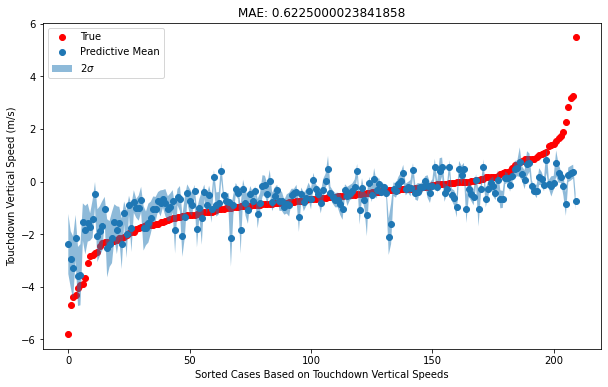

In [24]:
import matplotlib.pyplot as plt

order = np.argsort(test_labels[:,0])
labs = test_labels[order, 0]
preds = y_test_pred[:, order]
pred_means = preds.mean(axis=0)
pred_stds = preds.std(axis=0)
mae = np.mean(np.abs(labs - pred_means))
xvals = np.arange(labs.shape[0])

plt.figure(figsize=(10,6))
plt.title('MAE: {}'.format(round(mae,4)))
plt.scatter(xvals, labs, color='red', label='True')
plt.scatter(xvals, np.mean(preds, axis=0), color='tab:blue', label='Predictive Mean')
plt.fill_between(xvals, pred_means-2*pred_stds, pred_means+2*pred_stds, alpha=0.5, label=r'$2\sigma$')
plt.legend()
plt.xlabel('Sorted Cases Based on Touchdown Vertical Speeds')
plt.ylabel('Touchdown Vertical Speed (m/s)')
plt.show()